(H, W) = (size[0], size[1]) = (768, 512)
l size =  [24, 16]
number of block order bits =  9
filename = mono_IMG0004

L = 100 L2 = 10 

前処理前のヒストグラム = [0, 1, 30, 324, 143, 139, 128, 68, 55, 63, 57, 62, 56, 40, 48, 57, 54, 53, 50, 58, 58, 57, 59, 69, 56, 69, 74, 81, 79, 89, 110, 111, 128, 135, 143, 166, 183, 220, 249, 317, 512, 1308, 2839, 4297, 5386, 6319, 8425, 11129, 10344, 7946, 6438, 5622, 4728, 4011, 3517, 2995, 2893, 2611, 2487, 2361, 2353, 2267, 2202, 2062, 1990, 2016, 1980, 1883, 1942, 1873, 1899, 1820, 1848, 1886, 1868, 1903, 1896, 1928, 1833, 1733, 1863, 1813, 1887, 1917, 1966, 1936, 2000, 2144, 2169, 2308, 2437, 2352, 2386, 2340, 2322, 2487, 2527, 2742, 2730, 2736, 2667, 2770, 2701, 2652, 2750, 2893, 2842, 3027, 3013, 3037, 3155, 3178, 2927, 2982, 3019, 6958, 3017, 2502, 2721, 2316, 2161, 2213, 2071, 2191, 2201, 2369, 2531, 2725, 2644, 2789, 2862, 2826, 2803, 2767, 2815, 2914, 3132, 3083, 3247, 3129, 3077, 2964, 2825, 2689, 2623, 2472, 2414, 2436, 2663, 2463, 2457, 2320, 2398,

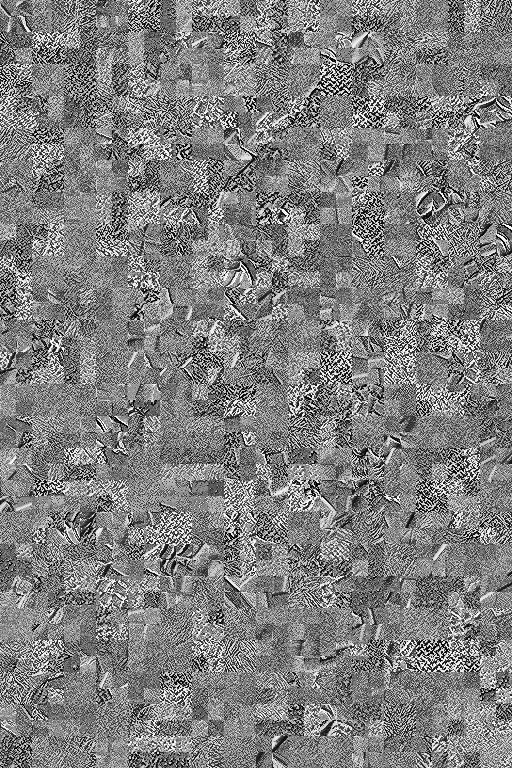

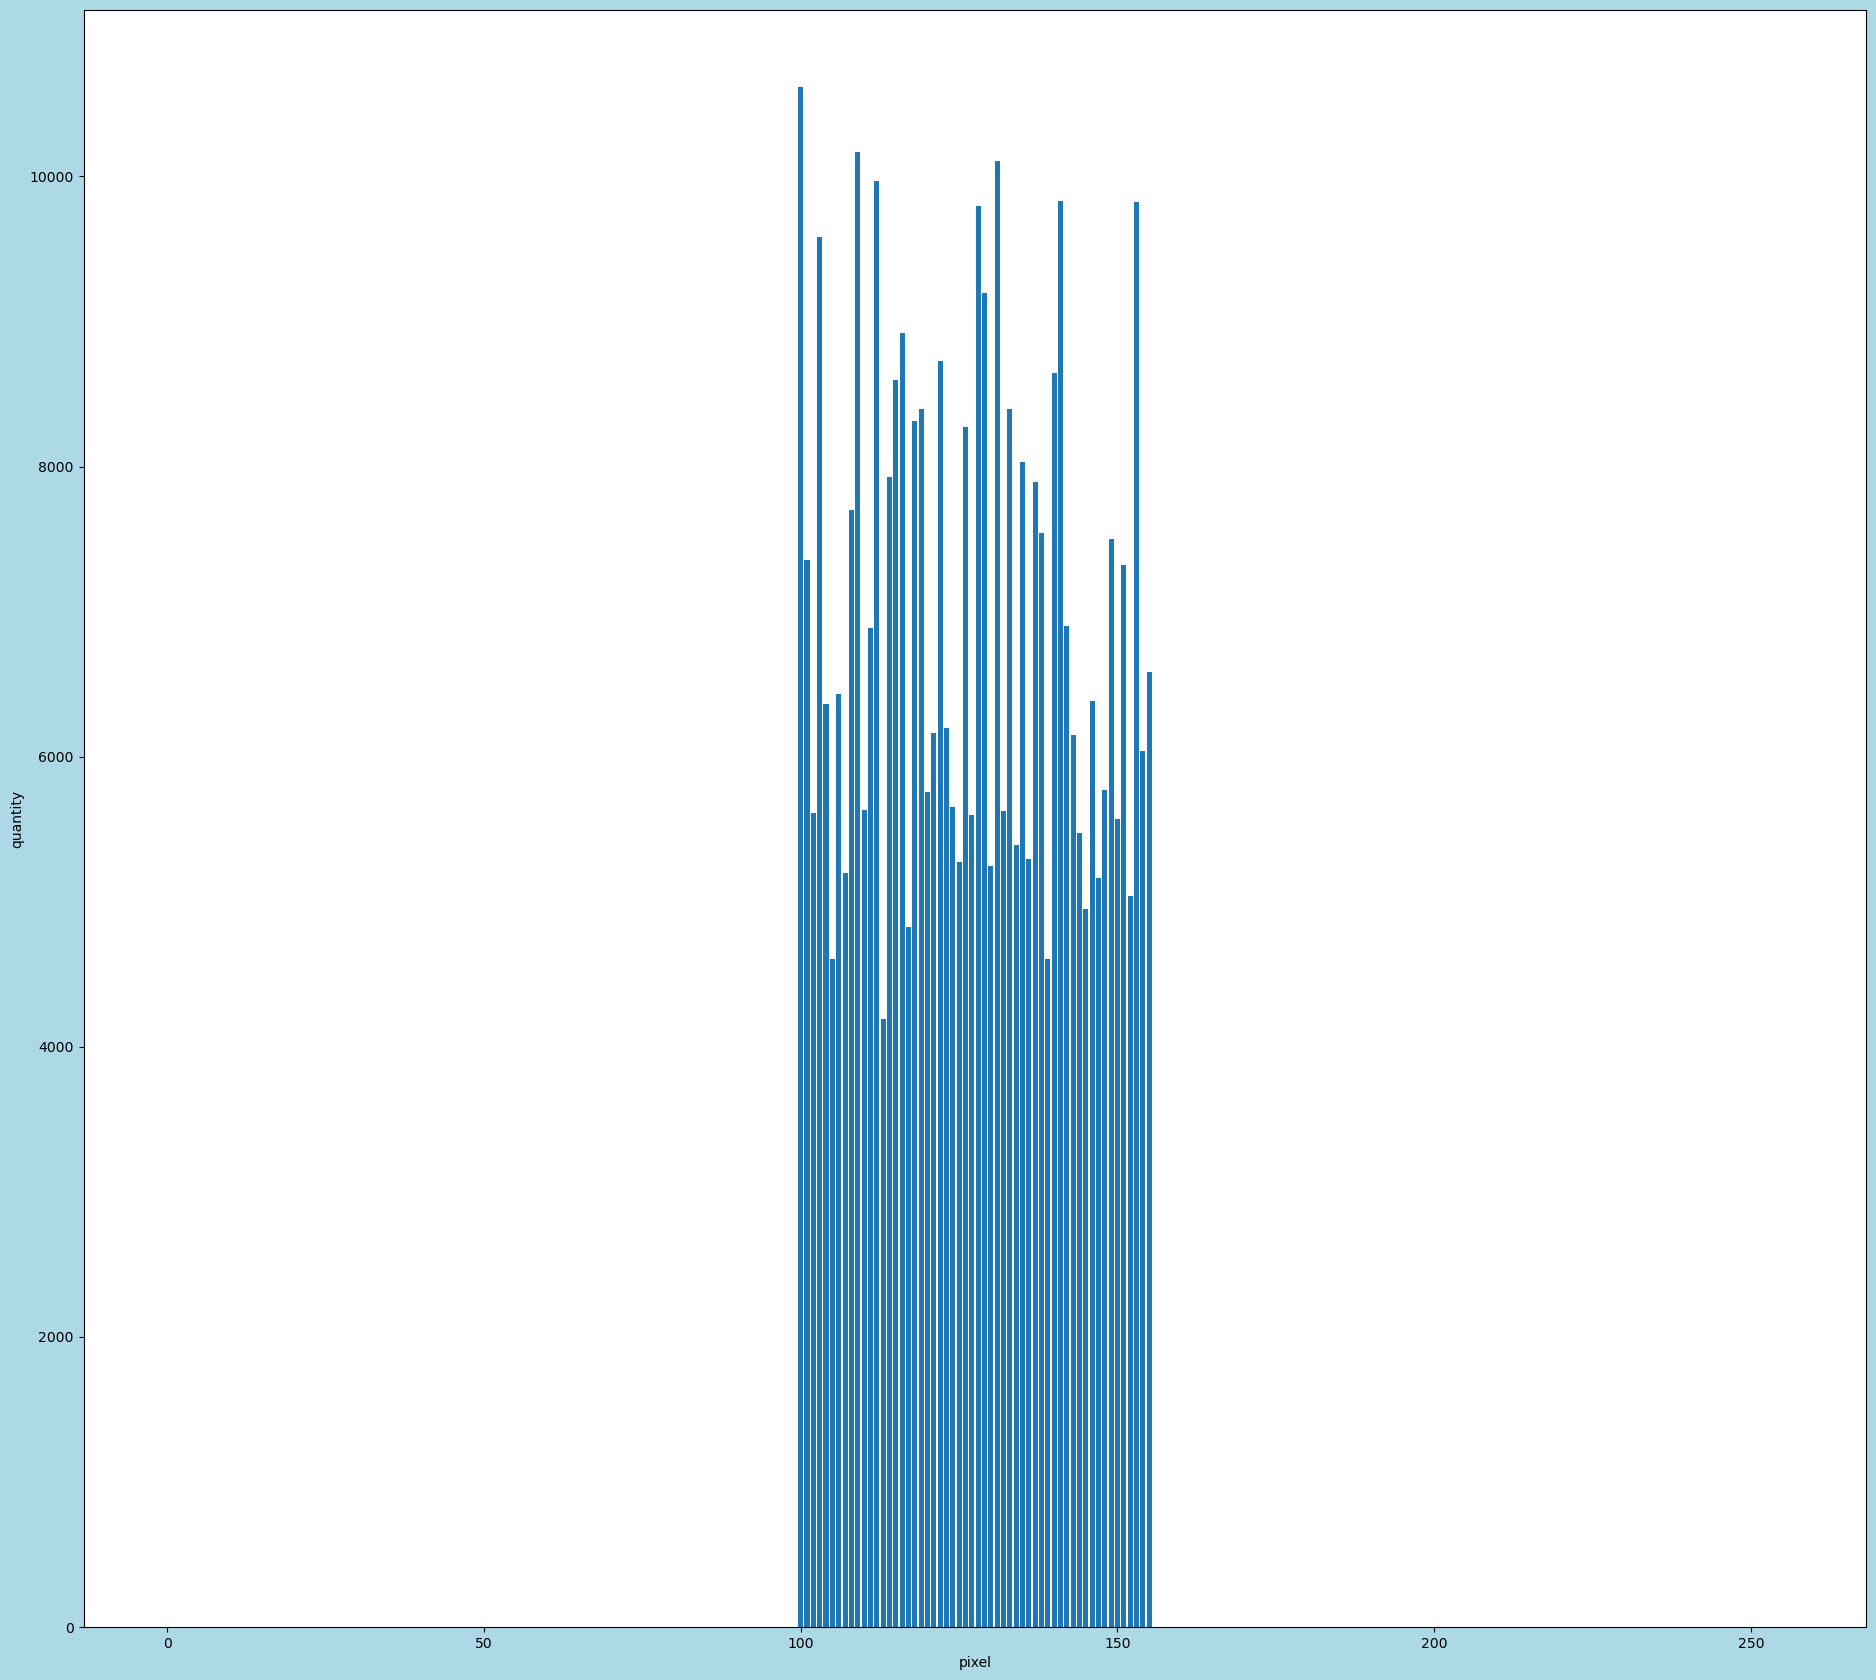

In [3]:
# Import pillow
from PIL import Image, ImageFilter
import numpy as np
import random
import matplotlib.pyplot as plt
import math
import heapq
np.set_printoptions(threshold=np.inf)

# Negative-positive inversion
def blcol_reverse(im, b_size, lx, ly):
    block = 255-block

# Scramble
def scramble(im, im2, b_size, l_size, i, j, shuf_list):
    im2[b_size*j:b_size*(j+1), b_size*i:b_size*(i+1)] = im[shuf_list[l_size[1]*j+i][1]*b_size:(shuf_list[l_size[1]*j+i][1]+1)*b_size, shuf_list[l_size[1]*j+i][0]*b_size:(shuf_list[l_size[1]*j+i][0]+1)*b_size]

# Rotation/flip
def rondom_rotpix(im, im2, b_size, i, j, num):
    block = im[b_size*j:b_size*(j+1), b_size*i:b_size*(i+1)]
    if(num == 1):
        block = np.fliplr(block)
        block = np.rot90(block, k=1)
    elif(num == 2):
        block = np.fliplr(block)
        block = np.rot90(block, k=2)
    elif(num == 3):
        block = np.fliplr(block)
        block = np.rot90(block, k=-1)
    elif(num == 4):
        block = np.fliplr(block)
    elif(num == 5):
        block = np.rot90(block, k=1)
    elif(num == 6):
        block = np.rot90(block, k=2)
    elif(num == 7):
        block = np.rot90(block, k=-1)
    else:
        pass
    im2[b_size*j:b_size*(j+1), b_size*i:b_size*(i+1)] = block

# Binary to decimal
def b_d(list, n):
    str_list = ''
    for i in range(n):
        str_list = str_list + str(list[0])
        list.pop(0)
    return int(str_list, 2)


# Main
name = "mono_IMG0004"
filename = name+".tiff"
im = Image.open(name+".tiff")
im_np = np.array(im)  # H×W numpy.ndarray
size = im_np.shape

print("(H, W) = (size[0], size[1]) =", size)
#print(im_np)

# Get binary text file
f = open('info.txt', 'r')
data = f.read()

str_info = list(data)
emb_info = []

# Convert the read binary file to an integer list
for i in range(len(str_info)):
    emb_info.append(int(str_info[i]))
    
# Number of bits when taking log2 of pixel count (bit count of pixel count)
pixbitnum = int(math.log2(size[0]*size[1]))+1

# Main block size
main_size = 32

# Sub-block size
b_size = 16

# Number of main blocks per image side
l_size = []
l_size.append(size[0] // main_size)
l_size.append(size[1] // main_size)

subl_size = []
subl_size.append(main_size // b_size)
subl_size.append(main_size // b_size)

# Number of bits representing the number of main block 
lbits = math.ceil(math.log2(l_size[0]*l_size[1])) # Main
sublbits = math.ceil(math.log2(subl_size[0]*subl_size[1])) # Sub

print("l size = ", l_size)
print("number of block order bits = ", lbits)

# Copy of original image im
im1_np = im_np

# Key setting
if(size[0] < size[1]):
    #Mb16, Sb8
    # key1 = [[[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]]]
    # key2 = [[4, 7, 0, 7], [6, 0, 1, 7], [0, 6, 7, 2], [1, 2, 7, 5], [1, 6, 4, 1], [6, 0, 5, 2], [4, 2, 3, 3], [1, 6, 0, 6], [3, 2, 2, 0], [6, 6, 2, 5], [2, 7, 0, 6], [4, 2, 4, 3], [1, 1, 2, 0], [3, 6, 2, 5], [4, 6, 6, 4], [0, 7, 3, 2], [5, 7, 0, 5], [0, 6, 6, 6], [0, 7, 4, 6], [3, 2, 4, 2], [6, 7, 6, 3], [5, 7, 0, 0], [6, 6, 7, 3], [4, 3, 3, 0], [5, 2, 2, 4], [6, 0, 5, 3], [3, 6, 2, 6], [7, 1, 0, 6], [6, 0, 5, 2], [0, 2, 3, 1], [6, 7, 6, 4], [2, 0, 4, 4], [7, 2, 3, 2], [3, 5, 4, 2], [0, 2, 4, 4], [3, 1, 3, 3], [1, 2, 4, 6], [7, 6, 7, 6], [0, 2, 2, 2], [2, 0, 3, 4], [4, 3, 3, 1], [3, 1, 2, 0], [5, 7, 6, 1], [7, 7, 0, 0], [3, 7, 0, 7], [7, 6, 3, 7], [7, 2, 6, 1], [0, 1, 5, 0], [1, 4, 5, 4], [3, 5, 0, 3], [4, 4, 4, 5], [0, 5, 6, 3], [4, 0, 4, 6], [3, 1, 7, 5], [0, 2, 1, 2], [2, 2, 7, 3], [2, 7, 5, 1], [5, 2, 1, 0], [7, 2, 6, 0], [2, 4, 0, 6], [7, 3, 0, 2], [2, 6, 1, 5], [4, 5, 1, 2], [4, 4, 7, 6], [5, 7, 1, 7], [5, 3, 6, 2], [7, 3, 6, 4], [3, 1, 4, 7], [4, 3, 6, 0], [3, 5, 6, 1], [1, 5, 4, 3], [2, 7, 4, 2], [3, 6, 4, 1], [5, 3, 2, 0], [0, 6, 5, 2], [6, 0, 4, 1], [4, 1, 6, 4], [6, 6, 2, 1], [2, 4, 3, 2], [7, 2, 6, 3], [1, 1, 4, 6], [1, 3, 1, 6], [5, 5, 1, 2], [2, 4, 0, 2], [6, 7, 3, 3], [0, 4, 0, 5], [0, 2, 3, 4], [0, 0, 4, 2], [7, 3, 2, 2], [6, 1, 4, 1], [3, 2, 7, 4], [2, 5, 1, 7], [7, 4, 7, 0], [3, 5, 1, 7], [5, 7, 5, 6], [6, 3, 7, 3], [6, 2, 3, 6], [4, 1, 7, 2], [0, 2, 7, 2], [3, 0, 4, 5], [0, 6, 6, 3], [2, 3, 5, 5], [1, 3, 5, 7], [0, 4, 1, 4], [1, 7, 3, 3], [3, 1, 2, 5], [5, 7, 7, 5], [5, 4, 6, 6], [6, 4, 7, 3], [2, 2, 2, 7], [1, 5, 4, 2], [0, 2, 4, 7], [7, 7, 5, 6], [5, 0, 4, 7], [1, 2, 3, 0], [5, 3, 5, 1], [5, 7, 7, 7], [5, 6, 7, 3], [1, 4, 5, 5], [7, 7, 1, 0], [4, 6, 1, 5], [3, 0, 5, 6], [6, 4, 0, 4], [7, 5, 1, 3], [5, 0, 2, 7], [3, 2, 4, 2], [2, 1, 7, 1], [2, 4, 2, 5], [1, 2, 0, 1], [6, 1, 2, 5], [2, 1, 1, 6], [0, 4, 7, 5], [3, 6, 4, 1], [2, 1, 1, 5], [5, 2, 6, 7], [7, 3, 5, 3], [2, 3, 3, 1], [1, 4, 3, 1], [6, 4, 1, 5], [3, 1, 2, 0], [2, 3, 4, 0], [5, 2, 4, 7], [1, 6, 2, 6], [1, 6, 2, 5], [3, 3, 4, 2], [7, 3, 7, 0], [6, 7, 2, 0], [7, 0, 7, 3], [3, 3, 0, 1], [6, 0, 7, 3], [7, 5, 7, 4], [4, 3, 0, 2], [0, 6, 1, 3], [3, 5, 0, 7], [7, 0, 5, 5], [7, 6, 4, 3], [1, 1, 6, 0], [7, 6, 7, 5], [7, 0, 3, 1], [4, 0, 4, 7], [5, 7, 2, 0], [3, 4, 4, 7], [2, 2, 1, 7], [1, 1, 4, 6], [3, 0, 0, 5], [4, 3, 7, 4], [3, 2, 2, 4], [3, 4, 7, 1], [2, 4, 2, 5], [0, 3, 6, 6], [7, 1, 4, 5], [7, 7, 6, 7], [1, 7, 5, 7], [4, 2, 3, 0], [0, 5, 7, 1], [5, 0, 4, 6], [2, 1, 5, 3], [7, 0, 4, 0], [2, 2, 6, 0], [7, 7, 6, 7], [4, 7, 0, 7], [1, 0, 4, 1], [6, 7, 0, 1], [2, 6, 2, 5], [0, 2, 1, 3], [4, 5, 3, 1], [7, 2, 3, 1], [7, 2, 2, 3], [2, 0, 3, 5], [3, 5, 6, 3], [7, 4, 6, 6], [7, 0, 3, 2], [4, 7, 0, 3], [6, 1, 3, 0], [3, 2, 2, 6], [3, 6, 4, 4], [1, 5, 5, 2], [0, 3, 4, 3], [3, 3, 3, 7], [7, 0, 4, 2], [3, 1, 5, 5], [4, 3, 2, 3], [6, 3, 3, 2], [6, 1, 6, 5], [2, 7, 1, 2], [7, 7, 7, 0], [5, 5, 2, 1], [4, 7, 2, 4], [5, 2, 7, 3], [0, 7, 1, 2], [1, 0, 4, 4], [7, 7, 4, 6], [4, 3, 3, 0], [2, 2, 7, 7], [2, 4, 4, 0], [3, 1, 3, 6], [5, 0, 1, 7], [1, 7, 6, 0], [3, 7, 0, 1], [0, 0, 1, 0], [5, 6, 4, 3], [6, 2, 2, 7], [3, 7, 5, 6], [5, 2, 1, 7], [4, 0, 4, 5], [6, 2, 5, 7], [6, 5, 4, 5], [6, 5, 3, 0], [2, 3, 4, 3], [0, 7, 2, 5], [3, 4, 6, 3], [5, 3, 1, 5], [2, 3, 1, 1], [1, 6, 5, 0], [7, 5, 5, 0], [6, 4, 3, 5], [0, 2, 0, 6], [3, 7, 1, 6], [0, 5, 5, 0], [2, 5, 7, 1], [6, 6, 0, 4], [4, 7, 6, 3], [1, 2, 6, 5], [1, 2, 1, 1], [1, 7, 3, 3], [1, 0, 4, 7], [6, 2, 6, 5], [7, 4, 3, 3], [4, 6, 2, 7], [2, 2, 6, 5], [3, 6, 3, 3], [5, 6, 4, 2], [3, 2, 2, 3], [3, 5, 4, 1], [2, 0, 4, 0], [1, 0, 0, 5], [2, 4, 0, 4], [1, 0, 4, 6], [5, 1, 5, 0], [1, 5, 5, 3], [3, 7, 4, 5], [6, 3, 7, 2], [4, 1, 2, 3], [3, 2, 7, 1], [6, 6, 0, 0], [3, 2, 6, 0], [0, 2, 2, 6], [0, 6, 5, 3], [4, 0, 4, 1], [5, 3, 4, 7], [6, 7, 2, 4], [2, 2, 3, 2], [3, 2, 5, 2], [4, 6, 5, 3], [0, 6, 3, 2], [5, 7, 2, 4], [3, 2, 4, 2], [7, 5, 1, 3], [0, 4, 0, 2], [4, 2, 5, 3], [4, 0, 1, 4], [5, 0, 5, 6], [0, 2, 7, 0], [4, 0, 0, 6], [1, 6, 2, 5], [6, 4, 7, 4], [2, 1, 2, 5], [4, 1, 1, 3], [4, 3, 0, 5], [6, 6, 6, 7], [3, 3, 0, 3], [5, 7, 1, 2], [0, 5, 2, 2], [7, 2, 3, 5], [6, 2, 0, 0], [2, 0, 2, 7], [1, 2, 4, 4], [4, 0, 4, 2], [5, 5, 4, 2], [7, 6, 7, 4], [4, 0, 3, 7], [3, 2, 5, 6], [2, 0, 5, 4], [3, 6, 2, 4], [6, 0, 0, 4], [0, 1, 2, 3], [5, 2, 7, 7], [5, 5, 3, 6], [1, 7, 3, 5], [2, 0, 6, 7], [5, 4, 7, 4], [7, 3, 4, 2], [7, 7, 3, 6], [2, 6, 6, 5], [0, 5, 6, 2], [0, 4, 5, 1], [7, 6, 1, 1], [4, 0, 6, 5], [3, 7, 7, 6], [7, 6, 3, 7], [4, 6, 7, 3], [6, 7, 6, 3], [2, 0, 1, 4], [7, 0, 2, 7], [0, 0, 5, 1], [4, 3, 2, 2], [4, 3, 7, 2], [2, 5, 3, 7], [6, 1, 6, 4], [2, 0, 4, 4], [0, 6, 0, 0], [2, 2, 1, 1], [5, 3, 4, 5], [3, 4, 5, 1], [3, 1, 3, 6], [7, 3, 0, 1], [7, 5, 1, 2], [1, 5, 2, 1], [6, 3, 2, 5], [0, 0, 6, 7], [0, 2, 6, 3], [4, 7, 0, 7], [5, 5, 6, 0], [5, 7, 3, 0], [2, 0, 2, 3], [4, 6, 6, 7], [0, 0, 5, 7], [3, 6, 5, 7], [4, 3, 4, 0], [3, 3, 3, 5], [7, 7, 3, 4], [5, 7, 0, 2], [7, 6, 7, 0], [2, 2, 2, 5], [4, 7, 7, 2], [1, 1, 1, 0], [6, 6, 1, 4], [5, 7, 5, 0], [0, 0, 6, 2], [6, 3, 5, 3], [1, 2, 1, 0], [3, 1, 2, 0], [2, 6, 1, 7], [7, 1, 6, 6], [2, 5, 3, 2], [7, 2, 6, 1], [0, 1, 5, 2], [4, 0, 7, 3], [5, 0, 0, 0], [2, 0, 5, 1], [0, 1, 7, 7], [4, 0, 2, 0], [2, 3, 5, 1], [4, 7, 2, 7], [3, 2, 2, 6], [0, 3, 2, 4], [4, 1, 2, 3], [0, 6, 3, 1], [2, 2, 7, 2], [1, 1, 0, 2], [7, 4, 1, 2], [6, 6, 4, 0], [4, 2, 6, 2], [5, 4, 6, 0], [7, 3, 1, 2], [3, 7, 3, 7], [4, 0, 5, 0], [3, 0, 6, 0], [5, 7, 5, 2], [5, 4, 1, 1], [2, 2, 3, 3], [7, 3, 5, 7], [5, 7, 3, 4], [2, 4, 0, 1], [7, 7, 0, 4], [6, 4, 7, 0], [7, 0, 1, 4], [2, 3, 4, 4], [0, 4, 6, 5], [0, 6, 2, 0], [2, 3, 6, 2], [0, 2, 5, 0], [6, 3, 5, 6], [4, 4, 1, 7], [4, 2, 1, 1], [6, 1, 0, 4], [6, 3, 7, 1], [5, 0, 5, 3], [5, 5, 2, 2], [5, 0, 6, 4], [6, 4, 6, 2], [4, 0, 5, 7], [4, 6, 0, 2], [3, 5, 1, 4], [5, 6, 1, 6], [1, 0, 1, 3], [3, 3, 6, 1], [5, 0, 5, 1], [6, 2, 0, 1], [0, 6, 3, 1], [0, 6, 1, 4], [4, 6, 6, 3], [1, 5, 5, 7], [7, 0, 2, 1], [0, 2, 4, 3], [0, 4, 6, 7], [3, 3, 7, 0], [2, 6, 1, 2], [1, 5, 0, 5], [6, 4, 5, 1], [0, 2, 4, 4], [6, 3, 6, 2], [0, 4, 5, 7], [1, 4, 4, 0], [7, 7, 2, 4], [0, 4, 1, 4], [3, 6, 7, 0], [3, 3, 1, 0], [0, 0, 2, 2], [0, 6, 0, 6], [5, 5, 6, 2], [0, 3, 4, 0], [4, 5, 5, 1], [4, 5, 5, 5], [7, 1, 6, 6], [5, 3, 3, 1], [7, 7, 6, 1], [6, 0, 1, 2], [4, 5, 6, 6], [5, 2, 4, 5], [3, 2, 1, 7], [4, 0, 4, 3], [6, 1, 2, 3], [7, 7, 5, 7], [6, 6, 7, 5], [2, 1, 2, 6], [6, 2, 2, 2], [0, 4, 5, 4], [5, 3, 5, 6], [2, 7, 4, 2], [5, 7, 2, 1], [5, 6, 5, 2], [3, 6, 6, 0], [7, 2, 2, 2], [3, 3, 0, 0], [7, 4, 1, 0], [2, 4, 2, 2], [0, 6, 3, 2], [2, 3, 6, 3], [3, 6, 2, 2], [0, 0, 1, 1], [6, 7, 4, 6], [1, 4, 0, 7], [0, 3, 2, 2], [4, 7, 1, 1], [1, 6, 4, 0], [7, 1, 1, 5], [3, 3, 7, 5], [1, 5, 1, 5], [6, 3, 2, 1], [6, 7, 1, 4], [5, 4, 1, 1], [0, 6, 2, 6], [3, 7, 6, 3], [5, 5, 4, 6], [6, 0, 6, 3], [6, 1, 4, 5], [0, 6, 1, 4], [0, 4, 4, 7], [2, 4, 1, 7], [0, 4, 3, 1], [3, 7, 0, 7], [7, 4, 0, 6], [1, 5, 7, 5], [4, 2, 3, 4], [0, 3, 1, 6], [0, 3, 3, 0], [4, 1, 6, 0], [6, 1, 2, 1], [1, 2, 5, 3], [4, 5, 5, 2], [3, 4, 4, 1], [3, 6, 1, 1], [3, 1, 6, 0], [5, 4, 4, 6], [5, 3, 6, 6], [7, 6, 5, 2], [6, 2, 2, 7], [2, 6, 2, 1], [7, 3, 2, 7], [4, 1, 1, 6], [7, 3, 3, 1], [5, 3, 3, 1], [1, 5, 7, 6], [3, 3, 6, 0], [0, 2, 4, 2], [7, 6, 1, 4], [6, 2, 7, 5], [1, 4, 5, 2], [3, 7, 2, 5], [5, 5, 1, 5], [0, 5, 6, 1], [2, 4, 6, 5], [4, 1, 5, 3], [5, 5, 1, 6], [0, 7, 4, 2], [4, 5, 6, 4], [6, 6, 3, 7], [2, 6, 3, 4], [7, 6, 5, 6], [4, 7, 1, 4], [1, 4, 1, 4], [6, 2, 6, 0], [7, 6, 6, 2], [4, 5, 1, 2], [5, 2, 3, 5], [2, 4, 3, 3], [7, 7, 2, 1], [2, 0, 0, 2], [2, 1, 0, 5], [2, 3, 5, 3], [3, 1, 5, 1], [4, 3, 1, 0], [5, 5, 4, 2], [0, 3, 6, 6], [4, 7, 5, 1], [4, 4, 7, 6], [5, 6, 1, 6], [4, 7, 5, 4], [2, 6, 2, 0], [6, 2, 4, 6], [5, 5, 6, 0], [2, 1, 0, 0], [7, 4, 5, 7], [7, 4, 4, 1], [6, 2, 5, 5], [4, 7, 7, 7], [3, 0, 0, 5], [2, 5, 3, 2], [5, 0, 3, 1], [0, 6, 6, 6], [0, 0, 5, 4], [3, 1, 3, 5], [6, 6, 1, 3], [0, 0, 6, 5], [2, 7, 3, 3], [5, 6, 5, 4], [5, 4, 4, 5], [6, 0, 7, 6], [4, 2, 7, 5], [0, 7, 4, 4], [5, 2, 1, 0], [7, 3, 3, 1], [6, 2, 1, 1], [5, 1, 0, 4], [2, 0, 0, 6], [2, 4, 7, 4], [4, 0, 1, 3], [2, 3, 6, 4], [1, 3, 2, 7], [6, 6, 0, 6], [1, 6, 0, 4], [6, 1, 2, 6], [4, 5, 7, 7], [7, 5, 1, 0], [7, 3, 0, 4], [6, 4, 3, 6], [0, 1, 3, 6], [7, 3, 6, 0], [2, 3, 2, 7], [2, 4, 2, 6], [2, 7, 1, 5], [5, 3, 6, 5], [7, 6, 2, 3], [2, 7, 6, 6], [5, 2, 6, 5], [6, 4, 0, 3], [6, 5, 2, 2], [0, 0, 4, 5], [6, 0, 0, 4], [4, 0, 4, 5], [1, 1, 5, 4], [5, 2, 4, 0], [5, 7, 5, 3], [0, 0, 7, 2], [5, 0, 3, 7], [4, 2, 7, 3], [3, 1, 0, 1], [0, 0, 4, 5], [0, 0, 6, 7], [5, 7, 6, 7], [4, 2, 2, 5], [0, 2, 7, 4], [6, 3, 4, 4], [5, 5, 5, 5], [0, 3, 7, 4], [4, 3, 5, 4], [3, 2, 1, 4], [3, 0, 1, 4], [5, 2, 1, 2], [5, 6, 6, 3], [5, 1, 6, 2], [2, 7, 2, 4], [3, 2, 0, 2], [7, 3, 7, 4], [5, 2, 5, 0], [7, 5, 5, 4], [0, 4, 0, 1], [4, 3, 3, 3], [1, 1, 7, 2], [0, 3, 2, 1], [3, 6, 0, 2], [5, 7, 2, 6], [6, 3, 0, 4], [5, 0, 3, 4], [2, 7, 1, 5], [7, 1, 7, 7], [7, 4, 5, 0], [3, 7, 4, 0], [0, 4, 7, 0], [7, 3, 2, 4], [0, 2, 4, 3], [5, 1, 7, 1], [7, 0, 2, 3], [3, 6, 4, 5], [3, 4, 0, 0], [1, 3, 6, 2], [1, 0, 1, 0], [7, 6, 3, 7], [7, 6, 0, 5], [5, 0, 6, 6], [2, 7, 2, 0], [0, 1, 6, 7], [2, 3, 5, 6], [4, 5, 0, 3], [7, 2, 0, 3], [1, 4, 5, 6], [2, 5, 6, 1], [0, 7, 4, 1], [0, 1, 6, 4], [0, 2, 4, 2], [7, 7, 0, 6], [3, 1, 5, 2], [7, 3, 6, 7], [1, 1, 7, 1], [5, 2, 4, 4], [7, 5, 5, 3], [2, 3, 3, 0], [0, 4, 3, 2], [3, 4, 6, 4], [2, 1, 5, 7], [5, 4, 4, 0], [4, 7, 6, 6], [5, 4, 1, 5], [6, 3, 3, 0], [5, 4, 7, 1], [3, 1, 0, 1], [5, 1, 0, 6], [6, 1, 6, 4], [2, 3, 2, 7], [6, 7, 7, 0], [6, 4, 3, 5], [2, 7, 2, 2], [0, 1, 7, 2], [3, 0, 2, 0], [2, 6, 3, 6], [5, 4, 1, 5], [4, 3, 6, 0], [1, 1, 2, 2], [0, 2, 2, 3], [4, 4, 6, 5], [2, 4, 5, 1], [5, 1, 6, 7], [5, 5, 6, 5], [6, 0, 0, 2], [1, 4, 1, 7], [1, 7, 3, 3], [5, 4, 5, 6], [3, 6, 0, 4], [1, 0, 7, 6], [5, 0, 7, 4], [4, 4, 2, 2], [6, 2, 7, 3], [7, 3, 0, 3], [6, 0, 0, 5], [5, 4, 6, 4], [5, 2, 2, 7], [6, 6, 4, 5], [0, 5, 6, 3], [7, 7, 3, 0], [4, 7, 2, 3], [0, 2, 3, 0], [0, 7, 2, 5], [0, 3, 3, 3], [7, 6, 6, 3], [7, 0, 2, 3], [1, 2, 4, 1], [0, 3, 0, 6], [6, 0, 7, 0], [1, 2, 2, 0], [4, 7, 3, 5], [0, 1, 5, 1], [6, 5, 2, 4], [5, 0, 6, 1], [7, 4, 1, 6], [5, 6, 2, 1], [3, 5, 4, 7], [5, 5, 2, 3], [2, 4, 5, 6], [6, 3, 4, 6], [0, 0, 5, 6], [4, 6, 1, 0], [6, 6, 7, 3], [7, 4, 0, 6], [4, 6, 5, 0], [1, 3, 6, 3], [1, 6, 3, 5], [3, 3, 3, 0], [4, 1, 0, 6], [0, 1, 5, 3], [6, 4, 6, 2], [2, 2, 4, 0], [0, 4, 2, 0], [7, 2, 1, 1], [1, 5, 5, 3], [3, 2, 6, 2], [1, 6, 0, 3], [4, 1, 2, 3], [0, 3, 3, 1], [6, 4, 4, 7], [7, 1, 0, 3], [5, 1, 5, 3], [4, 6, 2, 7], [3, 2, 4, 6], [3, 0, 2, 5], [1, 7, 1, 0], [4, 7, 2, 1], [1, 2, 7, 3], [2, 3, 7, 0], [2, 5, 0, 1], [7, 6, 4, 7], [3, 5, 3, 2], [0, 2, 0, 6], [5, 7, 7, 3], [7, 2, 7, 7], [1, 3, 4, 4], [6, 2, 1, 2], [6, 5, 1, 7], [6, 6, 6, 0], [5, 1, 6, 0], [5, 4, 7, 2], [3, 5, 5, 3], [4, 6, 2, 1], [4, 6, 4, 1], [4, 5, 7, 2], [0, 7, 3, 1], [1, 3, 1, 5], [7, 7, 7, 1], [1, 7, 4, 5], [4, 6, 5, 7], [6, 2, 0, 3], [1, 4, 0, 3], [4, 7, 7, 2], [7, 6, 7, 7], [4, 5, 2, 1], [7, 1, 4, 4], [6, 1, 0, 5], [5, 4, 7, 4], [0, 5, 1, 2], [6, 0, 4, 3], [6, 6, 7, 4], [2, 5, 6, 7], [3, 0, 5, 1], [2, 1, 0, 2], [0, 0, 5, 4], [3, 4, 4, 1], [2, 7, 5, 7], [1, 3, 6, 1], [2, 3, 0, 0], [2, 3, 3, 5], [0, 2, 2, 3], [3, 1, 7, 7], [5, 2, 0, 1], [4, 5, 6, 0], [6, 2, 1, 0], [2, 5, 6, 2], [4, 6, 4, 3], [6, 1, 2, 1], [0, 3, 5, 3], [1, 4, 6, 2], [3, 5, 7, 2], [7, 5, 5, 1], [6, 5, 4, 1], [1, 4, 3, 4], [2, 2, 2, 6], [4, 1, 0, 1], [1, 5, 2, 3], [7, 7, 5, 7], [1, 6, 1, 3], [6, 6, 2, 2], [7, 0, 6, 7], [3, 7, 0, 6], [6, 6, 0, 5], [5, 7, 6, 2], [3, 6, 4, 2], [4, 7, 2, 7], [5, 3, 1, 4], [4, 7, 5, 0], [4, 3, 2, 1], [2, 0, 1, 2], [4, 5, 0, 4], [6, 2, 4, 0], [0, 6, 6, 4], [3, 5, 3, 7], [0, 7, 0, 5], [7, 5, 6, 1], [0, 0, 5, 3], [3, 6, 2, 4], [3, 3, 2, 3], [1, 7, 0, 0], [4, 3, 4, 4], [7, 2, 1, 7], [2, 7, 3, 1], [0, 1, 6, 0], [3, 7, 5, 6], [0, 4, 2, 4], [1, 5, 6, 4], [1, 1, 7, 4], [7, 7, 6, 0], [6, 2, 4, 7], [3, 1, 4, 7], [6, 6, 3, 2], [4, 5, 2, 5], [0, 1, 4, 0], [0, 7, 4, 1], [4, 3, 7, 1], [4, 5, 2, 3], [1, 6, 2, 1], [5, 2, 2, 5], [5, 3, 2, 4], [0, 1, 3, 4], [2, 0, 5, 1], [4, 3, 5, 4], [6, 2, 7, 4], [0, 1, 7, 7], [1, 4, 4, 0], [1, 5, 7, 4], [5, 4, 6, 6], [7, 2, 5, 3], [1, 2, 6, 6], [1, 0, 4, 0], [1, 5, 4, 1], [2, 6, 2, 7], [0, 0, 7, 0], [1, 5, 7, 6], [7, 4, 7, 0], [1, 1, 6, 1], [4, 6, 6, 2], [7, 2, 6, 5], [3, 3, 1, 7], [4, 5, 5, 3], [5, 2, 2, 3], [0, 6, 0, 4], [5, 7, 7, 4], [3, 5, 3, 5], [7, 3, 1, 0], [4, 1, 0, 6], [7, 5, 4, 1], [5, 3, 4, 3], [1, 0, 5, 2], [2, 4, 6, 6], [3, 6, 3, 5], [7, 6, 2, 4], [0, 2, 2, 4], [0, 7, 4, 7], [0, 6, 3, 2], [0, 6, 4, 1], [6, 6, 1, 7], [0, 5, 0, 7], [6, 1, 4, 4], [3, 6, 2, 4], [0, 6, 1, 5], [3, 7, 2, 0], [5, 0, 5, 5], [3, 1, 6, 4], [5, 0, 0, 2], [2, 6, 6, 1], [5, 6, 2, 4], [6, 0, 7, 1], [5, 1, 3, 5], [4, 5, 5, 3], [4, 4, 2, 0], [6, 4, 3, 7], [2, 3, 5, 4], [7, 0, 0, 1], [7, 0, 2, 0], [1, 1, 5, 0], [1, 1, 7, 4], [3, 0, 6, 1], [5, 6, 6, 3], [7, 3, 4, 4], [4, 7, 1, 4], [2, 5, 0, 6], [4, 2, 4, 3], [2, 2, 4, 2], [6, 5, 4, 0], [7, 2, 1, 2], [3, 2, 3, 4], [5, 6, 4, 3], [4, 3, 4, 1], [4, 7, 7, 4], [1, 3, 1, 1], [7, 0, 4, 2], [4, 3, 4, 2], [0, 2, 4, 2], [2, 1, 3, 0], [1, 3, 1, 1], [5, 1, 1, 5], [0, 3, 0, 4], [7, 4, 3, 5], [4, 2, 5, 3], [7, 1, 1, 5], [3, 4, 6, 4], [2, 3, 1, 2], [5, 1, 2, 2], [3, 5, 2, 0], [7, 0, 1, 1], [2, 7, 5, 0], [4, 3, 1, 3], [7, 5, 6, 0], [6, 2, 3, 4], [1, 1, 4, 3], [3, 3, 2, 0], [7, 2, 2, 5], [2, 5, 6, 0], [2, 2, 0, 7], [7, 2, 2, 3], [7, 3, 3, 4], [5, 4, 2, 1], [6, 5, 2, 0], [0, 2, 6, 2], [0, 1, 4, 1], [4, 2, 2, 4], [7, 3, 6, 5], [7, 3, 6, 6], [6, 1, 4, 2], [6, 4, 6, 2], [0, 1, 0, 7], [1, 4, 0, 5], [0, 0, 2, 1], [7, 6, 5, 1], [4, 3, 6, 3], [0, 7, 2, 3], [7, 1, 5, 2], [0, 4, 7, 5], [7, 1, 1, 4], [5, 2, 3, 4], [7, 1, 3, 2], [7, 0, 7, 5], [6, 2, 0, 0], [4, 3, 2, 4], [1, 0, 3, 7], [3, 1, 6, 1], [0, 6, 6, 1], [0, 4, 1, 1], [5, 2, 1, 7], [1, 6, 0, 7], [3, 7, 4, 1], [6, 3, 3, 0], [2, 0, 1, 4], [4, 4, 0, 3], [1, 1, 5, 7], [5, 7, 1, 4], [1, 3, 1, 6], [3, 0, 3, 6], [2, 5, 3, 6], [1, 6, 1, 5], [2, 1, 6, 7], [7, 7, 2, 3], [6, 4, 0, 5], [4, 2, 3, 5], [3, 4, 2, 0], [6, 6, 5, 4], [7, 6, 4, 2], [5, 7, 3, 0], [3, 5, 4, 2], [0, 6, 6, 0], [7, 0, 6, 0], [3, 5, 6, 0], [1, 4, 7, 6], [5, 1, 5, 4], [7, 6, 3, 4], [5, 2, 3, 0], [6, 1, 0, 6], [6, 1, 2, 3], [6, 4, 5, 0], [5, 5, 2, 7], [0, 5, 3, 0], [7, 6, 0, 5], [1, 5, 7, 3], [3, 4, 5, 3], [6, 0, 2, 2], [6, 1, 0, 6], [7, 0, 7, 3], [1, 3, 1, 5], [1, 4, 7, 1], [6, 3, 1, 5], [7, 1, 4, 5], [2, 2, 6, 5], [3, 3, 7, 1], [0, 1, 0, 5], [6, 2, 3, 4], [6, 4, 5, 7], [3, 1, 1, 1], [6, 0, 6, 3], [6, 5, 7, 6], [6, 1, 6, 5], [1, 0, 4, 7], [4, 2, 4, 0], [3, 0, 0, 6], [2, 3, 3, 2], [6, 1, 6, 2], [6, 6, 3, 6], [6, 6, 6, 7], [4, 0, 6, 1], [4, 5, 3, 0], [7, 1, 4, 2], [6, 2, 4, 2], [4, 6, 0, 1], [3, 4, 7, 2], [6, 2, 6, 5], [1, 6, 6, 6], [6, 6, 7, 4], [7, 6, 5, 5], [6, 7, 2, 4], [4, 5, 2, 2], [2, 2, 6, 2], [0, 3, 0, 6], [1, 7, 3, 1], [2, 1, 4, 2], [2, 2, 5, 2], [1, 6, 0, 2], [2, 6, 6, 3], [3, 4, 7, 4], [7, 3, 3, 0], [0, 3, 0, 0], [4, 1, 3, 6], [1, 6, 1, 7], [5, 1, 4, 7], [4, 0, 3, 6], [3, 7, 3, 5], [7, 2, 2, 6], [2, 5, 7, 1], [3, 2, 1, 2], [2, 7, 0, 3], [5, 0, 3, 6], [1, 4, 5, 5], [5, 4, 2, 6], [6, 5, 5, 0], [2, 3, 6, 1], [5, 4, 2, 3], [3, 1, 5, 7], [7, 4, 7, 4], [2, 0, 4, 0], [4, 1, 1, 4], [1, 6, 3, 6], [1, 3, 1, 0], [0, 0, 1, 0], [6, 7, 2, 6], [7, 7, 0, 1], [2, 5, 0, 1], [6, 3, 6, 4], [4, 3, 4, 4], [1, 7, 1, 0], [5, 0, 2, 4], [2, 4, 6, 1], [7, 2, 0, 0], [6, 7, 3, 1], [0, 7, 2, 3], [5, 3, 3, 6], [1, 1, 7, 3], [7, 1, 1, 5], [3, 4, 6, 5], [3, 6, 6, 7], [7, 2, 2, 5], [0, 4, 0, 7], [4, 4, 6, 0], [0, 4, 7, 5], [6, 6, 4, 3], [5, 3, 4, 4], [4, 3, 1, 6], [6, 1, 1, 5], [6, 2, 2, 7], [3, 2, 2, 6], [3, 1, 0, 0], [4, 2, 4, 6], [0, 7, 6, 6], [0, 6, 4, 6], [0, 1, 5, 4], [5, 4, 0, 1], [5, 3, 6, 7], [0, 0, 6, 0], [6, 7, 1, 0], [0, 5, 4, 4], [0, 4, 3, 5], [0, 5, 4, 7], [0, 5, 2, 0], [4, 6, 3, 2], [7, 4, 6, 1], [0, 1, 7, 3], [6, 5, 3, 4], [0, 4, 0, 7], [0, 0, 1, 3], [4, 2, 0, 4], [4, 0, 3, 2], [4, 5, 3, 5], [4, 4, 5, 7], [2, 7, 2, 5], [6, 5, 2, 0], [0, 0, 7, 2], [3, 5, 6, 0], [7, 1, 2, 0], [7, 1, 6, 0], [4, 2, 2, 3], [2, 6, 5, 7], [0, 6, 6, 3], [7, 2, 6, 6], [0, 2, 6, 7], [7, 4, 3, 2], [1, 7, 6, 5], [1, 1, 7, 2], [6, 1, 4, 0], [7, 0, 2, 5], [5, 3, 3, 5], [4, 0, 2, 6], [0, 1, 0, 7], [5, 3, 5, 0], [6, 4, 5, 7], [4, 0, 6, 2], [7, 4, 6, 4], [2, 0, 7, 6], [5, 4, 6, 3], [7, 6, 1, 0], [5, 5, 7, 3], [4, 6, 5, 7], [6, 0, 4, 1], [7, 0, 6, 5], [6, 1, 4, 0], [0, 7, 4, 7], [3, 0, 1, 4], [4, 7, 5, 2], [1, 7, 5, 7], [7, 4, 0, 1], [4, 4, 6, 7], [0, 7, 5, 4], [0, 3, 6, 0], [1, 2, 2, 3], [0, 5, 1, 3], [5, 0, 0, 4], [1, 4, 4, 6], [0, 7, 3, 6], [1, 5, 6, 5], [1, 7, 2, 2], [7, 5, 6, 0], [4, 2, 3, 1], [4, 6, 4, 7], [3, 4, 2, 4], [1, 2, 7, 0], [4, 5, 0, 2], [6, 1, 3, 3], [4, 2, 1, 4], [5, 4, 7, 6], [4, 6, 6, 6], [1, 6, 3, 1], [0, 1, 1, 4], [3, 7, 2, 3], [1, 7, 3, 7], [6, 7, 3, 2], [6, 2, 2, 7], [5, 1, 0, 3], [2, 4, 7, 5], [1, 5, 3, 7], [3, 0, 6, 6], [3, 4, 2, 1], [1, 2, 2, 0], [4, 7, 0, 7], [3, 7, 1, 6], [0, 6, 2, 2], [0, 3, 3, 5], [7, 2, 0, 4], [5, 7, 4, 6], [4, 7, 4, 3], [7, 3, 6, 1], [0, 3, 2, 2], [5, 2, 4, 2], [7, 6, 1, 7], [4, 1, 6, 4], [7, 1, 7, 4], [5, 2, 3, 6], [4, 1, 3, 1], [6, 5, 0, 5], [0, 6, 2, 6], [3, 5, 4, 5], [3, 0, 6, 5], [1, 6, 4, 3], [0, 3, 6, 4], [5, 0, 5, 2], [5, 5, 3, 4], [5, 7, 7, 3], [0, 0, 3, 6], [0, 5, 1, 0], [1, 0, 5, 1], [1, 2, 0, 3], [3, 7, 1, 7], [6, 1, 5, 2], [5, 0, 7, 7], [7, 7, 4, 6], [0, 1, 4, 2], [3, 6, 5, 6], [7, 0, 7, 2], [6, 2, 7, 1], [0, 3, 7, 6], [5, 2, 3, 4], [1, 6, 6, 7], [4, 4, 7, 4], [6, 2, 7, 5], [2, 1, 1, 7], [6, 4, 3, 1], [1, 4, 6, 4], [0, 1, 5, 0], [6, 4, 5, 6], [1, 7, 7, 4], [0, 4, 4, 3], [7, 4, 6, 3], [3, 1, 3, 7], [6, 4, 1, 2], [4, 1, 7, 7], [6, 2, 7, 1], [5, 1, 3, 5], [2, 1, 3, 5], [0, 0, 6, 2], [0, 1, 2, 5], [2, 6, 3, 7], [3, 0, 4, 5], [1, 2, 3, 7], [3, 2, 1, 3], [1, 2, 1, 2], [6, 7, 3, 6], [2, 7, 4, 1], [3, 5, 1, 6], [0, 4, 6, 0], [1, 5, 1, 1], [6, 2, 4, 5], [3, 3, 1, 6], [0, 3, 0, 7], [0, 2, 3, 6], [0, 3, 4, 5], [5, 6, 2, 2], [0, 6, 5, 1], [7, 4, 3, 2], [0, 1, 1, 5], [1, 5, 6, 4], [4, 1, 6, 0], [3, 1, 3, 4], [5, 6, 4, 5], [6, 7, 1, 5], [1, 6, 1, 2], [4, 3, 0, 5], [0, 2, 1, 7], [6, 5, 4, 5], [6, 4, 3, 4], [4, 7, 7, 7], [3, 0, 0, 1], [7, 6, 5, 5], [3, 1, 1, 4], [3, 1, 2, 5], [4, 3, 1, 4], [6, 2, 1, 0], [7, 7, 7, 0], [0, 0, 1, 6], [2, 4, 3, 1], [6, 7, 6, 2], [5, 0, 4, 7], [7, 2, 0, 4], [6, 4, 4, 7], [4, 4, 2, 6], [4, 2, 2, 7], [0, 2, 2, 0], [1, 7, 1, 4], [0, 5, 7, 5], [3, 4, 7, 5], [2, 2, 3, 7], [5, 4, 7, 0], [7, 4, 1, 6], [4, 3, 0, 0], [3, 4, 7, 2], [0, 7, 3, 5], [1, 2, 4, 1], [2, 4, 2, 7], [6, 4, 2, 2], [1, 7, 6, 6], [5, 0, 3, 0], [4, 2, 4, 1], [6, 4, 1, 7], [6, 3, 4, 3], [5, 4, 2, 1], [7, 2, 6, 1], [0, 6, 6, 2], [6, 2, 2, 4], [7, 5, 6, 1], [5, 3, 4, 0], [3, 1, 2, 3], [3, 6, 0, 7], [0, 6, 5, 2], [0, 7, 4, 5], [1, 0, 1, 5], [4, 7, 2, 5], [4, 7, 4, 4], [0, 7, 4, 1], [7, 7, 2, 0], [4, 7, 6, 0], [3, 6, 3, 0], [6, 1, 0, 3], [0, 6, 3, 4], [3, 2, 3, 0], [2, 7, 4, 4], [6, 2, 6, 1], [4, 2, 7, 6], [5, 1, 3, 6], [7, 1, 3, 3], [4, 4, 5, 4], [2, 6, 0, 7], [2, 7, 4, 6], [5, 4, 3, 6], [4, 7, 6, 3], [3, 3, 6, 7], [7, 6, 0, 3], [0, 3, 5, 1], [5, 3, 4, 1], [1, 1, 1, 1], [3, 3, 7, 2], [3, 7, 1, 7], [3, 4, 4, 0], [2, 0, 4, 4], [6, 7, 2, 7], [7, 1, 2, 5], [6, 1, 0, 4], [6, 6, 7, 7], [1, 5, 1, 1], [0, 7, 2, 1], [3, 4, 0, 7], [6, 0, 6, 4], [4, 2, 5, 3], [0, 2, 5, 0], [7, 5, 3, 5], [7, 3, 4, 0], [3, 4, 2, 1], [3, 2, 2, 0], [1, 1, 0, 7], [2, 5, 3, 4], [7, 0, 4, 7], [1, 1, 2, 3], [7, 4, 4, 2], [0, 4, 7, 2], [2, 7, 1, 4], [6, 1, 1, 3], [0, 7, 0, 4], [7, 2, 0, 6], [1, 4, 4, 2], [7, 5, 6, 7], [7, 2, 4, 7], [2, 0, 5, 6], [5, 5, 7, 5], [6, 1, 7, 2], [4, 6, 3, 7], [1, 1, 1, 4], [0, 6, 4, 4], [4, 4, 0, 2], [0, 1, 1, 1], [6, 2, 2, 0], [5, 7, 5, 3], [7, 0, 3, 0], [5, 4, 6, 1], [2, 6, 5, 6], [5, 1, 1, 2], [7, 2, 2, 5], [4, 2, 2, 2], [4, 2, 2, 5], [6, 2, 2, 7], [4, 6, 1, 3], [2, 0, 2, 2], [4, 7, 5, 1], [6, 2, 2, 5], [6, 2, 6, 5], [3, 1, 3, 5], [7, 2, 6, 7], [7, 0, 4, 7], [6, 4, 0, 2], [5, 1, 5, 7], [1, 7, 7, 1], [5, 3, 5, 4], [0, 3, 2, 4], [7, 0, 1, 6], [1, 2, 5, 2], [5, 6, 2, 1], [4, 0, 4, 6], [6, 5, 4, 5], [3, 0, 1, 2], [4, 3, 0, 5], [4, 7, 0, 5], [1, 5, 4, 5], [7, 2, 1, 6], [3, 1, 3, 7], [4, 0, 4, 0], [2, 2, 4, 2], [7, 6, 3, 2], [6, 5, 6, 4], [7, 1, 0, 1], [4, 6, 3, 5], [4, 6, 4, 6], [4, 5, 4, 2], [6, 0, 5, 7], [1, 0, 2, 2], [7, 7, 7, 2], [5, 7, 4, 1], [3, 4, 2, 5], [7, 3, 4, 1], [4, 5, 4, 4], [7, 7, 1, 3], [7, 7, 6, 5], [7, 6, 3, 6], [5, 2, 4, 7], [1, 0, 1, 6], [3, 3, 4, 4], [4, 4, 4, 2], [3, 1, 3, 6], [7, 1, 2, 1], [2, 5, 3, 6], [6, 0, 6, 0], [1, 1, 3, 5], [6, 6, 3, 3], [5, 4, 2, 7], [2, 7, 5, 0], [0, 7, 3, 3], [0, 5, 2, 3], [2, 2, 5, 0], [3, 1, 2, 3], [7, 4, 5, 2], [5, 7, 3, 7], [4, 3, 4, 6], [0, 5, 7, 0], [0, 6, 0, 6], [2, 7, 5, 2], [6, 1, 6, 1], [6, 3, 2, 2], [2, 6, 6, 0], [2, 3, 0, 7], [6, 0, 5, 5], [7, 2, 6, 0], [3, 4, 5, 1], [5, 7, 3, 6], [5, 7, 6, 2], [7, 3, 6, 4], [6, 1, 2, 2], [4, 7, 4, 2], [2, 6, 2, 6], [4, 3, 1, 6], [5, 1, 4, 3], [4, 7, 6, 6], [3, 2, 1, 1], [6, 6, 1, 0], [0, 3, 2, 0], [7, 2, 2, 1], [5, 4, 5, 1], [3, 1, 2, 2], [3, 0, 0, 5], [2, 1, 3, 4], [7, 1, 5, 5], [1, 4, 7, 3], [6, 3, 4, 2], [0, 3, 1, 0], [3, 4, 3, 0], [5, 7, 7, 1], [2, 6, 1, 0], [0, 2, 7, 3], [3, 6, 2, 2], [0, 0, 6, 0], [4, 1, 5, 3], [3, 0, 3, 7], [3, 3, 5, 6], [2, 2, 0, 6], [1, 4, 6, 7], [1, 3, 3, 5], [5, 6, 3, 6], [5, 2, 0, 0], [7, 0, 2, 7], [4, 6, 7, 3], [2, 6, 7, 4], [2, 6, 7, 1], [5, 3, 0, 4], [5, 2, 6, 2], [4, 0, 2, 2], [6, 2, 0, 4], [0, 5, 7, 6], [5, 2, 3, 7], [7, 2, 1, 3], [4, 4, 3, 3], [5, 3, 4, 4], [1, 4, 1, 6], [6, 4, 7, 0], [6, 5, 5, 0], [4, 5, 2, 6], [2, 7, 1, 3], [4, 4, 6, 5], [7, 1, 4, 1], [0, 4, 5, 4]]
    # key3 = [[1, 0, 0, 0], [1, 1, 0, 0], [0, 1, 0, 0], [1, 1, 0, 0], [1, 1, 0, 1], [1, 0, 0, 0], [1, 0, 0, 1], [0, 1, 1, 1], [1, 1, 0, 1], [1, 1, 1, 0], [1, 0, 1, 0], [1, 1, 1, 1], [1, 1, 0, 1], [0, 0, 1, 1], [0, 0, 0, 0], [0, 1, 1, 0], [1, 1, 0, 1], [1, 0, 1, 1], [1, 0, 1, 1], [1, 1, 0, 0], [1, 0, 1, 1], [0, 0, 1, 1], [1, 0, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [1, 1, 1, 0], [0, 0, 0, 0], [0, 0, 0, 0], [1, 1, 1, 0], [1, 1, 0, 1], [0, 1, 1, 0], [1, 0, 0, 1], [1, 1, 1, 1], [0, 0, 0, 1], [0, 0, 0, 0], [0, 1, 0, 1], [0, 1, 1, 1], [0, 1, 0, 1], [0, 0, 0, 1], [1, 0, 1, 0], [0, 0, 1, 1], [0, 0, 0, 1], [1, 0, 1, 1], [1, 1, 1, 0], [1, 0, 0, 1], [0, 1, 1, 0], [1, 0, 1, 1], [1, 1, 1, 1], [1, 0, 1, 1], [0, 0, 0, 1], [0, 1, 1, 1], [0, 1, 0, 1], [1, 1, 0, 1], [1, 0, 0, 1], [1, 0, 1, 1], [0, 0, 1, 1], [0, 1, 1, 1], [1, 1, 1, 1], [0, 0, 0, 1], [1, 1, 1, 0], [1, 1, 1, 1], [0, 1, 1, 1], [0, 1, 1, 0], [0, 0, 1, 1], [1, 1, 1, 1], [1, 1, 0, 0], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 1, 0], [0, 0, 0, 0], [1, 1, 0, 0], [1, 1, 1, 0], [0, 0, 0, 1], [1, 0, 0, 1], [0, 1, 1, 1], [0, 1, 0, 1], [1, 1, 1, 0], [1, 0, 0, 1], [0, 0, 1, 1], [1, 1, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0], [1, 1, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 0], [1, 0, 1, 0], [1, 0, 0, 1], [0, 1, 0, 0], [0, 0, 1, 1], [0, 0, 0, 1], [0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 1, 1], [1, 0, 0, 0], [0, 0, 0, 1], [1, 1, 1, 1], [0, 0, 1, 1], [0, 1, 1, 1], [1, 1, 0, 1], [0, 1, 0, 0], [1, 0, 0, 0], [1, 0, 1, 1], [1, 1, 1, 0], [0, 0, 0, 0], [0, 1, 1, 1], [0, 1, 1, 1], [0, 1, 1, 1], [1, 0, 0, 1], [1, 1, 0, 1], [1, 1, 0, 0], [1, 0, 1, 0], [1, 1, 1, 0], [0, 0, 0, 1], [1, 1, 1, 0], [1, 1, 1, 1], [1, 0, 0, 1], [0, 1, 1, 0], [0, 1, 1, 1], [0, 0, 1, 0], [1, 1, 0, 0], [1, 0, 1, 1], [0, 0, 1, 1], [0, 0, 1, 0], [1, 1, 0, 1], [0, 1, 1, 0], [1, 1, 1, 0], [1, 1, 0, 1], [0, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 1], [1, 1, 1, 1], [1, 1, 0, 0], [1, 0, 0, 1], [1, 0, 0, 0], [1, 1, 1, 0], [1, 1, 0, 1], [1, 1, 0, 1], [0, 1, 1, 0], [0, 1, 0, 1], [1, 0, 0, 1], [0, 0, 1, 1], [1, 0, 1, 1], [0, 1, 1, 0], [0, 0, 0, 1], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 1, 0], [0, 1, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [1, 0, 1, 0], [0, 1, 0, 0], [0, 1, 1, 1], [1, 1, 1, 0], [1, 1, 0, 0], [0, 1, 1, 1], [1, 0, 1, 1], [0, 0, 0, 0], [0, 1, 1, 0], [1, 1, 0, 1], [1, 1, 1, 0], [0, 1, 1, 0], [0, 1, 0, 1], [0, 1, 1, 1], [1, 0, 1, 0], [1, 0, 1, 1], [0, 1, 1, 1], [0, 0, 1, 0], [1, 0, 0, 0], [1, 1, 0, 1], [1, 0, 1, 1], [0, 0, 0, 0], [0, 0, 1, 1], [1, 0, 1, 0], [0, 1, 0, 0], [0, 0, 1, 1], [0, 1, 0, 1], [1, 1, 0, 1], [0, 0, 0, 0], [0, 1, 1, 0], [0, 1, 0, 0], [1, 1, 0, 1], [0, 1, 1, 1], [1, 0, 0, 1], [1, 0, 0, 0], [0, 0, 1, 0], [1, 0, 1, 0], [1, 1, 1, 1], [1, 0, 1, 0], [1, 1, 0, 0], [0, 0, 1, 1], [0, 1, 1, 1], [0, 0, 1, 1], [1, 1, 0, 0], [1, 1, 1, 0], [1, 1, 1, 0], [1, 1, 1, 0], [1, 1, 1, 0], [0, 1, 1, 1], [1, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 0], [1, 1, 1, 0], [1, 0, 1, 1], [1, 1, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [1, 1, 0, 1], [0, 1, 0, 1], [0, 1, 1, 1], [0, 1, 1, 1], [1, 0, 1, 1], [0, 1, 1, 1], [1, 1, 0, 0], [1, 1, 1, 0], [1, 1, 1, 0], [1, 0, 0, 1], [1, 1, 0, 0], [0, 1, 1, 1], [0, 1, 0, 0], [1, 1, 1, 0], [0, 0, 1, 1], [0, 1, 1, 0], [0, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 1], [1, 1, 0, 0], [1, 1, 1, 1], [1, 0, 0, 1], [1, 1, 1, 1], [0, 1, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [1, 0, 1, 1], [0, 1, 1, 1], [0, 1, 1, 0], [0, 0, 0, 0], [1, 0, 1, 1], [0, 0, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 1], [0, 0, 1, 1], [1, 1, 1, 0], [1, 0, 0, 1], [1, 0, 1, 0], [0, 1, 1, 1], [0, 0, 0, 0], [1, 0, 0, 1], [0, 0, 0, 0], [1, 1, 0, 0], [0, 0, 0, 1], [1, 0, 0, 1], [0, 0, 0, 0], [1, 1, 1, 0], [0, 1, 1, 1], [0, 0, 0, 0], [1, 0, 0, 0], [1, 1, 0, 1], [1, 0, 0, 1], [1, 1, 0, 1], [1, 1, 1, 0], [1, 0, 1, 0], [0, 0, 0, 0], [0, 1, 0, 1], [1, 1, 0, 1], [0, 0, 1, 0], [0, 0, 0, 0], [1, 1, 0, 1], [0, 0, 0, 0], [0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 1, 1, 1], [0, 1, 0, 0], [0, 1, 1, 0], [0, 1, 0, 1], [0, 0, 0, 1], [0, 1, 1, 0], [1, 1, 1, 1], [0, 0, 1, 1], [0, 0, 1, 1], [0, 1, 0, 0], [1, 0, 1, 0], [1, 1, 0, 1], [1, 0, 1, 1], [1, 1, 0, 0], [1, 1, 0, 1], [0, 1, 1, 0], [0, 1, 0, 1], [0, 0, 0, 1], [0, 0, 1, 1], [0, 1, 1, 0], [1, 0, 0, 1], [1, 0, 1, 0], [0, 0, 0, 1], [0, 0, 1, 1], [1, 0, 1, 0], [1, 0, 0, 0], [0, 0, 1, 0], [1, 1, 1, 0], [0, 1, 0, 1], [1, 1, 1, 0], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [0, 1, 1, 1], [0, 1, 0, 1], [1, 1, 1, 0], [1, 0, 0, 1], [1, 0, 1, 0], [0, 1, 1, 0], [1, 1, 1, 0], [1, 1, 1, 0], [1, 1, 0, 0], [0, 1, 1, 1], [1, 1, 1, 0], [0, 0, 0, 1], [0, 1, 0, 1], [1, 1, 1, 1], [1, 0, 0, 0], [0, 1, 1, 0], [0, 0, 1, 0], [0, 0, 1, 1], [0, 1, 0, 1], [1, 0, 1, 1], [1, 1, 1, 0], [0, 1, 0, 0], [0, 0, 0, 0], [1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 0, 0], [1, 0, 1, 1], [0, 0, 1, 1], [0, 1, 1, 1], [0, 1, 1, 0], [0, 1, 0, 1], [1, 0, 0, 0], [0, 1, 1, 1], [1, 1, 0, 0], [1, 1, 1, 0], [1, 0, 1, 0], [1, 0, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [0, 1, 0, 1], [0, 1, 1, 0], [0, 0, 1, 0], [1, 1, 0, 1], [1, 0, 0, 0], [1, 0, 1, 1], [1, 1, 0, 1], [0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 1, 1], [1, 1, 0, 1], [1, 1, 0, 0], [0, 0, 0, 0], [1, 0, 1, 1], [0, 0, 1, 0], [1, 0, 1, 1], [1, 0, 1, 1], [1, 1, 1, 0], [1, 1, 1, 1], [1, 1, 1, 0], [0, 0, 0, 1], [0, 0, 0, 1], [0, 1, 1, 1], [1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [1, 1, 1, 0], [1, 1, 1, 0], [0, 0, 1, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1, 1, 0, 1], [1, 1, 1, 0], [1, 1, 0, 0], [0, 0, 0, 1], [1, 1, 0, 0], [1, 1, 1, 1], [0, 0, 0, 0], [1, 1, 1, 0], [1, 1, 1, 0], [1, 0, 0, 1], [1, 1, 0, 0], [0, 0, 0, 0], [1, 0, 1, 1], [0, 0, 1, 0], [1, 0, 1, 0], [1, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 0], [1, 0, 0, 0], [0, 1, 1, 0], [0, 1, 1, 0], [0, 1, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 0], [1, 1, 1, 0], [0, 1, 0, 1], [1, 1, 0, 0], [0, 0, 1, 0], [1, 0, 1, 1], [1, 0, 1, 0], [1, 1, 1, 1], [0, 1, 1, 0], [0, 1, 1, 1], [0, 0, 1, 1], [0, 1, 0, 1], [0, 1, 1, 1], [0, 1, 0, 1], [1, 0, 1, 1], [0, 0, 1, 0], [0, 0, 0, 0], [0, 1, 0, 0], [1, 1, 1, 1], [0, 1, 1, 0], [1, 0, 0, 0], [0, 0, 0, 0], [1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 0], [0, 0, 0, 0], [1, 0, 0, 1], [1, 1, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 1, 0, 1], [0, 1, 1, 0], [1, 1, 0, 1], [0, 1, 1, 1], [1, 1, 1, 0], [0, 0, 0, 1], [0, 1, 1, 1], [1, 1, 0, 1], [0, 1, 1, 0], [1, 1, 0, 0], [1, 1, 1, 0], [1, 1, 1, 1], [1, 0, 0, 1], [0, 0, 0, 0], [1, 1, 0, 0], [0, 1, 0, 1], [1, 1, 0, 1], [1, 0, 0, 0], [0, 0, 1, 1], [1, 1, 0, 0], [0, 1, 1, 0], [1, 0, 1, 0], [1, 0, 0, 0], [1, 0, 1, 1], [1, 1, 0, 0], [0, 0, 1, 1], [1, 0, 0, 1], [0, 1, 1, 0], [0, 0, 1, 0], [1, 0, 1, 1], [1, 0, 0, 0], [0, 1, 0, 1], [1, 0, 0, 0], [0, 1, 1, 0], [0, 0, 1, 1], [1, 1, 0, 0], [1, 0, 0, 1], [0, 1, 0, 1], [1, 0, 0, 0], [0, 1, 0, 1], [0, 0, 1, 0], [0, 0, 1, 1], [1, 1, 1, 1], [1, 0, 0, 1], [0, 1, 1, 1], [0, 0, 1, 1], [0, 1, 0, 1], [1, 0, 1, 1], [0, 1, 1, 1], [1, 0, 0, 1], [0, 1, 1, 1], [0, 1, 1, 1], [1, 1, 1, 1], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 1, 1], [0, 1, 1, 1], [1, 1, 0, 1], [1, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0], [0, 1, 1, 1], [0, 1, 1, 1], [1, 1, 1, 0], [1, 0, 1, 0], [0, 0, 1, 1], [0, 0, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 0, 1], [0, 1, 1, 0], [0, 0, 0, 1], [1, 1, 0, 0], [0, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 0], [1, 1, 1, 1], [1, 0, 0, 1], [1, 0, 1, 0], [0, 0, 0, 1], [0, 0, 0, 0], [0, 1, 1, 0], [0, 1, 0, 1], [0, 1, 0, 0], [0, 1, 1, 0], [0, 1, 1, 0], [0, 1, 1, 0], [1, 1, 0, 0], [1, 1, 0, 1], [0, 1, 1, 0], [1, 0, 1, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 1, 1, 1], [1, 1, 1, 0], [1, 0, 1, 1], [0, 0, 1, 1], [0, 0, 0, 1], [0, 0, 1, 1], [0, 0, 0, 0], [1, 1, 1, 1], [0, 0, 0, 0], [0, 1, 1, 1], [1, 0, 1, 0], [0, 1, 1, 0], [1, 1, 0, 1], [1, 0, 0, 0], [1, 0, 1, 0], [1, 0, 1, 0], [0, 0, 1, 0], [1, 1, 0, 1], [0, 1, 1, 1], [0, 1, 1, 0], [1, 0, 0, 0], [1, 1, 0, 1], [0, 1, 1, 0], [1, 0, 1, 1], [1, 1, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [1, 1, 1, 1], [0, 1, 1, 0], [1, 1, 0, 0], [0, 1, 0, 1], [1, 0, 1, 0], [1, 1, 1, 1], [1, 1, 0, 1], [1, 0, 0, 1], [1, 1, 0, 0], [1, 0, 1, 1], [1, 1, 1, 1], [0, 1, 0, 1], [1, 0, 1, 0], [0, 0, 1, 1], [1, 0, 0, 0], [1, 1, 0, 1], [0, 0, 0, 0], [1, 0, 0, 1], [1, 0, 1, 1], [0, 1, 0, 1], [0, 1, 1, 1], [0, 1, 1, 1], [0, 1, 0, 1], [1, 1, 0, 1], [1, 1, 1, 1], [0, 0, 1, 0], [1, 1, 0, 0], [0, 1, 1, 1], [0, 0, 1, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 1, 0, 1], [0, 0, 1, 0], [0, 1, 1, 1], [1, 0, 1, 1], [1, 0, 1, 0], [1, 0, 0, 0], [0, 1, 1, 0], [1, 0, 0, 1], [1, 1, 1, 0], [0, 0, 1, 0], [1, 0, 0, 0], [1, 0, 0, 1], [0, 1, 0, 1], [1, 1, 0, 0], [1, 1, 0, 0], [1, 1, 0, 1], [0, 0, 0, 0], [1, 0, 0, 0], [0, 1, 0, 1], [0, 1, 1, 1], [0, 1, 0, 1], [0, 1, 1, 1], [1, 1, 0, 0], [0, 1, 1, 0], [1, 1, 0, 1], [0, 0, 0, 0], [1, 1, 1, 0], [1, 1, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 1, 1, 0], [1, 1, 0, 0], [1, 0, 0, 1], [0, 0, 1, 1], [1, 1, 0, 1], [0, 1, 0, 0], [1, 1, 0, 0], [0, 0, 0, 0], [0, 0, 1, 0], [1, 1, 0, 0], [0, 1, 0, 0], [0, 0, 1, 1], [1, 1, 0, 0], [0, 0, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0], [1, 0, 1, 1], [0, 1, 1, 0], [1, 0, 0, 1], [0, 1, 1, 1], [0, 1, 1, 0], [0, 1, 0, 0], [0, 0, 1, 1], [1, 1, 1, 0], [1, 1, 1, 1], [0, 0, 0, 1], [1, 0, 0, 1], [0, 1, 0, 1], [1, 1, 1, 0], [1, 1, 0, 0], [0, 1, 1, 0], [1, 1, 0, 0], [0, 0, 1, 0], [1, 0, 1, 1], [0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 1, 1], [1, 0, 1, 1], [1, 1, 0, 0], [1, 0, 1, 0], [1, 0, 0, 1], [1, 1, 1, 0], [1, 0, 1, 1], [0, 1, 1, 0], [1, 1, 1, 1], [0, 0, 1, 1], [0, 0, 1, 0], [0, 0, 1, 1], [0, 1, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0], [1, 1, 0, 0], [1, 0, 1, 1], [0, 0, 0, 0], [0, 0, 1, 1], [1, 1, 1, 1], [1, 0, 1, 1], [0, 1, 0, 0], [0, 1, 1, 1], [0, 1, 1, 1], [0, 0, 0, 0], [0, 0, 1, 0], [0, 0, 1, 1], [0, 1, 0, 0], [0, 0, 0, 1], [1, 0, 1, 0], [1, 0, 1, 0], [0, 1, 0, 0], [1, 1, 0, 0], [1, 1, 1, 0], [0, 1, 0, 0], [1, 0, 1, 0], [1, 1, 0, 0], [0, 0, 1, 1], [0, 0, 0, 0], [1, 0, 0, 1], [0, 1, 0, 1], [1, 0, 1, 1], [1, 0, 0, 0], [0, 0, 1, 0], [1, 1, 0, 0], [1, 0, 1, 0], [0, 1, 1, 1], [1, 1, 1, 1], [0, 1, 0, 0], [1, 0, 1, 1], [1, 0, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [0, 0, 0, 0], [0, 1, 0, 1], [0, 0, 0, 1], [0, 1, 1, 0], [1, 0, 0, 0], [1, 1, 1, 1], [1, 0, 0, 0], [1, 0, 0, 0], [1, 1, 0, 0], [0, 0, 0, 0], [1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 0, 1], [0, 1, 1, 0], [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [1, 1, 0, 0], [1, 1, 1, 1], [0, 0, 1, 0], [0, 0, 1, 0], [0, 1, 1, 0], [1, 0, 0, 0], [1, 0, 0, 1], [0, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [1, 1, 0, 1], [0, 0, 0, 1], [1, 1, 0, 1], [0, 1, 0, 0], [1, 1, 1, 0], [1, 1, 0, 1], [0, 0, 1, 1], [0, 1, 1, 0], [0, 0, 1, 0], [1, 0, 1, 0], [1, 1, 0, 0], [0, 1, 0, 1], [1, 1, 1, 1], [1, 0, 0, 0], [0, 1, 1, 0], [1, 1, 1, 1], [1, 1, 0, 1], [1, 0, 1, 1], [0, 1, 1, 0], [0, 0, 0, 1], [0, 1, 1, 0], [0, 1, 1, 1], [1, 1, 0, 1], [0, 0, 1, 0], [0, 0, 1, 1], [1, 0, 1, 0], [0, 0, 1, 1], [1, 1, 0, 0], [1, 1, 0, 1], [1, 1, 0, 0], [0, 0, 1, 1], [1, 1, 1, 0], [0, 1, 1, 1], [1, 1, 0, 0], [0, 0, 1, 1], [1, 1, 0, 0], [1, 0, 1, 1], [0, 0, 1, 1], [1, 1, 0, 0], [0, 1, 0, 1], [1, 1, 0, 1], [0, 0, 1, 0], [0, 0, 0, 0], [1, 0, 0, 0], [1, 1, 0, 1], [0, 1, 0, 0], [0, 1, 0, 1], [1, 1, 0, 0], [1, 1, 0, 1], [0, 0, 0, 1], [1, 0, 0, 1], [1, 1, 0, 1], [0, 1, 0, 1], [0, 1, 1, 1], [1, 1, 1, 0], [0, 1, 1, 0], [0, 0, 1, 0], [1, 1, 1, 0], [1, 1, 0, 1], [0, 0, 1, 0], [0, 1, 1, 0], [1, 0, 1, 0], [0, 0, 0, 1], [0, 0, 1, 0], [1, 1, 1, 0], [0, 1, 1, 1], [1, 1, 0, 0], [0, 0, 0, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 1, 0, 1], [1, 0, 0, 0], [0, 1, 1, 1], [1, 0, 0, 1], [0, 1, 1, 0], [1, 0, 1, 0], [1, 0, 0, 1], [0, 1, 1, 0], [0, 0, 0, 1], [0, 0, 0, 1], [0, 1, 1, 1], [0, 0, 1, 0], [0, 1, 0, 1], [1, 1, 0, 0], [1, 0, 1, 1], [0, 0, 1, 0], [0, 0, 0, 0], [0, 1, 1, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 1, 1, 0], [0, 1, 0, 1], [1, 1, 1, 1], [0, 1, 0, 0], [0, 0, 0, 1], [1, 1, 1, 1], [0, 0, 0, 0], [0, 0, 1, 0], [0, 1, 0, 1], [1, 1, 0, 0], [1, 1, 1, 0], [1, 0, 1, 0], [0, 1, 0, 1], [0, 1, 1, 1], [1, 0, 0, 1], [1, 1, 1, 0], [0, 1, 0, 1], [0, 1, 1, 1], [1, 0, 0, 1], [0, 1, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [1, 0, 0, 1], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 1], [1, 1, 1, 0], [1, 0, 1, 0], [0, 0, 0, 0], [0, 0, 0, 0], [1, 0, 0, 1], [1, 0, 1, 1], [0, 1, 0, 0], [1, 1, 0, 0], [1, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 1], [1, 1, 0, 1], [1, 0, 1, 1], [0, 1, 1, 1], [0, 0, 0, 1], [1, 0, 0, 1], [1, 0, 1, 0], [1, 1, 1, 0], [1, 1, 1, 0], [0, 0, 1, 1], [0, 0, 0, 0], [1, 0, 0, 1], [0, 0, 1, 1], [1, 1, 1, 0], [1, 1, 1, 0], [1, 0, 0, 1], [0, 1, 1, 1], [0, 0, 0, 0], [1, 1, 1, 1], [1, 1, 1, 0], [0, 0, 1, 0], [1, 1, 1, 1], [0, 0, 1, 0], [1, 1, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 0, 0], [1, 1, 1, 1], [0, 1, 1, 0], [0, 1, 0, 0], [1, 0, 1, 1], [0, 1, 0, 0], [0, 1, 0, 1], [1, 1, 1, 1], [1, 1, 1, 0], [0, 1, 1, 1], [0, 1, 0, 0], [1, 1, 0, 1], [0, 0, 0, 0], [1, 1, 0, 1], [1, 1, 0, 0], [1, 0, 1, 0], [1, 1, 0, 1], [1, 1, 0, 1], [1, 0, 0, 1], [1, 1, 0, 1], [0, 0, 1, 1], [0, 1, 0, 1], [0, 0, 1, 0], [1, 1, 0, 0], [1, 0, 0, 0], [1, 1, 0, 1], [0, 1, 0, 0], [1, 0, 0, 1], [1, 0, 1, 0], [1, 0, 1, 0], [1, 0, 0, 0], [0, 1, 0, 0], [0, 1, 0, 1], [0, 1, 0, 0], [0, 1, 1, 1], [0, 0, 0, 0], [0, 1, 1, 1], [0, 0, 1, 0], [0, 0, 0, 0], [1, 0, 1, 0], [0, 1, 1, 0], [0, 0, 1, 0], [1, 0, 1, 1], [0, 1, 0, 1], [1, 0, 1, 1], [1, 1, 1, 1], [1, 1, 0, 0], [0, 1, 1, 1], [1, 0, 1, 0], [0, 0, 0, 1], [1, 1, 1, 1], [1, 1, 0, 0], [0, 0, 0, 1], [1, 1, 1, 1], [1, 0, 1, 1], [0, 0, 0, 0], [0, 0, 1, 0], [0, 1, 1, 1], [1, 0, 0, 1], [0, 0, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 0, 1, 1], [0, 0, 1, 0], [1, 1, 0, 1], [0, 0, 0, 1], [1, 1, 1, 0], [1, 1, 1, 0], [1, 0, 1, 0], [1, 0, 1, 1], [0, 1, 1, 0], [1, 1, 0, 1], [1, 0, 0, 1], [1, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 1, 1], [0, 1, 0, 1], [0, 0, 0, 1], [0, 1, 0, 0], [1, 0, 1, 0], [0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1], [1, 1, 1, 1], [0, 1, 0, 0], [0, 1, 1, 1], [0, 1, 0, 1], [1, 0, 0, 1], [1, 0, 1, 1], [0, 0, 1, 0], [1, 1, 0, 1], [0, 0, 1, 1], [1, 1, 0, 0], [0, 1, 1, 1], [0, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 0], [0, 1, 1, 0], [0, 0, 0, 0], [1, 0, 0, 0], [0, 0, 1, 0], [1, 1, 1, 0], [1, 0, 1, 0], [1, 1, 1, 1], [0, 1, 1, 1], [0, 0, 0, 0], [0, 1, 1, 0], [0, 0, 0, 1], [1, 1, 0, 0], [1, 1, 1, 1], [1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 1, 1], [0, 0, 0, 1], [1, 0, 1, 1], [0, 0, 1, 1], [0, 0, 0, 1], [1, 0, 1, 1], [0, 1, 0, 0], [1, 0, 1, 0], [1, 1, 1, 0], [0, 0, 1, 0], [1, 0, 0, 1], [0, 0, 0, 1], [1, 1, 1, 1], [0, 1, 0, 1], [1, 1, 0, 1], [0, 1, 0, 1], [0, 1, 1, 0], [1, 0, 1, 1], [1, 1, 1, 0], [1, 0, 0, 0], [0, 0, 1, 1], [0, 0, 1, 1], [1, 0, 0, 0], [1, 0, 0, 1], [0, 0, 0, 0], [0, 0, 1, 1], [0, 0, 1, 0], [1, 1, 0, 0], [0, 0, 1, 0], [0, 1, 1, 1], [1, 0, 1, 1], [0, 1, 1, 0], [1, 1, 0, 1], [1, 0, 1, 0], [1, 0, 0, 0], [1, 1, 1, 1], [0, 0, 0, 1], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 1, 1], [0, 0, 1, 1], [0, 1, 0, 0], [1, 0, 1, 0], [1, 0, 1, 1], [0, 1, 0, 1], [1, 0, 0, 0], [1, 1, 0, 0], [1, 0, 1, 1], [1, 1, 1, 0], [0, 1, 1, 1], [1, 0, 0, 1], [1, 0, 1, 0], [0, 1, 0, 0], [0, 0, 1, 1], [1, 1, 0, 1], [0, 0, 0, 1], [0, 1, 0, 1], [1, 0, 1, 1], [0, 0, 1, 1], [0, 1, 1, 0], [1, 0, 1, 1], [1, 0, 1, 0], [0, 1, 0, 0], [1, 1, 0, 1], [1, 1, 1, 1], [1, 1, 1, 0], [1, 0, 1, 0], [0, 0, 1, 1], [0, 1, 1, 0], [0, 0, 1, 1], [1, 0, 0, 0], [1, 1, 1, 1], [0, 0, 1, 1], [1, 0, 0, 1], [0, 0, 1, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 1, 1, 0], [0, 0, 0, 0], [1, 1, 0, 0], [1, 0, 0, 0], [0, 1, 1, 1], [0, 0, 1, 1], [1, 0, 0, 1], [1, 0, 0, 1], [1, 0, 0, 0], [0, 0, 1, 0], [1, 1, 1, 1], [1, 0, 0, 0], [0, 0, 1, 1], [1, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0, 1], [0, 1, 0, 1], [0, 0, 1, 1], [1, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 0], [1, 1, 0, 0], [0, 0, 0, 1], [0, 1, 0, 0], [1, 1, 1, 1], [0, 1, 1, 0], [0, 0, 1, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0, 1, 0, 1], [0, 0, 1, 0], [0, 0, 0, 0], [0, 1, 0, 1], [1, 1, 0, 0], [0, 0, 0, 1], [0, 1, 1, 1], [0, 1, 1, 0], [1, 0, 1, 1], [1, 0, 1, 1], [1, 0, 0, 1], [0, 1, 0, 1], [0, 0, 0, 0], [1, 0, 1, 0], [1, 1, 1, 0], [0, 0, 1, 0], [0, 1, 1, 1], [1, 1, 1, 0], [0, 1, 1, 0], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 1], [0, 1, 1, 0], [0, 1, 1, 0], [0, 1, 0, 0], [0, 0, 1, 1], [1, 0, 0, 1], [0, 1, 0, 0], [0, 0, 0, 1], [1, 0, 1, 1], [1, 1, 1, 0], [0, 1, 1, 1], [1, 0, 0, 0], [0, 1, 1, 0], [0, 0, 1, 0], [0, 1, 1, 1], [0, 0, 1, 1], [0, 1, 1, 0], [0, 0, 0, 0], [0, 1, 1, 0], [0, 0, 1, 0], [0, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 0], [1, 1, 0, 1], [0, 0, 1, 0], [1, 1, 1, 1], [1, 0, 1, 0], [0, 0, 0, 1], [0, 0, 1, 1], [0, 1, 1, 1], [0, 0, 1, 1], [1, 0, 1, 0], [1, 0, 0, 1], [1, 1, 1, 0], [0, 0, 1, 1], [0, 1, 0, 1], [1, 1, 0, 1], [1, 1, 0, 1], [0, 1, 1, 0], [1, 0, 1, 1], [0, 1, 1, 1], [0, 1, 0, 1], [0, 1, 1, 0], [1, 1, 1, 1], [0, 1, 1, 1], [1, 1, 1, 1], [1, 1, 0, 0], [0, 1, 1, 1], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 0, 0], [0, 0, 1, 0], [0, 1, 0, 1], [0, 1, 0, 1], [0, 1, 0, 0], [0, 0, 1, 1], [0, 1, 1, 1], [0, 1, 0, 1], [1, 0, 1, 1], [1, 1, 1, 0], [1, 1, 0, 1], [0, 0, 1, 0], [1, 0, 1, 1], [1, 1, 0, 0], [0, 1, 1, 0], [1, 1, 1, 1], [0, 0, 0, 1], [1, 0, 0, 1], [1, 1, 1, 1], [0, 1, 1, 1], [1, 0, 0, 0], [1, 0, 0, 1], [1, 1, 0, 1], [1, 1, 0, 0], [1, 1, 1, 0], [0, 1, 0, 0], [0, 1, 0, 1], [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0], [1, 1, 1, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1, 0, 0, 0], [1, 1, 0, 0], [1, 1, 0, 1], [0, 0, 0, 1], [0, 1, 0, 0], [1, 0, 0, 0], [0, 1, 1, 0], [1, 0, 0, 0], [1, 1, 0, 0], [1, 1, 1, 0], [0, 0, 0, 1], [1, 0, 1, 0], [0, 1, 0, 0], [0, 1, 0, 0], [1, 0, 0, 1], [1, 0, 0, 0], [1, 1, 1, 1], [0, 0, 0, 1], [1, 1, 1, 0], [0, 1, 1, 1], [1, 1, 0, 1], [0, 0, 0, 1], [1, 1, 1, 0], [0, 1, 0, 0], [1, 0, 0, 1], [1, 1, 0, 1], [1, 0, 0, 1], [1, 1, 1, 0], [1, 1, 0, 0], [1, 1, 1, 0], [0, 1, 1, 1], [0, 0, 0, 0], [1, 1, 0, 1], [0, 0, 1, 1], [1, 1, 0, 0], [1, 1, 1, 1], [1, 1, 0, 0], [0, 1, 0, 0], [1, 1, 1, 1], [0, 0, 1, 1], [0, 0, 0, 1], [0, 0, 0, 0], [0, 1, 0, 1], [1, 1, 0, 1], [1, 0, 0, 1], [1, 1, 0, 0], [1, 0, 1, 0], [0, 0, 0, 0], [1, 1, 0, 0], [0, 1, 0, 1], [0, 0, 0, 0], [1, 0, 0, 0], [1, 0, 1, 1], [0, 0, 0, 1], [1, 0, 1, 1], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 0], [0, 1, 0, 1], [0, 0, 0, 0], [1, 0, 1, 0], [1, 1, 1, 1], [1, 1, 0, 0], [0, 1, 0, 1], [0, 1, 0, 0], [0, 0, 0, 0], [1, 0, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 0, 1], [1, 0, 0, 1], [0, 0, 0, 0], [0, 1, 1, 0], [0, 0, 0, 0], [1, 1, 1, 0], [1, 0, 0, 1], [0, 1, 1, 1], [0, 0, 1, 0], [0, 0, 1, 1], [0, 1, 1, 0], [1, 0, 0, 1], [0, 1, 0, 1], [1, 1, 0, 1], [0, 1, 0, 1], [1, 0, 1, 0], [1, 0, 1, 0], [1, 0, 0, 0], [1, 0, 1, 0], [1, 1, 1, 1], [0, 0, 0, 1], [1, 0, 1, 1], [1, 0, 1, 1], [0, 0, 1, 1], [0, 0, 1, 1], [0, 0, 1, 0], [0, 1, 1, 1], [1, 1, 1, 0], [0, 1, 1, 0], [1, 1, 1, 0], [1, 1, 0, 0], [1, 1, 0, 0], [0, 0, 1, 1], [1, 0, 1, 0], [0, 1, 0, 0], [0, 1, 1, 1], [0, 1, 0, 1], [1, 0, 0, 1], [0, 0, 0, 1], [1, 0, 0, 1], [1, 1, 0, 1], [0, 0, 1, 1], [0, 1, 1, 0], [0, 0, 1, 1], [1, 1, 1, 0], [0, 1, 1, 1], [0, 0, 1, 1], [0, 0, 1, 1], [1, 0, 1, 1], [1, 1, 0, 1], [0, 0, 1, 0], [1, 1, 1, 1], [0, 1, 1, 0], [1, 0, 1, 1], [0, 1, 0, 0], [1, 1, 0, 0], [0, 0, 0, 1], [1, 0, 1, 0], [1, 1, 0, 1], [1, 1, 0, 1], [0, 0, 1, 1], [0, 0, 1, 0], [0, 0, 0, 0], [0, 0, 1, 0], [0, 1, 1, 1], [1, 1, 0, 1], [1, 1, 1, 0], [1, 1, 0, 0], [0, 0, 1, 0], [1, 0, 1, 1], [1, 1, 1, 1], [1, 0, 0, 1], [1, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0, 0, 1, 1], [1, 0, 0, 1], [1, 0, 1, 1], [1, 1, 1, 0], [0, 0, 0, 0], [0, 1, 0, 1], [0, 0, 0, 1], [0, 0, 1, 1], [1, 1, 0, 0], [0, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 0, 0, 0], [0, 1, 0, 1], [1, 0, 1, 1], [1, 1, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 1, 1], [1, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 1, 1, 1], [1, 1, 0, 0], [0, 1, 0, 0], [1, 1, 0, 0], [1, 0, 0, 0], [0, 0, 1, 1], [0, 1, 0, 1], [1, 1, 0, 1], [1, 0, 1, 0], [0, 0, 1, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 1, 1], [1, 0, 0, 0], [0, 1, 0, 1], [0, 0, 1, 1], [0, 1, 1, 0], [0, 0, 1, 0], [1, 0, 1, 1], [0, 1, 1, 0], [1, 1, 0, 1], [0, 1, 1, 1], [0, 0, 1, 0], [0, 1, 1, 0], [1, 1, 1, 1], [1, 1, 1, 0], [1, 1, 0, 0], [1, 1, 0, 0], [1, 1, 1, 1], [1, 1, 1, 1], [0, 1, 1, 0], [1, 1, 0, 1], [0, 1, 1, 1], [0, 0, 0, 1], [1, 1, 1, 0], [1, 1, 1, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 1, 1, 1], [1, 1, 1, 0], [1, 0, 1, 1], [0, 0, 1, 0], [1, 0, 1, 0], [1, 1, 1, 0], [0, 0, 0, 1], [0, 1, 1, 1], [1, 0, 1, 0], [0, 0, 0, 1], [0, 0, 1, 1], [0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 1, 1, 1], [0, 1, 1, 0], [1, 1, 0, 1], [1, 0, 0, 0], [1, 1, 1, 1], [0, 1, 0, 0], [0, 0, 0, 0], [1, 0, 1, 0], [0, 0, 1, 0], [1, 1, 0, 1], [1, 1, 1, 1], [0, 0, 0, 1], [0, 1, 0, 0], [0, 1, 0, 0], [1, 1, 0, 1], [0, 0, 0, 0], [0, 1, 1, 1], [0, 0, 1, 0], [0, 1, 1, 0], [1, 1, 1, 0], [0, 1, 1, 0], [0, 1, 0, 1], [0, 1, 1, 0], [1, 0, 0, 1], [1, 1, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 0], [1, 0, 1, 0], [0, 0, 0, 1], [0, 0, 1, 0], [1, 1, 1, 1], [1, 0, 0, 1], [1, 1, 1, 1], [0, 0, 0, 1], [1, 1, 0, 1], [1, 0, 1, 1], [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 1, 0, 1], [1, 0, 1, 1], [0, 1, 0, 0], [1, 1, 1, 0], [0, 1, 1, 1], [0, 1, 1, 0], [0, 1, 0, 1], [0, 1, 1, 1], [1, 1, 1, 0], [1, 1, 1, 1], [0, 0, 1, 1], [0, 1, 1, 0], [0, 0, 1, 0], [1, 1, 0, 0], [0, 0, 0, 0], [1, 0, 1, 0], [0, 0, 0, 0], [1, 0, 0, 1], [0, 0, 0, 0], [0, 0, 1, 1], [1, 0, 0, 1], [0, 1, 1, 1], [0, 1, 0, 0], [1, 1, 1, 1], [0, 0, 0, 1], [1, 0, 1, 0], [0, 1, 1, 1], [1, 0, 0, 1], [0, 1, 0, 1], [0, 0, 1, 0], [0, 1, 1, 0], [1, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 1], [1, 1, 0, 0], [0, 1, 0, 1], [1, 0, 1, 1], [1, 1, 1, 1], [1, 0, 0, 1], [0, 0, 1, 0], [1, 1, 1, 0], [1, 0, 0, 1], [1, 1, 1, 1], [1, 0, 0, 0], [1, 0, 0, 0], [1, 1, 1, 0], [0, 1, 1, 0], [0, 0, 0, 1], [1, 1, 1, 0], [0, 0, 0, 1], [0, 1, 0, 0], [0, 0, 0, 0], [0, 1, 1, 0], [0, 0, 0, 1], [1, 1, 0, 1], [0, 1, 1, 1], [0, 0, 1, 0], [1, 0, 0, 0], [0, 1, 1, 0], [1, 1, 0, 1], [0, 1, 1, 1], [0, 1, 0, 1], [1, 0, 1, 1], [1, 0, 0, 0], [1, 0, 1, 1], [0, 1, 0, 1], [0, 1, 1, 1], [0, 0, 0, 0]]
    # key4 = [[21, 24], [30, 30], [42, 12], [8, 7], [22, 17], [40, 20], [41, 17], [31, 2], [8, 14], [43, 14], [43, 31], [39, 22], [9, 15], [7, 14], [24, 4], [23, 27], [21, 28], [21, 5], [38, 30], [9, 18], [47, 9], [43, 29], [40, 16], [10, 3], [13, 30], [10, 20], [42, 16], [45, 14], [10, 29], [13, 20], [12, 19], [25, 6], [16, 9], [12, 10], [44, 6], [23, 10], [2, 16], [2, 26], [14, 3], [41, 5], [31, 8], [9, 13], [27, 8], [12, 1], [42, 11], [6, 7], [11, 27], [30, 29], [35, 23], [8, 3], [42, 22], [30, 16], [34, 7], [9, 1], [1, 14], [35, 12], [10, 8], [12, 11], [18, 17], [32, 10], [9, 11], [5, 3], [40, 29], [34, 27], [22, 23], [34, 14], [12, 4], [6, 10], [26, 22], [39, 23], [9, 2], [29, 22], [10, 2], [21, 3], [27, 31], [15, 21], [35, 22], [16, 15], [1, 31], [38, 20], [3, 14], [28, 6], [41, 25], [1, 1], [11, 10], [17, 0], [16, 22], [0, 23], [23, 1], [42, 8], [43, 8], [26, 16], [12, 9], [7, 8], [30, 11], [18, 27], [21, 10], [40, 17], [32, 7], [17, 24], [21, 25], [42, 19], [24, 18], [24, 3], [39, 27], [11, 0], [39, 3], [8, 0], [39, 17], [46, 3], [16, 25], [16, 30], [10, 7], [26, 23], [0, 0], [16, 24], [21, 6], [8, 17], [2, 15], [12, 29], [38, 10], [3, 26], [19, 12], [31, 30], [3, 15], [31, 29], [13, 5], [37, 17], [26, 12], [14, 2], [30, 22], [38, 5], [30, 5], [33, 26], [1, 8], [41, 19], [29, 7], [37, 20], [14, 25], [42, 2], [43, 13], [2, 13], [35, 19], [9, 24], [34, 23], [40, 21], [24, 9], [24, 28], [36, 31], [41, 26], [39, 20], [22, 29], [4, 11], [21, 31], [46, 7], [2, 23], [3, 20], [21, 9], [16, 13], [18, 31], [1, 16], [11, 13], [17, 1], [31, 10], [0, 15], [14, 0], [4, 20], [8, 5], [25, 8], [20, 20], [20, 30], [40, 30], [17, 18], [29, 28], [38, 22], [36, 16], [37, 25], [8, 26], [20, 3], [8, 11], [24, 10], [9, 16], [23, 22], [7, 12], [17, 13], [33, 9], [13, 9], [24, 8], [40, 1], [19, 10], [10, 28], [29, 11], [3, 0], [38, 9], [43, 18], [37, 14], [36, 20], [17, 31], [5, 27], [38, 13], [20, 8], [39, 15], [29, 27], [43, 2], [8, 8], [45, 12], [24, 16], [22, 16], [9, 6], [1, 27], [2, 27], [19, 5], [13, 27], [47, 10], [43, 21], [39, 0], [8, 21], [20, 26], [45, 20], [19, 3], [17, 3], [6, 28], [11, 7], [35, 14], [4, 29], [0, 16], [25, 24], [7, 6], [47, 20], [10, 22], [43, 24], [2, 4], [46, 15], [15, 19], [22, 13], [27, 25], [18, 29], [18, 19], [7, 10], [34, 25], [18, 16], [5, 18], [31, 27], [36, 5], [12, 27], [34, 8], [7, 7], [8, 2], [16, 29], [6, 27], [9, 12], [14, 11], [17, 5], [18, 22], [13, 10], [8, 12], [40, 18], [34, 22], [45, 2], [16, 4], [11, 30], [24, 1], [32, 24], [26, 26], [36, 30], [6, 3], [35, 13], [39, 11], [45, 8], [26, 29], [1, 17], [28, 28], [45, 7], [40, 2], [11, 2], [27, 5], [3, 22], [37, 5], [31, 23], [6, 21], [29, 19], [33, 27], [38, 31], [13, 7], [0, 28], [2, 5], [8, 24], [4, 17], [19, 15], [40, 26], [31, 9], [26, 25], [42, 6], [45, 21], [24, 25], [32, 19], [42, 27], [29, 10], [38, 4], [27, 4], [42, 13], [12, 31], [46, 19], [24, 13], [19, 1], [47, 31], [29, 5], [32, 11], [47, 5], [47, 4], [18, 13], [32, 31], [18, 8], [38, 14], [6, 1], [11, 22], [16, 2], [30, 20], [6, 26], [15, 10], [5, 31], [18, 0], [26, 31], [26, 19], [7, 28], [14, 8], [14, 22], [4, 12], [18, 4], [27, 30], [16, 7], [41, 24], [21, 21], [34, 4], [43, 3], [44, 2], [16, 28], [8, 18], [44, 3], [35, 4], [21, 30], [6, 2], [41, 30], [31, 25], [43, 9], [29, 17], [14, 13], [36, 9], [33, 29], [31, 16], [32, 0], [21, 29], [14, 1], [19, 19], [0, 2], [28, 3], [1, 23], [25, 0], [1, 4], [44, 24], [47, 3], [35, 26], [12, 14], [30, 6], [23, 9], [40, 4], [42, 30], [5, 2], [2, 29], [47, 0], [28, 16], [3, 8], [26, 15], [25, 29], [14, 29], [47, 17], [37, 2], [2, 25], [21, 16], [11, 15], [19, 21], [23, 26], [32, 22], [17, 9], [43, 23], [3, 24], [36, 15], [10, 13], [31, 3], [0, 21], [22, 1], [28, 30], [16, 0], [46, 6], [39, 5], [16, 19], [42, 5], [4, 26], [18, 14], [42, 29], [8, 22], [36, 17], [38, 18], [7, 20], [15, 14], [37, 21], [10, 30], [25, 31], [29, 3], [0, 31], [23, 11], [13, 29], [15, 27], [3, 10], [32, 2], [6, 4], [12, 13], [41, 21], [42, 25], [8, 4], [16, 23], [25, 19], [4, 27], [44, 13], [29, 12], [34, 15], [44, 22], [19, 14], [1, 25], [2, 10], [1, 15], [9, 14], [26, 20], [23, 14], [1, 12], [18, 23], [45, 25], [35, 18], [7, 15], [3, 7], [26, 28], [6, 29], [27, 29], [21, 7], [16, 31], [43, 25], [30, 10], [13, 18], [3, 13], [10, 0], [13, 2], [37, 1], [11, 29], [33, 16], [44, 15], [15, 7], [24, 26], [46, 16], [11, 24], [27, 26], [0, 29], [40, 28], [47, 16], [25, 10], [19, 20], [32, 4], [41, 14], [14, 16], [46, 28], [28, 26], [9, 10], [41, 0], [39, 10], [7, 17], [13, 31], [39, 2], [20, 22], [11, 21], [43, 7], [3, 6], [5, 28], [8, 30], [22, 24], [36, 27], [19, 28], [4, 5], [12, 24], [22, 4], [8, 15], [33, 12], [40, 12], [47, 2], [5, 8], [20, 13], [7, 1], [44, 29], [21, 0], [5, 4], [37, 27], [15, 26], [21, 17], [32, 13], [26, 13], [9, 31], [39, 16], [1, 22], [16, 10], [26, 4], [15, 0], [47, 12], [29, 2], [27, 9], [43, 27], [13, 28], [16, 5], [41, 6], [9, 28], [24, 30], [11, 17], [9, 0], [36, 6], [32, 30], [13, 3], [35, 2], [23, 25], [17, 6], [10, 19], [4, 0], [46, 11], [25, 30], [2, 12], [26, 30], [20, 10], [41, 8], [6, 19], [27, 12], [40, 5], [25, 5], [46, 20], [47, 11], [15, 29], [25, 1], [27, 10], [22, 21], [23, 3], [6, 30], [37, 9], [15, 17], [27, 20], [47, 27], [5, 9], [46, 14], [3, 31], [16, 26], [37, 30], [12, 15], [5, 5], [26, 27], [19, 26], [37, 24], [28, 2], [19, 23], [6, 12], [8, 23], [41, 20], [25, 28], [47, 13], [0, 8], [17, 16], [7, 19], [39, 28], [4, 1], [14, 4], [28, 25], [34, 11], [23, 24], [30, 2], [37, 22], [2, 18], [47, 28], [28, 18], [5, 11], [4, 2], [41, 3], [25, 25], [32, 29], [32, 25], [30, 7], [3, 1], [14, 21], [5, 0], [36, 25], [33, 30], [40, 22], [28, 17], [34, 13], [12, 30], [3, 29], [13, 12], [28, 12], [8, 29], [18, 2], [34, 3], [3, 16], [8, 31], [46, 17], [19, 29], [3, 21], [36, 26], [37, 31], [1, 26], [38, 0], [2, 20], [19, 24], [37, 4], [37, 11], [14, 26], [20, 29], [23, 15], [27, 14], [47, 26], [19, 11], [10, 21], [40, 19], [0, 26], [14, 18], [35, 6], [7, 0], [28, 11], [28, 4], [33, 19], [7, 30], [25, 26], [37, 12], [9, 30], [46, 25], [47, 23], [37, 26], [7, 29], [40, 7], [16, 12], [37, 16], [16, 21], [2, 2], [47, 6], [31, 14], [41, 4], [11, 4], [13, 24], [34, 9], [19, 27], [18, 6], [21, 14], [28, 7], [44, 11], [32, 16], [0, 4], [20, 7], [41, 15], [1, 19], [5, 24], [2, 9], [7, 25], [29, 18], [31, 21], [33, 18], [46, 31], [45, 27], [1, 10], [9, 3], [5, 30], [20, 14], [3, 9], [11, 6], [35, 20], [14, 6], [46, 29], [21, 8], [25, 7], [22, 26], [34, 20], [31, 15], [3, 3], [35, 27], [13, 25], [46, 9], [24, 31], [9, 21], [29, 26], [11, 20], [47, 1], [6, 9], [22, 22], [9, 8], [43, 17], [21, 22], [10, 10], [43, 12], [35, 11], [2, 3], [28, 14], [11, 5], [44, 30], [26, 3], [45, 0], [17, 20], [22, 3], [8, 1], [9, 17], [24, 15], [34, 31], [26, 6], [19, 2], [11, 12], [35, 1], [14, 10], [35, 29], [29, 15], [31, 18], [46, 23], [29, 8], [15, 1], [37, 29], [44, 9], [12, 6], [39, 9], [23, 12], [41, 7], [22, 18], [2, 17], [20, 15], [22, 12], [33, 3], [39, 21], [9, 7], [42, 21], [42, 9], [29, 23], [24, 24], [36, 23], [37, 6], [39, 26], [22, 5], [28, 5], [38, 7], [44, 27], [4, 15], [25, 17], [31, 0], [35, 17], [41, 11], [39, 18], [7, 13], [30, 4], [1, 0], [36, 2], [23, 21], [47, 14], [9, 25], [36, 1], [45, 16], [36, 29], [4, 7], [10, 17], [26, 1], [22, 19], [4, 4], [16, 14], [5, 29], [13, 17], [15, 30], [17, 28], [35, 15], [2, 1], [28, 24], [36, 21], [43, 11], [30, 18], [21, 26], [29, 29], [34, 17], [15, 16], [46, 2], [34, 26], [43, 6], [7, 24], [5, 16], [20, 9], [0, 30], [42, 15], [14, 5], [38, 24], [27, 27], [16, 17], [10, 24], [29, 25], [10, 27], [3, 25], [33, 1], [21, 11], [6, 11], [45, 10], [28, 22], [17, 27], [36, 18], [47, 8], [45, 22], [33, 31], [19, 17], [42, 20], [11, 16], [6, 22], [23, 5], [32, 18], [23, 31], [29, 30], [7, 31], [40, 10], [8, 28], [25, 11], [42, 7], [18, 30], [4, 23], [16, 3], [6, 23], [16, 16], [29, 14], [16, 27], [7, 11], [12, 26], [42, 0], [47, 22], [28, 10], [31, 20], [32, 17], [22, 27], [20, 19], [14, 15], [18, 21], [30, 31], [13, 13], [8, 25], [0, 12], [15, 23], [41, 9], [33, 25], [15, 31], [3, 17], [40, 3], [23, 30], [27, 13], [45, 3], [19, 7], [34, 16], [30, 8], [17, 12], [35, 9], [17, 15], [25, 22], [44, 25], [11, 11], [35, 21], [2, 30], [7, 22], [5, 12], [23, 18], [29, 0], [6, 16], [17, 8], [29, 13], [0, 10], [24, 17], [32, 27], [39, 1], [19, 31], [18, 28], [31, 1], [47, 21], [20, 31], [4, 13], [28, 21], [6, 6], [0, 17], [5, 10], [30, 28], [4, 28], [2, 28], [27, 24], [15, 3], [17, 30], [17, 21], [19, 9], [26, 9], [11, 25], [36, 19], [23, 8], [23, 29], [27, 21], [15, 22], [30, 3], [32, 23], [13, 8], [4, 6], [4, 9], [25, 4], [20, 2], [34, 10], [21, 15], [23, 16], [45, 9], [22, 7], [16, 6], [13, 15], [15, 8], [33, 20], [45, 26], [44, 8], [35, 28], [36, 22], [46, 24], [19, 8], [7, 27], [32, 12], [18, 3], [15, 25], [17, 2], [29, 16], [35, 16], [31, 11], [12, 28], [38, 16], [31, 31], [43, 1], [46, 27], [32, 5], [28, 19], [40, 6], [25, 12], [24, 29], [20, 4], [34, 28], [20, 23], [36, 10], [44, 19], [17, 4], [21, 23], [41, 29], [38, 25], [0, 9], [5, 15], [47, 25], [24, 5], [1, 2], [13, 4], [33, 7], [5, 25], [28, 15], [5, 14], [21, 13], [33, 24], [17, 29], [18, 20], [24, 23], [30, 12], [30, 19], [46, 13], [18, 18], [24, 27], [12, 20], [10, 5], [15, 11], [15, 4], [21, 4], [34, 6], [31, 7], [32, 28], [36, 11], [13, 22], [37, 28], [38, 8], [33, 2], [43, 22], [18, 25], [25, 3], [14, 23], [38, 1], [40, 15], [45, 1], [10, 15], [0, 6], [4, 25], [35, 31], [36, 13], [30, 0], [22, 2], [35, 5], [19, 18], [9, 19], [3, 12], [45, 11], [45, 13], [14, 14], [11, 28], [47, 15], [42, 31], [11, 19], [26, 24], [31, 24], [17, 23], [2, 11], [7, 4], [42, 17], [2, 7], [20, 11], [22, 6], [19, 16], [23, 28], [3, 4], [18, 9], [25, 27], [14, 12], [12, 23], [4, 30], [9, 26], [6, 24], [46, 1], [28, 29], [15, 2], [35, 24], [0, 13], [24, 7], [45, 4], [24, 0], [2, 22], [26, 17], [38, 21], [26, 11], [28, 0], [12, 17], [2, 21], [14, 30], [11, 31], [44, 31], [43, 15], [10, 31], [20, 25], [34, 2], [47, 30], [37, 18], [15, 20], [35, 30], [47, 29], [20, 1], [47, 7], [41, 22], [20, 27], [1, 20], [0, 7], [19, 0], [40, 14], [25, 14], [1, 13], [10, 11], [32, 1], [33, 6], [6, 14], [18, 15], [0, 14], [28, 31], [37, 23], [37, 13], [39, 30], [20, 24], [9, 9], [20, 28], [4, 14], [36, 24], [41, 13], [38, 27], [18, 7], [23, 20], [11, 14], [37, 15], [10, 25], [36, 12], [40, 0], [5, 23], [26, 5], [18, 24], [30, 1], [46, 22], [33, 14], [46, 12], [1, 7], [46, 4], [12, 16], [7, 18], [33, 10], [17, 11], [27, 7], [12, 25], [24, 14], [37, 3], [44, 17], [39, 24], [26, 8], [41, 31], [2, 24], [26, 10], [13, 0], [44, 18], [43, 4], [17, 10], [34, 30], [42, 3], [25, 16], [20, 5], [22, 0], [44, 7], [44, 26], [12, 18], [43, 19], [35, 8], [14, 9], [11, 9], [10, 26], [0, 24], [12, 5], [21, 1], [18, 26], [22, 11], [23, 2], [3, 5], [31, 4], [40, 23], [38, 26], [6, 0], [23, 0], [22, 10], [31, 22], [30, 9], [27, 0], [41, 16], [25, 20], [3, 28], [30, 25], [38, 12], [39, 19], [0, 18], [15, 9], [41, 28], [28, 9], [2, 8], [4, 31], [40, 25], [46, 10], [25, 9], [42, 14], [5, 13], [30, 14], [46, 0], [21, 2], [33, 11], [32, 15], [40, 31], [10, 9], [5, 22], [8, 10], [47, 19], [8, 27], [38, 17], [42, 1], [27, 19], [4, 21], [45, 31], [33, 13], [9, 22], [33, 4], [11, 8], [39, 7], [30, 23], [42, 23], [45, 28], [1, 21], [26, 21], [17, 26], [27, 22], [23, 4], [34, 12], [39, 14], [44, 28], [44, 10], [39, 13], [34, 19], [23, 17], [37, 0], [12, 0], [39, 8], [17, 14], [11, 23], [35, 0], [28, 23], [17, 25], [30, 15], [40, 24], [38, 11], [45, 5], [23, 13], [5, 19], [6, 5], [0, 3], [29, 4], [28, 13], [9, 27], [44, 20], [43, 30], [34, 1], [46, 26], [37, 10], [6, 18], [32, 20], [44, 4], [27, 17], [41, 23], [20, 12], [10, 18], [25, 23], [13, 6], [27, 23], [1, 6], [45, 23], [39, 31], [0, 20], [16, 20], [0, 22], [5, 17], [31, 17], [24, 2], [28, 20], [3, 27], [38, 28], [47, 18], [4, 10], [29, 6], [18, 1], [22, 28], [33, 23], [22, 25], [25, 15], [15, 24], [25, 13], [13, 26], [24, 22], [39, 4], [30, 24], [41, 2], [35, 3], [21, 20], [8, 9], [2, 0], [26, 14], [13, 1], [32, 9], [7, 16], [13, 19], [10, 1], [6, 15], [34, 21], [43, 5], [26, 2], [6, 8], [29, 24], [12, 7], [22, 14], [15, 6], [39, 29], [11, 3], [1, 24], [16, 8], [4, 19], [19, 25], [27, 18], [25, 18], [31, 26], [14, 27], [15, 18], [42, 24], [38, 19], [44, 12], [4, 3], [3, 23], [2, 31], [22, 15], [38, 3], [10, 4], [14, 20], [14, 7], [9, 5], [26, 0], [5, 7], [15, 5], [18, 12], [31, 28], [25, 21], [30, 26], [11, 1], [15, 12], [42, 10], [0, 19], [39, 25], [25, 2], [16, 1], [10, 23], [0, 27], [24, 11], [39, 6], [21, 19], [1, 11], [12, 8], [15, 15], [38, 6], [31, 12], [26, 7], [46, 30], [13, 11], [44, 1], [40, 13], [12, 2], [8, 19], [20, 0], [12, 3], [9, 23], [31, 13], [45, 19], [1, 9], [15, 13], [23, 6], [3, 2], [7, 26], [1, 28], [8, 6], [33, 5], [41, 12], [16, 11], [13, 14], [22, 8], [21, 18], [24, 21], [30, 17], [40, 8], [4, 16], [45, 15], [26, 18], [11, 18], [46, 8], [27, 1], [6, 25], [28, 8], [43, 26], [15, 28], [20, 17], [38, 23], [7, 9], [6, 17], [24, 20], [5, 21], [39, 12], [43, 20], [42, 18], [14, 17], [7, 3], [19, 4], [17, 22], [7, 2], [45, 29], [21, 12], [10, 14], [36, 0], [32, 6], [17, 7], [1, 5], [33, 0], [14, 28], [13, 16], [28, 27], [0, 25], [23, 7], [34, 29], [36, 4], [14, 19], [32, 3], [44, 21], [44, 23], [36, 7], [32, 14], [38, 29], [5, 26], [19, 6], [6, 13], [20, 16], [3, 19], [41, 1], [45, 30], [29, 9], [22, 20], [44, 5], [13, 21], [14, 24], [17, 19], [46, 21], [42, 4], [18, 5], [45, 17], [9, 29], [27, 6], [44, 14], [38, 2], [41, 27], [7, 21], [6, 31], [34, 0], [35, 25], [13, 23], [22, 31], [31, 5], [31, 19], [4, 8], [38, 15], [32, 26], [16, 18], [11, 26], [44, 16], [21, 27], [0, 5], [27, 16], [8, 13], [9, 20], [20, 21], [23, 23], [5, 20], [30, 27], [5, 6], [1, 3], [40, 27], [19, 22], [24, 6], [5, 1], [14, 31], [22, 30], [17, 17], [8, 16], [27, 3], [27, 15], [47, 24], [4, 18], [34, 5], [46, 18], [30, 13], [33, 28], [37, 7], [43, 0], [3, 18], [27, 11], [37, 19], [37, 8], [46, 5], [1, 29], [10, 12], [1, 18], [24, 12], [32, 8], [31, 6], [6, 20], [35, 10], [3, 30], [12, 12], [40, 9], [22, 9], [36, 28], [0, 1], [2, 14], [32, 21], [19, 13], [20, 6], [23, 19], [1, 30], [45, 24], [18, 11], [19, 30], [27, 2], [12, 22], [10, 16], [29, 1], [43, 28], [41, 10], [33, 8], [2, 6], [36, 3], [2, 19], [43, 16], [45, 6], [33, 21], [33, 17], [40, 11], [3, 11], [12, 21], [18, 10], [34, 24], [41, 18], [27, 28], [42, 28], [45, 18], [7, 23], [24, 19], [33, 22], [29, 21], [8, 20], [4, 24], [20, 18], [33, 15], [44, 0], [29, 31], [43, 10], [36, 8], [4, 22], [36, 14], [42, 26], [29, 20], [0, 11], [34, 18], [7, 5], [9, 4], [35, 7], [10, 6], [28, 1], [30, 21]]
    #Mb32, Sb16
    key1 = [[[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]]]
    key2 = [[7, 3, 7, 0], [7, 5, 2, 4], [4, 2, 1, 2], [6, 0, 6, 7], [0, 5, 5, 4], [0, 6, 7, 4], [2, 7, 0, 1], [5, 7, 0, 6], [3, 4, 3, 5], [5, 1, 2, 0], [4, 5, 2, 3], [3, 6, 7, 3], [4, 4, 1, 3], [7, 7, 4, 7], [0, 1, 4, 3], [5, 1, 5, 5], [7, 2, 0, 7], [0, 4, 4, 1], [6, 1, 3, 2], [2, 0, 6, 3], [3, 4, 5, 0], [1, 1, 3, 1], [4, 6, 0, 5], [6, 0, 6, 2], [2, 2, 2, 7], [3, 7, 7, 6], [0, 0, 4, 7], [6, 2, 4, 2], [4, 6, 6, 5], [4, 2, 0, 1], [0, 6, 4, 2], [3, 7, 3, 6], [6, 0, 0, 2], [6, 4, 4, 7], [2, 3, 7, 3], [2, 6, 0, 3], [3, 2, 5, 2], [2, 7, 1, 1], [4, 4, 2, 1], [7, 0, 3, 2], [0, 1, 2, 3], [6, 1, 3, 5], [1, 7, 1, 0], [7, 1, 4, 4], [7, 5, 6, 3], [5, 4, 6, 2], [1, 4, 2, 5], [4, 1, 2, 0], [2, 2, 1, 1], [4, 2, 3, 6], [4, 4, 0, 7], [4, 3, 6, 2], [4, 0, 7, 1], [2, 6, 2, 4], [0, 3, 3, 5], [4, 0, 6, 4], [4, 3, 4, 1], [2, 0, 1, 5], [1, 4, 5, 2], [4, 1, 1, 6], [0, 5, 0, 0], [4, 1, 0, 1], [7, 7, 5, 7], [4, 7, 3, 7], [6, 3, 2, 6], [4, 4, 4, 3], [2, 7, 2, 2], [4, 7, 1, 7], [0, 2, 2, 0], [3, 3, 1, 0], [3, 4, 4, 7], [2, 6, 5, 1], [2, 3, 6, 6], [1, 7, 4, 2], [6, 2, 2, 4], [7, 0, 4, 3], [0, 4, 7, 5], [6, 0, 6, 4], [6, 0, 6, 6], [1, 6, 4, 1], [7, 6, 2, 4], [3, 1, 2, 7], [7, 7, 5, 1], [3, 7, 5, 1], [4, 3, 1, 0], [7, 6, 7, 7], [7, 4, 7, 4], [5, 3, 5, 5], [3, 5, 7, 0], [1, 4, 0, 6], [2, 5, 2, 5], [2, 7, 0, 0], [1, 6, 1, 6], [5, 6, 2, 2], [6, 3, 0, 1], [4, 1, 2, 7], [5, 1, 0, 5], [0, 3, 5, 1], [1, 7, 2, 2], [0, 7, 7, 7], [6, 0, 1, 5], [4, 4, 1, 0], [5, 2, 6, 6], [5, 0, 3, 1], [4, 3, 3, 4], [1, 0, 0, 1], [4, 3, 1, 0], [0, 6, 3, 1], [2, 3, 6, 7], [1, 1, 1, 2], [2, 1, 4, 3], [3, 0, 7, 0], [1, 1, 3, 5], [4, 0, 3, 3], [3, 0, 5, 6], [5, 7, 2, 7], [7, 7, 7, 0], [3, 6, 3, 4], [3, 1, 0, 5], [3, 6, 1, 5], [4, 4, 3, 2], [6, 5, 2, 4], [3, 2, 2, 3], [3, 7, 0, 4], [6, 1, 1, 1], [6, 3, 4, 2], [7, 7, 3, 5], [5, 7, 7, 4], [7, 0, 0, 3], [4, 2, 0, 4], [5, 6, 2, 1], [7, 5, 7, 3], [6, 2, 0, 6], [7, 7, 4, 0], [1, 3, 6, 7], [1, 6, 2, 6], [6, 3, 3, 7], [6, 4, 4, 7], [3, 6, 4, 2], [6, 6, 2, 1], [2, 7, 5, 3], [7, 5, 6, 3], [2, 7, 6, 2], [4, 3, 7, 5], [4, 2, 5, 6], [5, 7, 0, 7], [0, 2, 0, 3], [6, 1, 1, 7], [4, 3, 0, 7], [5, 1, 0, 4], [6, 7, 1, 4], [2, 3, 0, 5], [6, 7, 0, 4], [3, 3, 7, 7], [3, 1, 7, 1], [5, 1, 1, 7], [7, 7, 0, 1], [0, 2, 0, 0], [3, 1, 1, 5], [3, 7, 3, 0], [3, 2, 5, 3], [1, 5, 0, 2], [3, 5, 1, 3], [1, 1, 0, 7], [5, 6, 3, 2], [2, 1, 3, 4], [6, 6, 1, 5], [7, 2, 6, 6], [4, 0, 1, 2], [1, 1, 0, 6], [6, 2, 6, 7], [4, 4, 3, 1], [0, 4, 6, 6], [1, 5, 5, 2], [0, 2, 7, 2], [4, 6, 6, 0], [1, 3, 4, 1], [2, 4, 0, 2], [5, 4, 0, 4], [5, 3, 1, 5], [2, 1, 2, 2], [4, 0, 6, 2], [3, 0, 6, 2], [6, 1, 6, 7], [1, 4, 0, 1], [5, 2, 6, 7], [2, 7, 5, 4], [1, 2, 4, 4], [5, 6, 0, 3], [2, 7, 2, 1], [2, 6, 3, 6], [4, 0, 7, 4], [3, 1, 6, 1], [1, 0, 4, 5], [7, 3, 0, 7], [0, 2, 0, 2], [1, 5, 5, 2], [1, 5, 7, 7], [3, 2, 0, 5], [5, 0, 6, 1], [5, 6, 4, 4], [5, 2, 3, 0], [0, 5, 2, 2], [6, 0, 7, 1], [5, 7, 0, 1], [0, 2, 6, 1], [7, 6, 0, 7], [0, 6, 5, 0], [6, 4, 4, 0], [7, 7, 6, 3], [3, 6, 4, 7], [0, 2, 3, 0], [3, 1, 0, 5], [6, 6, 5, 3], [6, 0, 5, 5], [0, 0, 0, 7], [4, 6, 5, 7], [2, 1, 4, 1], [3, 2, 3, 4], [5, 0, 4, 2], [6, 2, 6, 1], [6, 6, 0, 7], [6, 4, 3, 0], [6, 5, 0, 1], [0, 5, 2, 0], [5, 4, 2, 5], [6, 3, 3, 0], [2, 3, 2, 7], [5, 1, 6, 2], [1, 0, 2, 4], [1, 7, 0, 0], [1, 5, 1, 7], [0, 6, 2, 7], [7, 0, 4, 6], [5, 0, 4, 2], [3, 3, 4, 3], [4, 1, 6, 6], [6, 7, 7, 6], [3, 2, 6, 2], [0, 5, 7, 4], [2, 4, 4, 7], [7, 4, 2, 2], [4, 2, 7, 7], [4, 0, 2, 0], [5, 4, 3, 1], [2, 5, 4, 3], [1, 3, 3, 0], [7, 3, 1, 3], [4, 3, 0, 1], [5, 0, 0, 4], [1, 3, 1, 1], [2, 2, 5, 2], [5, 3, 5, 2], [0, 1, 2, 4], [4, 1, 2, 1], [4, 1, 6, 7], [2, 0, 6, 4], [5, 1, 6, 3], [6, 1, 5, 3], [7, 0, 5, 6], [1, 5, 3, 5], [7, 5, 1, 3], [0, 1, 5, 6], [5, 3, 0, 1], [5, 6, 0, 3], [7, 3, 1, 6], [0, 4, 6, 6], [7, 0, 2, 4], [5, 5, 2, 2], [6, 6, 4, 3], [3, 6, 2, 3], [4, 4, 4, 2], [2, 2, 4, 5], [2, 4, 7, 3], [3, 7, 0, 2], [5, 4, 5, 5], [6, 7, 5, 1], [2, 1, 0, 3], [0, 2, 7, 7], [1, 1, 4, 5], [0, 3, 1, 3], [6, 0, 6, 6], [4, 2, 2, 5], [7, 6, 2, 0], [2, 6, 7, 3], [2, 2, 0, 1], [3, 6, 6, 6], [1, 6, 3, 0], [5, 5, 0, 3], [5, 3, 2, 3], [5, 7, 1, 0], [2, 6, 3, 1], [0, 0, 1, 3], [4, 1, 5, 6], [1, 2, 4, 4], [5, 0, 3, 4], [0, 0, 7, 3], [1, 3, 1, 6], [6, 6, 6, 5], [4, 1, 5, 1], [2, 5, 4, 7], [2, 6, 1, 4], [3, 6, 6, 4], [4, 1, 7, 0], [1, 4, 6, 0], [0, 0, 4, 2], [5, 5, 1, 3], [2, 2, 3, 4], [6, 1, 3, 2], [4, 1, 1, 1], [2, 4, 0, 3], [5, 6, 2, 2], [5, 1, 2, 4], [5, 7, 4, 4], [7, 6, 6, 0], [0, 5, 2, 1], [3, 0, 2, 5], [6, 6, 2, 7], [7, 0, 0, 4], [4, 6, 6, 4], [7, 6, 3, 0], [2, 6, 4, 5], [1, 7, 1, 1], [5, 3, 5, 1], [1, 7, 1, 7], [2, 1, 1, 0], [0, 0, 2, 7], [2, 3, 7, 1], [7, 5, 5, 1], [3, 1, 4, 5], [0, 0, 0, 7], [7, 0, 0, 4], [4, 7, 0, 7], [4, 6, 0, 5], [6, 6, 4, 6], [2, 4, 6, 5], [7, 1, 1, 5], [4, 2, 2, 2], [0, 2, 6, 2], [7, 4, 5, 1], [0, 3, 1, 1], [6, 6, 7, 6], [0, 2, 2, 5], [2, 4, 5, 6], [4, 0, 6, 5], [6, 4, 5, 1], [5, 5, 5, 0], [7, 5, 0, 2], [4, 0, 1, 7], [2, 7, 3, 4], [1, 2, 5, 0], [2, 1, 6, 7], [3, 5, 5, 0], [4, 0, 1, 7], [5, 6, 6, 0], [0, 0, 4, 1], [3, 7, 6, 0], [1, 6, 2, 0], [5, 3, 6, 0], [3, 7, 2, 4], [7, 4, 4, 1], [6, 7, 4, 2], [7, 2, 4, 1], [1, 5, 7, 2], [2, 1, 2, 4], [6, 5, 2, 2], [1, 3, 2, 2], [7, 7, 4, 6], [7, 5, 5, 4], [7, 5, 2, 5], [4, 4, 3, 2], [1, 1, 1, 0], [2, 0, 4, 6], [4, 6, 3, 0], [6, 1, 5, 7], [7, 1, 6, 7], [0, 4, 1, 3], [5, 4, 4, 7], [6, 5, 0, 0], [7, 7, 1, 0], [4, 6, 7, 6], [6, 6, 4, 3], [5, 5, 4, 2], [3, 7, 5, 3]]
    key3 = [[0, 1, 1, 0], [0, 0, 0, 0], [1, 1, 0, 1], [0, 1, 1, 1], [1, 0, 1, 0], [1, 1, 0, 1], [1, 1, 1, 0], [1, 1, 1, 0], [1, 0, 0, 1], [1, 0, 1, 1], [1, 0, 1, 0], [1, 0, 1, 1], [1, 1, 0, 0], [1, 0, 0, 0], [1, 1, 1, 1], [1, 1, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [1, 0, 1, 1], [0, 0, 1, 0], [0, 1, 1, 1], [1, 0, 1, 1], [1, 0, 1, 1], [0, 1, 1, 1], [0, 1, 1, 1], [1, 0, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [1, 1, 0, 1], [0, 0, 0, 0], [1, 1, 1, 0], [0, 1, 0, 0], [1, 1, 1, 0], [1, 1, 1, 0], [0, 0, 0, 0], [0, 0, 1, 0], [1, 0, 0, 1], [1, 0, 1, 0], [1, 0, 1, 1], [0, 1, 1, 0], [0, 1, 1, 0], [1, 0, 0, 1], [0, 0, 1, 1], [0, 0, 0, 0], [1, 1, 0, 0], [1, 0, 0, 1], [0, 0, 1, 0], [0, 1, 1, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [1, 1, 1, 0], [0, 1, 0, 1], [1, 0, 0, 1], [0, 0, 1, 0], [1, 1, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 1, 1, 0], [0, 1, 0, 1], [1, 1, 0, 0], [1, 0, 1, 1], [0, 1, 0, 0], [1, 0, 0, 0], [1, 1, 0, 0], [1, 1, 1, 1], [0, 1, 0, 0], [0, 1, 0, 1], [0, 0, 1, 1], [0, 0, 1, 1], [0, 0, 1, 1], [0, 0, 0, 0], [0, 0, 1, 0], [1, 1, 1, 1], [0, 0, 0, 1], [1, 1, 1, 1], [0, 0, 0, 1], [0, 1, 0, 0], [1, 0, 0, 0], [1, 1, 0, 1], [1, 0, 0, 1], [1, 1, 1, 1], [0, 0, 0, 0], [1, 0, 1, 1], [1, 1, 1, 1], [1, 1, 0, 0], [1, 0, 1, 1], [0, 0, 1, 1], [1, 1, 0, 1], [0, 0, 0, 1], [1, 1, 0, 0], [0, 0, 1, 1], [1, 1, 0, 1], [1, 1, 1, 0], [0, 0, 1, 1], [1, 0, 1, 1], [0, 0, 1, 1], [0, 0, 0, 0], [1, 0, 1, 1], [1, 1, 1, 0], [1, 1, 0, 0], [0, 1, 1, 0], [1, 0, 1, 1], [0, 0, 0, 0], [1, 0, 1, 0], [1, 0, 0, 1], [1, 1, 1, 0], [0, 1, 1, 1], [0, 1, 0, 1], [0, 1, 0, 1], [0, 0, 1, 0], [0, 0, 1, 1], [1, 0, 0, 1], [1, 1, 1, 0], [1, 0, 0, 0], [0, 1, 1, 0], [1, 0, 0, 1], [0, 0, 0, 0], [0, 0, 0, 0], [1, 1, 1, 0], [1, 1, 1, 0], [0, 1, 0, 0], [0, 1, 1, 1], [0, 0, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 1, 1], [1, 0, 0, 1], [1, 1, 0, 1], [1, 0, 1, 0], [0, 0, 1, 1], [0, 1, 1, 0], [0, 1, 0, 0], [0, 0, 1, 0], [1, 0, 1, 0], [0, 1, 1, 0], [1, 1, 0, 0], [0, 0, 0, 0], [1, 1, 0, 1], [1, 1, 0, 1], [1, 0, 0, 0], [0, 1, 1, 1], [0, 0, 0, 0], [0, 0, 0, 1], [0, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 1, 1, 1], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 0], [0, 1, 0, 1], [0, 0, 0, 0], [0, 0, 0, 1], [1, 1, 0, 0], [0, 0, 0, 1], [1, 0, 0, 1], [0, 0, 1, 1], [1, 1, 1, 1], [0, 1, 0, 0], [1, 1, 0, 0], [0, 0, 0, 1], [0, 1, 0, 0], [1, 1, 0, 1], [0, 1, 1, 0], [0, 1, 1, 1], [0, 0, 0, 0], [1, 0, 0, 1], [0, 0, 0, 1], [1, 0, 1, 0], [1, 1, 1, 0], [0, 0, 1, 0], [1, 1, 1, 0], [1, 0, 1, 1], [0, 1, 1, 0], [0, 1, 0, 0], [1, 1, 1, 0], [1, 0, 1, 0], [1, 0, 1, 0], [0, 0, 1, 1], [1, 0, 0, 0], [0, 1, 1, 1], [1, 1, 1, 0], [1, 1, 0, 1], [1, 1, 1, 0], [1, 0, 0, 0], [0, 1, 1, 0], [1, 0, 0, 1], [1, 1, 0, 1], [1, 1, 0, 0], [0, 1, 0, 1], [0, 0, 1, 0], [1, 1, 1, 1], [1, 0, 0, 1], [0, 1, 0, 0], [1, 0, 0, 1], [1, 1, 1, 0], [0, 0, 1, 0], [1, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 1], [0, 0, 1, 1], [1, 0, 0, 1], [0, 0, 0, 0], [0, 0, 0, 0], [1, 1, 0, 1], [1, 0, 0, 1], [0, 0, 1, 1], [0, 0, 1, 1], [0, 1, 0, 1], [0, 0, 1, 0], [1, 1, 0, 0], [1, 0, 1, 1], [0, 0, 1, 0], [1, 1, 1, 1], [1, 1, 1, 1], [0, 0, 1, 1], [1, 1, 1, 0], [1, 0, 1, 0], [0, 0, 0, 0], [0, 0, 0, 1], [0, 1, 1, 1], [1, 0, 1, 1], [0, 1, 1, 1], [1, 1, 0, 0], [1, 1, 1, 0], [0, 1, 0, 1], [1, 1, 1, 0], [1, 1, 1, 1], [1, 0, 0, 1], [0, 0, 1, 0], [1, 1, 1, 1], [1, 0, 0, 0], [1, 1, 1, 1], [1, 0, 0, 0], [0, 0, 1, 1], [0, 1, 0, 1], [0, 1, 1, 1], [1, 0, 0, 1], [0, 1, 1, 1], [1, 1, 0, 1], [1, 0, 1, 1], [1, 1, 0, 0], [0, 1, 0, 0], [1, 1, 1, 0], [1, 1, 0, 1], [1, 1, 1, 1], [1, 1, 1, 0], [0, 0, 0, 1], [1, 1, 0, 0], [0, 0, 0, 1], [1, 0, 0, 1], [0, 0, 0, 0], [0, 1, 0, 1], [1, 1, 1, 0], [1, 0, 1, 0], [0, 1, 0, 0], [0, 0, 0, 0], [1, 1, 1, 1], [0, 0, 0, 1], [0, 0, 0, 0], [0, 0, 1, 1], [0, 0, 0, 1], [1, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 1], [0, 0, 1, 1], [1, 1, 0, 0], [1, 0, 1, 0], [1, 0, 1, 1], [1, 1, 1, 0], [1, 0, 0, 0], [1, 0, 0, 1], [0, 1, 1, 1], [0, 0, 0, 0], [1, 0, 0, 0], [1, 1, 1, 0], [0, 1, 1, 1], [1, 0, 0, 0], [0, 0, 0, 0], [1, 1, 0, 1], [0, 1, 1, 0], [0, 1, 0, 1], [0, 0, 1, 1], [0, 1, 0, 1], [0, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 1], [1, 0, 0, 1], [1, 1, 1, 1], [1, 0, 0, 0], [1, 0, 0, 1], [0, 1, 0, 1], [1, 0, 0, 0], [1, 0, 1, 0], [0, 0, 1, 1], [0, 1, 1, 1], [0, 1, 0, 1], [1, 1, 1, 1], [1, 1, 1, 0], [1, 1, 0, 0], [1, 0, 0, 1], [0, 1, 1, 0], [1, 1, 0, 1], [1, 1, 1, 0], [1, 0, 0, 1], [1, 1, 0, 1], [1, 0, 0, 1], [0, 1, 1, 0], [0, 1, 0, 0], [1, 1, 1, 0], [0, 1, 1, 0], [0, 1, 0, 1], [1, 0, 0, 1], [0, 0, 1, 1], [0, 1, 1, 0], [0, 0, 0, 1], [1, 1, 0, 1], [1, 1, 1, 0], [1, 0, 0, 0], [0, 1, 1, 1], [1, 0, 0, 0], [0, 1, 0, 1], [0, 0, 1, 0], [1, 1, 0, 0], [1, 0, 0, 1], [1, 0, 1, 0], [1, 1, 0, 0], [1, 1, 1, 0], [1, 0, 0, 1], [1, 1, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0], [1, 1, 1, 0], [0, 1, 1, 1], [0, 1, 0, 1], [0, 1, 1, 0], [1, 1, 1, 1], [1, 1, 0, 1], [1, 0, 0, 1], [0, 1, 1, 1], [1, 0, 0, 0], [1, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 1, 0, 0], [0, 1, 0, 1], [0, 1, 1, 0], [1, 0, 1, 0], [1, 1, 1, 0], [1, 0, 0, 0], [0, 1, 1, 0], [0, 0, 1, 1], [0, 1, 1, 0], [1, 1, 0, 0], [0, 0, 0, 0], [1, 0, 1, 1], [1, 0, 0, 1], [1, 0, 0, 1], [0, 1, 1, 1], [1, 1, 0, 0], [0, 1, 1, 0], [1, 1, 0, 1], [1, 1, 1, 1], [0, 0, 0, 1], [1, 1, 1, 0], [0, 0, 1, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 0], [0, 0, 1, 1], [1, 0, 0, 0], [1, 1, 0, 1], [1, 1, 1, 1], [1, 0, 0, 1], [1, 1, 1, 1], [0, 1, 0, 1], [0, 1, 1, 1], [1, 0, 0, 1], [0, 0, 1, 0], [1, 1, 0, 1]]
    key4 = [[23, 9], [2, 0], [15, 11], [23, 1], [19, 10], [7, 15], [2, 15], [20, 3], [17, 6], [6, 8], [0, 8], [5, 6], [20, 7], [4, 13], [18, 10], [21, 1], [6, 10], [12, 10], [6, 12], [13, 1], [19, 5], [19, 11], [10, 13], [18, 1], [3, 9], [15, 13], [15, 7], [17, 9], [22, 14], [16, 5], [6, 13], [2, 13], [1, 0], [14, 8], [23, 8], [21, 10], [16, 15], [13, 6], [9, 10], [0, 14], [20, 14], [13, 3], [3, 0], [6, 14], [12, 4], [1, 11], [13, 10], [12, 15], [7, 11], [15, 3], [9, 6], [22, 9], [11, 2], [7, 2], [12, 3], [23, 14], [7, 4], [14, 0], [7, 5], [2, 7], [0, 15], [1, 14], [5, 8], [17, 1], [18, 4], [11, 13], [18, 12], [14, 4], [15, 6], [14, 6], [20, 12], [9, 4], [13, 2], [10, 7], [7, 8], [22, 4], [15, 15], [8, 10], [1, 7], [6, 15], [13, 13], [15, 1], [7, 3], [2, 9], [10, 8], [23, 7], [6, 4], [3, 11], [15, 8], [19, 3], [12, 6], [13, 0], [10, 6], [5, 4], [5, 12], [21, 2], [8, 15], [1, 2], [13, 11], [18, 14], [12, 13], [20, 0], [12, 8], [7, 0], [17, 12], [18, 9], [5, 7], [22, 13], [11, 1], [1, 13], [5, 10], [0, 7], [2, 12], [8, 1], [4, 9], [5, 2], [4, 6], [9, 9], [10, 2], [20, 4], [17, 2], [0, 13], [22, 12], [8, 3], [16, 2], [18, 7], [19, 14], [10, 15], [0, 6], [6, 7], [18, 15], [18, 8], [8, 2], [15, 12], [17, 14], [3, 1], [15, 14], [14, 3], [19, 13], [20, 8], [14, 5], [14, 11], [9, 12], [12, 12], [19, 7], [2, 14], [10, 0], [23, 11], [4, 1], [21, 5], [11, 10], [6, 9], [17, 13], [19, 4], [12, 9], [11, 5], [8, 8], [6, 5], [5, 3], [12, 7], [9, 1], [23, 2], [4, 0], [19, 1], [10, 14], [5, 5], [16, 9], [21, 4], [14, 2], [7, 1], [18, 11], [8, 7], [9, 14], [9, 8], [16, 10], [4, 2], [14, 12], [19, 8], [15, 9], [1, 15], [20, 15], [5, 11], [4, 3], [19, 0], [4, 14], [5, 13], [17, 4], [16, 7], [22, 7], [13, 7], [23, 3], [17, 7], [0, 12], [6, 0], [3, 14], [16, 14], [3, 13], [11, 3], [22, 5], [9, 15], [17, 8], [0, 3], [0, 0], [19, 9], [7, 9], [16, 3], [13, 9], [10, 11], [3, 7], [4, 5], [9, 5], [8, 4], [0, 1], [21, 13], [21, 7], [22, 15], [16, 11], [2, 3], [3, 2], [9, 2], [15, 5], [20, 2], [8, 14], [15, 4], [11, 12], [12, 1], [20, 6], [18, 13], [1, 6], [5, 15], [8, 12], [22, 0], [23, 5], [3, 10], [22, 1], [15, 0], [12, 5], [18, 5], [13, 14], [2, 5], [14, 15], [3, 3], [21, 12], [8, 6], [3, 15], [4, 7], [6, 6], [18, 2], [22, 8], [14, 10], [5, 14], [18, 3], [3, 4], [4, 11], [9, 7], [6, 2], [8, 11], [5, 1], [17, 5], [20, 1], [14, 7], [21, 14], [21, 6], [3, 8], [13, 4], [14, 14], [8, 13], [10, 12], [9, 3], [23, 4], [1, 9], [7, 12], [4, 8], [13, 5], [10, 9], [14, 9], [21, 11], [21, 0], [11, 6], [20, 5], [6, 11], [1, 5], [23, 13], [3, 12], [8, 5], [1, 8], [0, 11], [15, 10], [17, 11], [18, 0], [22, 6], [0, 10], [0, 4], [7, 7], [17, 10], [0, 5], [17, 15], [4, 12], [20, 9], [16, 8], [2, 4], [7, 10], [22, 11], [17, 0], [7, 6], [5, 0], [11, 15], [23, 15], [12, 2], [19, 6], [2, 8], [9, 0], [14, 13], [5, 9], [10, 3], [22, 10], [0, 9], [19, 12], [11, 11], [17, 3], [2, 2], [11, 9], [13, 15], [10, 5], [16, 4], [19, 15], [16, 1], [8, 9], [23, 10], [2, 11], [9, 11], [11, 4], [20, 13], [23, 6], [21, 3], [20, 10], [21, 8], [16, 13], [2, 10], [14, 1], [6, 3], [11, 0], [18, 6], [11, 7], [10, 1], [23, 12], [8, 0], [13, 8], [7, 13], [21, 15], [13, 12], [21, 9], [3, 5], [10, 10], [11, 8], [10, 4], [16, 0], [12, 11], [3, 6], [22, 2], [1, 10], [4, 4], [6, 1], [12, 0], [1, 3], [22, 3], [4, 15], [20, 11], [2, 1], [2, 6], [19, 2], [15, 2], [1, 12], [0, 2], [1, 1], [23, 0], [12, 14], [9, 13], [11, 14], [16, 6], [16, 12], [4, 10], [7, 14], [1, 4]]

elif(size[0] > size[1]):
    #Mb16, Sb8
    # key1 = [[[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]]]
    # key2 = [[4, 5, 2, 1], [6, 4, 6, 1], [5, 1, 0, 2], [3, 3, 2, 4], [2, 6, 3, 6], [6, 5, 4, 7], [4, 2, 0, 2], [5, 7, 1, 4], [7, 0, 1, 5], [3, 1, 2, 4], [0, 2, 4, 2], [4, 1, 2, 1], [1, 4, 3, 3], [3, 2, 4, 4], [2, 6, 0, 6], [1, 3, 3, 7], [0, 1, 4, 0], [0, 7, 3, 2], [2, 5, 5, 7], [2, 7, 3, 3], [5, 2, 6, 0], [7, 4, 6, 4], [6, 6, 1, 1], [5, 0, 0, 3], [2, 3, 3, 0], [4, 4, 2, 1], [1, 6, 6, 7], [0, 0, 2, 5], [1, 7, 2, 7], [5, 1, 6, 0], [6, 4, 1, 7], [2, 0, 6, 7], [2, 4, 5, 1], [2, 0, 5, 0], [1, 4, 3, 7], [3, 7, 2, 0], [3, 6, 0, 7], [2, 6, 1, 3], [4, 5, 6, 5], [6, 1, 6, 1], [1, 6, 3, 7], [7, 2, 1, 7], [0, 2, 6, 7], [4, 7, 6, 4], [0, 3, 2, 6], [7, 5, 5, 6], [6, 0, 5, 4], [4, 2, 7, 4], [2, 6, 4, 7], [1, 5, 4, 7], [5, 3, 6, 7], [2, 3, 3, 4], [4, 3, 1, 1], [0, 3, 0, 0], [2, 2, 3, 1], [3, 1, 6, 1], [7, 1, 6, 1], [2, 5, 7, 2], [4, 5, 7, 7], [6, 1, 1, 0], [4, 5, 2, 7], [7, 2, 3, 5], [5, 6, 5, 5], [7, 5, 2, 6], [0, 0, 3, 7], [6, 3, 0, 5], [1, 7, 2, 1], [4, 0, 1, 0], [5, 0, 4, 6], [5, 4, 7, 6], [7, 1, 0, 4], [0, 1, 0, 4], [4, 3, 1, 6], [7, 1, 5, 7], [5, 5, 0, 0], [1, 7, 7, 3], [5, 4, 3, 5], [6, 3, 7, 7], [7, 3, 6, 5], [3, 6, 1, 1], [6, 6, 0, 5], [6, 3, 3, 4], [2, 4, 6, 0], [7, 6, 5, 2], [5, 3, 6, 7], [3, 4, 3, 7], [3, 3, 1, 2], [7, 5, 5, 7], [1, 6, 2, 7], [2, 6, 1, 0], [7, 2, 3, 4], [0, 0, 4, 3], [4, 5, 5, 5], [1, 5, 3, 1], [6, 3, 6, 6], [7, 1, 5, 4], [2, 1, 1, 3], [0, 3, 7, 1], [0, 1, 2, 6], [1, 4, 5, 4], [2, 7, 3, 7], [0, 0, 0, 1], [2, 6, 1, 2], [1, 2, 0, 1], [5, 3, 4, 2], [2, 3, 3, 7], [2, 3, 1, 3], [7, 2, 3, 6], [3, 1, 0, 0], [3, 0, 7, 7], [6, 7, 2, 6], [0, 0, 2, 1], [3, 1, 1, 3], [2, 2, 2, 3], [5, 2, 7, 6], [4, 5, 7, 7], [3, 2, 5, 5], [2, 7, 4, 3], [4, 0, 6, 2], [0, 3, 4, 5], [5, 7, 1, 4], [6, 7, 1, 3], [7, 2, 5, 2], [4, 4, 5, 0], [1, 6, 2, 1], [4, 2, 4, 6], [2, 0, 2, 0], [3, 0, 1, 7], [0, 2, 5, 1], [3, 6, 5, 4], [1, 7, 0, 7], [0, 6, 1, 5], [5, 6, 2, 1], [0, 5, 0, 3], [5, 1, 3, 7], [0, 4, 6, 3], [2, 5, 2, 6], [7, 5, 1, 3], [4, 5, 5, 2], [1, 6, 0, 1], [2, 5, 2, 6], [6, 2, 1, 7], [0, 3, 1, 6], [1, 1, 2, 5], [5, 7, 5, 7], [6, 2, 6, 1], [0, 7, 6, 0], [2, 7, 7, 2], [2, 4, 0, 4], [2, 3, 1, 0], [1, 2, 3, 6], [5, 5, 1, 0], [3, 4, 7, 2], [1, 6, 0, 7], [4, 7, 0, 1], [3, 7, 6, 3], [3, 0, 2, 5], [3, 0, 4, 6], [3, 0, 3, 0], [6, 3, 3, 6], [2, 4, 4, 5], [7, 6, 6, 2], [7, 7, 6, 4], [1, 3, 3, 1], [7, 5, 7, 3], [3, 3, 6, 3], [4, 5, 0, 4], [0, 7, 5, 0], [2, 5, 6, 6], [3, 3, 2, 6], [5, 1, 3, 1], [7, 3, 0, 2], [4, 2, 4, 0], [2, 3, 5, 2], [4, 6, 0, 1], [5, 0, 0, 4], [7, 7, 1, 3], [0, 7, 3, 0], [7, 5, 3, 4], [6, 3, 4, 1], [6, 0, 0, 3], [7, 4, 4, 0], [3, 3, 4, 6], [3, 3, 3, 2], [2, 0, 3, 7], [3, 2, 5, 7], [5, 2, 4, 0], [0, 5, 2, 7], [2, 5, 3, 1], [4, 1, 5, 3], [0, 6, 4, 0], [3, 3, 6, 7], [6, 3, 7, 5], [7, 2, 5, 3], [2, 1, 3, 1], [4, 3, 5, 2], [4, 2, 5, 2], [1, 4, 3, 0], [1, 3, 7, 1], [5, 0, 1, 7], [5, 3, 3, 0], [4, 3, 3, 2], [1, 4, 5, 7], [6, 6, 5, 1], [1, 0, 7, 7], [2, 7, 1, 3], [5, 7, 5, 4], [5, 1, 3, 4], [6, 0, 6, 5], [2, 4, 4, 2], [2, 6, 6, 6], [6, 7, 5, 6], [1, 4, 4, 1], [5, 2, 2, 2], [2, 0, 1, 4], [0, 2, 5, 5], [0, 4, 4, 4], [1, 3, 3, 6], [2, 7, 6, 1], [4, 1, 1, 6], [0, 0, 7, 2], [2, 0, 0, 0], [0, 0, 7, 0], [2, 5, 5, 4], [1, 3, 5, 5], [5, 0, 1, 6], [4, 2, 5, 2], [5, 0, 1, 0], [0, 7, 0, 6], [2, 7, 3, 4], [3, 4, 6, 0], [4, 0, 4, 0], [7, 4, 0, 2], [1, 7, 0, 0], [2, 3, 6, 1], [5, 4, 1, 5], [0, 6, 6, 5], [5, 6, 3, 5], [0, 4, 3, 5], [0, 5, 3, 2], [7, 4, 5, 7], [3, 3, 6, 0], [1, 6, 2, 1], [0, 4, 1, 1], [6, 4, 0, 2], [4, 1, 1, 7], [1, 6, 0, 0], [2, 5, 5, 7], [6, 7, 1, 0], [2, 4, 5, 2], [0, 2, 3, 3], [5, 6, 1, 0], [2, 4, 1, 6], [1, 4, 0, 7], [5, 4, 5, 6], [6, 4, 3, 2], [0, 0, 6, 3], [6, 7, 7, 5], [0, 1, 0, 1], [0, 7, 6, 3], [2, 1, 0, 2], [4, 4, 0, 0], [3, 6, 6, 7], [1, 3, 3, 5], [3, 4, 4, 1], [0, 6, 0, 7], [2, 0, 0, 3], [4, 2, 2, 7], [2, 1, 5, 5], [6, 1, 2, 6], [0, 0, 5, 7], [0, 6, 1, 4], [2, 2, 3, 0], [5, 3, 1, 5], [7, 5, 1, 7], [3, 4, 5, 6], [0, 5, 5, 7], [3, 4, 7, 1], [3, 2, 3, 6], [6, 1, 6, 2], [7, 7, 4, 3], [4, 0, 5, 1], [2, 6, 1, 6], [4, 1, 5, 1], [4, 1, 3, 0], [6, 6, 3, 2], [2, 2, 0, 2], [2, 1, 4, 3], [2, 3, 1, 4], [7, 7, 2, 5], [3, 2, 3, 1], [7, 2, 3, 7], [5, 1, 4, 0], [3, 2, 6, 3], [1, 3, 0, 1], [7, 6, 1, 7], [1, 3, 5, 5], [0, 0, 3, 6], [0, 7, 1, 1], [3, 5, 0, 2], [5, 6, 4, 5], [2, 2, 0, 6], [5, 3, 3, 3], [5, 7, 4, 2], [6, 0, 0, 1], [4, 5, 5, 1], [5, 6, 5, 4], [0, 0, 6, 5], [2, 3, 3, 5], [0, 7, 1, 2], [4, 5, 0, 5], [2, 4, 5, 2], [0, 4, 1, 5], [0, 2, 6, 6], [7, 0, 3, 3], [0, 7, 5, 7], [2, 4, 5, 0], [2, 1, 2, 4], [0, 7, 7, 0], [4, 3, 7, 3], [3, 5, 1, 7], [3, 4, 7, 2], [2, 3, 2, 6], [3, 2, 6, 4], [6, 3, 2, 6], [5, 5, 3, 7], [7, 1, 6, 3], [0, 0, 0, 7], [6, 1, 4, 2], [1, 1, 3, 4], [5, 0, 3, 4], [2, 7, 0, 2], [7, 7, 3, 2], [7, 5, 6, 5], [3, 0, 1, 1], [3, 5, 5, 4], [1, 0, 1, 5], [0, 1, 4, 7], [4, 5, 2, 5], [2, 0, 0, 0], [2, 1, 2, 2], [2, 3, 4, 6], [2, 2, 6, 3], [3, 4, 2, 5], [1, 1, 1, 7], [0, 3, 5, 4], [3, 0, 1, 0], [4, 7, 2, 5], [3, 3, 5, 7], [7, 5, 2, 2], [6, 7, 0, 6], [3, 5, 7, 6], [3, 4, 2, 4], [2, 6, 4, 2], [6, 1, 2, 1], [7, 3, 7, 2], [7, 1, 1, 3], [0, 4, 1, 5], [2, 7, 1, 5], [4, 5, 3, 4], [0, 5, 0, 2], [6, 1, 5, 2], [6, 6, 4, 0], [5, 2, 1, 4], [0, 7, 1, 6], [3, 7, 4, 3], [1, 1, 7, 1], [7, 0, 6, 7], [2, 1, 2, 4], [0, 1, 4, 3], [7, 1, 7, 3], [2, 0, 6, 5], [5, 7, 7, 3], [6, 1, 2, 5], [3, 5, 5, 5], [6, 6, 2, 0], [5, 7, 6, 0], [4, 3, 1, 7], [5, 1, 2, 3], [7, 1, 4, 0], [3, 0, 6, 5], [1, 1, 3, 4], [5, 2, 6, 6], [2, 5, 4, 7], [5, 4, 2, 4], [0, 2, 6, 0], [1, 0, 3, 5], [5, 2, 6, 7], [2, 4, 4, 2], [4, 6, 2, 4], [2, 0, 3, 4], [2, 2, 5, 6], [3, 1, 2, 0], [1, 3, 6, 4], [3, 1, 6, 3], [5, 0, 6, 6], [3, 0, 1, 0], [7, 7, 2, 6], [4, 5, 0, 0], [0, 7, 6, 2], [4, 0, 5, 3], [2, 5, 4, 4], [5, 3, 7, 5], [0, 1, 0, 2], [0, 4, 7, 2], [3, 4, 0, 1], [7, 7, 0, 0], [1, 6, 2, 7], [0, 0, 7, 4], [3, 5, 4, 0], [6, 2, 7, 4], [0, 4, 7, 3], [1, 4, 5, 4], [3, 6, 5, 5], [5, 4, 2, 7], [5, 7, 2, 3], [0, 3, 0, 3], [5, 5, 5, 1], [5, 4, 2, 0], [2, 5, 5, 0], [3, 3, 2, 3], [4, 6, 2, 6], [1, 7, 5, 6], [0, 6, 4, 6], [7, 1, 1, 0], [5, 4, 7, 1], [4, 4, 5, 1], [4, 3, 6, 6], [6, 3, 3, 6], [0, 6, 0, 4], [6, 7, 4, 7], [2, 6, 3, 7], [6, 5, 1, 6], [5, 5, 7, 3], [7, 0, 0, 1], [3, 1, 7, 4], [0, 1, 1, 6], [4, 7, 4, 7], [4, 2, 7, 5], [5, 6, 4, 3], [6, 1, 3, 7], [4, 5, 1, 4], [3, 5, 3, 4], [0, 2, 3, 3], [0, 6, 3, 6], [7, 0, 7, 7], [2, 4, 5, 1], [4, 4, 6, 7], [6, 5, 4, 0], [4, 0, 7, 6], [1, 7, 7, 5], [6, 2, 4, 6], [2, 6, 1, 3], [6, 5, 7, 3], [3, 5, 4, 6], [6, 1, 6, 7], [5, 3, 6, 5], [0, 2, 7, 7], [7, 0, 1, 7], [5, 3, 7, 5], [6, 5, 1, 3], [0, 2, 2, 6], [3, 6, 6, 4], [0, 5, 6, 6], [6, 2, 2, 6], [4, 1, 3, 2], [0, 4, 0, 6], [7, 3, 7, 3], [5, 3, 0, 7], [4, 5, 0, 3], [6, 0, 3, 7], [5, 6, 6, 4], [5, 3, 3, 5], [6, 1, 1, 2], [0, 5, 4, 7], [1, 7, 6, 5], [1, 0, 7, 4], [6, 3, 6, 3], [3, 5, 2, 4], [0, 5, 4, 1], [6, 0, 7, 6], [3, 7, 6, 7], [3, 0, 5, 6], [5, 3, 6, 1], [0, 1, 7, 1], [3, 6, 1, 2], [6, 5, 6, 4], [1, 2, 1, 7], [0, 7, 2, 0], [1, 6, 7, 6], [1, 5, 7, 4], [3, 0, 0, 3], [4, 1, 4, 5], [7, 3, 0, 1], [1, 3, 6, 7], [3, 7, 7, 2], [7, 1, 6, 3], [3, 2, 3, 7], [0, 6, 5, 3], [5, 5, 3, 1], [1, 1, 5, 5], [7, 0, 4, 0], [1, 6, 2, 2], [4, 3, 2, 2], [1, 5, 2, 0], [6, 1, 6, 6], [0, 6, 7, 3], [4, 1, 7, 7], [2, 1, 7, 7], [2, 4, 1, 6], [6, 4, 6, 6], [1, 5, 0, 7], [6, 7, 3, 2], [7, 4, 0, 1], [5, 4, 7, 1], [6, 1, 2, 7], [1, 2, 5, 7], [4, 6, 1, 2], [4, 5, 3, 6], [5, 5, 0, 6], [5, 5, 0, 2], [5, 5, 7, 4], [1, 6, 5, 5], [3, 7, 2, 4], [0, 5, 4, 7], [2, 2, 1, 5], [7, 0, 3, 2], [7, 2, 6, 6], [5, 5, 0, 7], [2, 0, 0, 1], [2, 1, 0, 1], [4, 5, 5, 4], [2, 4, 3, 6], [2, 7, 3, 3], [2, 7, 1, 2], [7, 3, 2, 0], [5, 5, 6, 4], [6, 6, 6, 5], [1, 6, 2, 2], [7, 3, 6, 7], [2, 1, 3, 2], [1, 3, 5, 3], [3, 3, 6, 1], [3, 5, 4, 6], [4, 0, 6, 0], [4, 3, 7, 3], [5, 1, 6, 3], [6, 5, 4, 3], [1, 0, 3, 6], [0, 7, 4, 2], [7, 0, 7, 6], [3, 5, 6, 2], [3, 7, 0, 1], [3, 7, 5, 4], [1, 5, 0, 3], [5, 2, 0, 7], [6, 1, 7, 1], [5, 2, 2, 3], [1, 7, 6, 1], [5, 3, 0, 7], [0, 2, 5, 7], [7, 7, 1, 7], [1, 2, 5, 7], [4, 5, 5, 7], [7, 3, 7, 7], [7, 1, 0, 5], [6, 6, 0, 7], [6, 2, 3, 5], [0, 0, 7, 0], [3, 7, 5, 4], [5, 3, 5, 7], [0, 4, 5, 5], [0, 1, 2, 3], [5, 5, 3, 0], [4, 4, 5, 7], [2, 1, 2, 4], [4, 0, 1, 3], [2, 2, 2, 2], [7, 5, 0, 3], [0, 6, 7, 4], [7, 7, 6, 7], [2, 4, 3, 6], [2, 1, 5, 7], [0, 7, 4, 5], [6, 1, 0, 4], [1, 7, 2, 1], [2, 0, 4, 1], [5, 0, 0, 0], [7, 6, 7, 6], [0, 0, 7, 7], [0, 4, 7, 1], [0, 1, 1, 2], [7, 0, 3, 5], [6, 0, 2, 3], [7, 7, 4, 3], [5, 2, 2, 5], [0, 1, 7, 4], [4, 1, 6, 6], [2, 6, 2, 7], [6, 1, 5, 3], [4, 0, 2, 5], [4, 3, 7, 0], [5, 7, 5, 2], [4, 7, 7, 2], [3, 5, 6, 2], [5, 7, 4, 0], [0, 1, 7, 3], [5, 1, 6, 2], [7, 4, 7, 4], [7, 7, 4, 1], [7, 1, 0, 2], [0, 7, 1, 0], [0, 5, 0, 7], [7, 5, 7, 1], [2, 0, 3, 7], [7, 2, 4, 1], [4, 4, 3, 5], [3, 1, 4, 3], [0, 5, 2, 5], [2, 1, 6, 6], [7, 6, 2, 0], [5, 5, 2, 0], [6, 3, 4, 2], [6, 4, 3, 1], [1, 6, 3, 2], [0, 4, 1, 3], [2, 7, 1, 1], [0, 4, 4, 4], [1, 4, 2, 2], [5, 6, 5, 7], [1, 2, 7, 0], [7, 5, 0, 2], [3, 7, 7, 6], [7, 7, 7, 1], [7, 3, 6, 0], [6, 1, 2, 7], [2, 6, 3, 2], [5, 6, 2, 6], [7, 4, 2, 7], [1, 0, 2, 1], [0, 1, 3, 2], [7, 2, 5, 7], [2, 5, 1, 0], [4, 4, 6, 5], [3, 4, 7, 5], [4, 6, 1, 2], [7, 5, 0, 1], [0, 0, 5, 2], [6, 5, 4, 0], [6, 3, 1, 4], [2, 4, 2, 6], [3, 5, 0, 1], [4, 2, 3, 1], [5, 0, 6, 7], [4, 2, 5, 4], [7, 1, 5, 1], [2, 1, 5, 4], [1, 2, 1, 4], [4, 6, 3, 7], [3, 6, 1, 7], [5, 2, 5, 0], [4, 6, 6, 4], [7, 3, 7, 0], [1, 0, 7, 3], [6, 0, 1, 3], [6, 5, 0, 1], [0, 4, 2, 5], [5, 3, 2, 2], [5, 4, 3, 1], [4, 1, 0, 7], [3, 1, 5, 0], [2, 5, 2, 6], [2, 3, 6, 2], [2, 5, 1, 0], [6, 0, 2, 7], [1, 0, 3, 7], [0, 4, 2, 4], [1, 0, 5, 4], [4, 3, 4, 3], [4, 3, 5, 4], [0, 1, 3, 1], [6, 5, 5, 7], [3, 3, 2, 3], [5, 3, 0, 4], [4, 2, 6, 4], [1, 5, 3, 1], [1, 7, 7, 4], [5, 7, 1, 7], [2, 3, 5, 4], [6, 0, 0, 6], [2, 4, 4, 0], [1, 5, 2, 0], [2, 7, 0, 2], [6, 2, 4, 0], [4, 3, 7, 4], [1, 0, 4, 5], [3, 7, 6, 4], [4, 0, 3, 0], [3, 0, 3, 6], [3, 4, 3, 2], [0, 1, 1, 6], [0, 5, 2, 6], [1, 7, 1, 2], [7, 2, 2, 3], [6, 0, 3, 0], [3, 7, 7, 5], [4, 1, 6, 0], [5, 4, 7, 4], [6, 6, 1, 0], [2, 4, 2, 1], [3, 6, 5, 0], [7, 6, 1, 4], [6, 7, 5, 0], [4, 3, 1, 5], [1, 7, 0, 4], [4, 3, 3, 0], [7, 7, 4, 2], [1, 7, 6, 7], [7, 1, 4, 4], [6, 4, 0, 6], [3, 0, 4, 2], [7, 7, 7, 4], [4, 6, 0, 3], [7, 6, 3, 3], [2, 4, 4, 7], [2, 6, 5, 0], [3, 0, 2, 7], [7, 7, 3, 6], [5, 2, 1, 5], [1, 4, 2, 1], [5, 0, 1, 0], [4, 3, 2, 2], [0, 2, 5, 7], [3, 2, 5, 6], [7, 5, 0, 5], [4, 3, 3, 3], [5, 3, 7, 0], [2, 7, 6, 7], [7, 1, 6, 0], [1, 4, 6, 6], [0, 5, 1, 7], [3, 3, 5, 4], [4, 1, 5, 3], [2, 6, 1, 3], [4, 1, 2, 6], [7, 5, 0, 4], [7, 2, 5, 6], [1, 6, 3, 6], [7, 3, 5, 4], [4, 4, 4, 6], [2, 3, 3, 7], [0, 6, 0, 7], [4, 4, 1, 5], [1, 2, 7, 2], [4, 7, 2, 5], [0, 2, 2, 2], [0, 0, 1, 7], [7, 5, 4, 3], [1, 6, 4, 7], [4, 0, 7, 5], [1, 0, 4, 6], [1, 6, 0, 5], [3, 5, 2, 1], [6, 0, 4, 4], [0, 6, 7, 1], [0, 6, 6, 3], [6, 2, 4, 7], [0, 0, 0, 2], [6, 5, 7, 5], [2, 4, 1, 7], [6, 2, 6, 4], [1, 6, 1, 1], [4, 2, 4, 2], [1, 6, 0, 3], [3, 0, 2, 2], [1, 1, 1, 5], [0, 4, 1, 7], [2, 6, 3, 6], [4, 4, 7, 7], [4, 6, 3, 5], [1, 1, 5, 7], [6, 2, 4, 1], [2, 3, 6, 5], [6, 0, 5, 5], [4, 2, 1, 2], [7, 4, 3, 2], [2, 4, 5, 2], [4, 4, 4, 4], [1, 5, 2, 5], [2, 1, 1, 0], [3, 3, 3, 2], [1, 0, 0, 0], [5, 3, 1, 6], [1, 5, 1, 2], [1, 7, 4, 6], [4, 5, 0, 7], [5, 4, 3, 6], [7, 7, 2, 0], [6, 1, 3, 3], [7, 1, 3, 1], [5, 5, 5, 5], [5, 7, 7, 1], [4, 7, 2, 1], [5, 0, 6, 3], [7, 0, 0, 7], [6, 2, 4, 4], [4, 2, 2, 5], [7, 0, 0, 7], [0, 3, 4, 5], [5, 2, 4, 6], [2, 3, 4, 0], [3, 1, 4, 1], [2, 2, 2, 3], [1, 3, 7, 2], [3, 0, 0, 7], [2, 7, 6, 7], [1, 1, 2, 0], [1, 7, 2, 3], [6, 7, 5, 3], [0, 3, 2, 5], [1, 1, 5, 5], [5, 7, 0, 1], [0, 7, 6, 1], [1, 0, 7, 2], [0, 3, 0, 0], [7, 7, 0, 1], [1, 1, 3, 4], [1, 5, 4, 5], [0, 2, 4, 6], [4, 1, 2, 7], [6, 4, 6, 4], [2, 3, 4, 7], [2, 3, 5, 6], [0, 0, 3, 5], [5, 4, 4, 0], [4, 4, 1, 0], [3, 5, 7, 6], [6, 3, 5, 2], [6, 1, 2, 2], [1, 3, 7, 0], [0, 5, 0, 7], [4, 4, 3, 4], [3, 1, 3, 2], [5, 5, 5, 6], [6, 2, 3, 3], [6, 0, 5, 1], [7, 6, 5, 7], [2, 5, 2, 7], [2, 0, 2, 3], [7, 3, 4, 0], [6, 1, 1, 4], [7, 0, 2, 5], [1, 4, 4, 3], [3, 5, 1, 5], [1, 7, 1, 0], [5, 6, 6, 6], [6, 6, 4, 3], [4, 3, 2, 3], [0, 5, 1, 1], [3, 0, 1, 0], [2, 7, 3, 0], [5, 3, 1, 3], [3, 0, 7, 3], [4, 1, 3, 1], [5, 0, 3, 4], [1, 4, 0, 2], [5, 5, 5, 5], [6, 1, 7, 2], [2, 6, 1, 0], [3, 7, 7, 6], [7, 3, 6, 4], [1, 3, 3, 0], [1, 5, 0, 4], [6, 4, 4, 0], [3, 2, 6, 5], [0, 5, 3, 6], [4, 6, 6, 1], [3, 6, 0, 0], [6, 4, 7, 3], [0, 6, 3, 7], [7, 3, 0, 4], [0, 6, 3, 5], [4, 6, 1, 1], [4, 7, 7, 5], [0, 4, 7, 4], [0, 1, 5, 2], [3, 3, 6, 0], [6, 4, 7, 5], [4, 0, 2, 2], [1, 2, 3, 5], [5, 3, 0, 2], [3, 6, 2, 0], [2, 7, 7, 6], [4, 6, 6, 7], [5, 6, 0, 7], [4, 4, 2, 2], [5, 0, 0, 4], [6, 1, 6, 5], [1, 6, 2, 1], [0, 2, 5, 4], [6, 1, 4, 5], [4, 5, 2, 6], [4, 4, 5, 5], [3, 0, 0, 7], [7, 6, 4, 0], [2, 2, 2, 7], [0, 6, 3, 5], [0, 5, 3, 1], [6, 4, 7, 0], [2, 4, 7, 3], [7, 6, 0, 2], [1, 4, 1, 2], [4, 0, 3, 6], [2, 4, 7, 6], [7, 4, 6, 3], [5, 3, 0, 0], [0, 7, 6, 2], [3, 1, 4, 5], [6, 3, 0, 3], [3, 3, 2, 4], [0, 1, 6, 0], [0, 3, 7, 1], [0, 7, 4, 0], [7, 0, 3, 2], [5, 6, 0, 2], [3, 5, 5, 1], [5, 3, 2, 7], [2, 6, 6, 3], [1, 5, 7, 6], [0, 6, 6, 0], [0, 2, 3, 4], [7, 6, 1, 0], [1, 7, 3, 6], [4, 2, 0, 5], [2, 1, 1, 4], [6, 3, 2, 3], [0, 0, 7, 4], [6, 1, 1, 7], [6, 6, 3, 5], [3, 4, 0, 3], [5, 4, 7, 2], [2, 3, 7, 1], [7, 1, 5, 0], [2, 3, 1, 2], [1, 0, 2, 3], [2, 1, 7, 1], [6, 4, 2, 1], [2, 1, 1, 5], [7, 2, 1, 7], [0, 3, 2, 6], [0, 0, 1, 2], [5, 7, 1, 3], [3, 3, 2, 0], [1, 0, 1, 2], [5, 6, 1, 5], [7, 1, 3, 7], [5, 1, 0, 0], [1, 6, 0, 4], [2, 2, 7, 3], [1, 6, 3, 3], [0, 4, 6, 2], [4, 2, 7, 7], [0, 6, 6, 5], [2, 1, 1, 4], [6, 3, 2, 6], [0, 2, 4, 3], [1, 4, 3, 0], [2, 6, 7, 4], [1, 1, 3, 6], [1, 3, 2, 2], [1, 4, 5, 2], [1, 6, 6, 1], [6, 0, 7, 0], [0, 3, 6, 2], [5, 1, 6, 1], [2, 6, 4, 4], [7, 1, 3, 5], [3, 2, 6, 0], [7, 0, 0, 0], [5, 4, 0, 7], [6, 4, 5, 7], [3, 2, 1, 3], [4, 4, 4, 2], [0, 1, 0, 6], [1, 6, 2, 5], [0, 3, 0, 2], [1, 6, 2, 0], [6, 6, 5, 1], [4, 1, 6, 4], [7, 5, 4, 6], [2, 4, 1, 7], [5, 4, 4, 0], [5, 5, 5, 3], [2, 3, 2, 1], [2, 3, 4, 7], [6, 4, 4, 7], [3, 4, 5, 6], [4, 2, 3, 3], [6, 0, 2, 5], [3, 5, 7, 2], [1, 1, 5, 3], [5, 0, 1, 4], [1, 1, 5, 2], [0, 7, 0, 6], [3, 2, 6, 5], [1, 2, 7, 5], [0, 5, 5, 5], [2, 4, 3, 7], [4, 3, 0, 6], [3, 2, 4, 2], [3, 2, 0, 7], [7, 2, 1, 5], [1, 4, 3, 0], [1, 0, 5, 4], [2, 4, 4, 1], [2, 3, 3, 2], [3, 5, 0, 3], [6, 2, 7, 6], [0, 1, 6, 1], [5, 2, 4, 6], [0, 5, 1, 1], [4, 6, 5, 1], [7, 0, 6, 4], [5, 7, 4, 2], [0, 4, 6, 7], [1, 3, 1, 6], [7, 3, 0, 6], [1, 6, 4, 7], [0, 2, 3, 2], [6, 7, 6, 4], [6, 5, 5, 0], [4, 2, 1, 2], [5, 5, 6, 5], [3, 7, 4, 6], [5, 2, 0, 6], [7, 4, 5, 4], [4, 3, 4, 7], [5, 5, 3, 7], [0, 7, 7, 3], [2, 1, 4, 1], [6, 5, 3, 5], [0, 0, 5, 3], [2, 7, 6, 1], [0, 5, 1, 0], [2, 0, 6, 2], [5, 4, 2, 6], [0, 2, 5, 7], [2, 5, 6, 1], [6, 2, 7, 7], [6, 1, 3, 7], [2, 6, 4, 3], [6, 0, 6, 3], [5, 4, 7, 2], [4, 4, 6, 1], [3, 6, 2, 7], [7, 3, 2, 4], [2, 5, 3, 0], [5, 5, 0, 0], [7, 1, 0, 5], [5, 6, 1, 4], [0, 5, 6, 6], [5, 7, 7, 2], [5, 7, 2, 2], [4, 6, 7, 4], [5, 6, 6, 7], [0, 2, 5, 2], [7, 3, 6, 3], [6, 7, 6, 7], [5, 4, 3, 5], [4, 1, 6, 2], [0, 7, 4, 4], [7, 7, 4, 0], [5, 7, 0, 5], [5, 1, 3, 0], [2, 1, 7, 0], [5, 4, 3, 3], [5, 2, 0, 6], [7, 7, 3, 5], [0, 3, 6, 0], [1, 5, 2, 5], [6, 7, 7, 3], [5, 5, 0, 0], [2, 6, 1, 3], [3, 1, 2, 7], [5, 0, 0, 4], [6, 6, 5, 6], [2, 3, 1, 1], [2, 3, 3, 0], [7, 0, 3, 2], [6, 6, 2, 2], [1, 7, 1, 7], [5, 3, 1, 2], [4, 0, 1, 6], [2, 1, 3, 5], [1, 1, 1, 5], [0, 0, 4, 3], [0, 3, 4, 1], [0, 5, 5, 7], [6, 1, 2, 3], [4, 2, 0, 5], [3, 4, 5, 4], [5, 7, 3, 7], [5, 7, 0, 2], [7, 1, 3, 1], [5, 6, 2, 7], [4, 5, 5, 5], [6, 1, 4, 0], [1, 1, 3, 6], [5, 2, 1, 3], [7, 1, 1, 6], [5, 1, 3, 7], [2, 3, 0, 1], [3, 5, 4, 6], [5, 5, 0, 7], [7, 2, 2, 3], [5, 0, 0, 1], [2, 2, 7, 0], [5, 4, 3, 2], [6, 0, 1, 3], [3, 0, 0, 2], [7, 2, 7, 4], [6, 6, 1, 5], [0, 0, 3, 4], [3, 2, 5, 3], [0, 2, 4, 5], [5, 1, 1, 6], [2, 1, 2, 2], [1, 7, 3, 4], [2, 5, 7, 4], [7, 4, 4, 1], [0, 0, 1, 1], [4, 7, 7, 5], [7, 7, 2, 0], [6, 6, 0, 5], [6, 2, 6, 6], [2, 0, 4, 6], [6, 0, 6, 2], [2, 2, 6, 6], [3, 6, 7, 3], [1, 4, 1, 5], [6, 4, 2, 3], [5, 0, 4, 0], [3, 7, 5, 4], [4, 0, 0, 6], [2, 7, 5, 4], [3, 0, 3, 7], [0, 4, 6, 5], [2, 4, 4, 4], [4, 0, 3, 5], [1, 2, 1, 1], [5, 4, 1, 7], [4, 6, 7, 7], [0, 2, 4, 1], [2, 4, 5, 5], [5, 0, 4, 0], [2, 2, 4, 2], [5, 1, 0, 1], [3, 3, 7, 5], [3, 3, 6, 1], [0, 0, 1, 6], [6, 4, 3, 1], [7, 3, 1, 4], [4, 4, 0, 4], [5, 0, 3, 7], [5, 5, 5, 0], [7, 6, 0, 5], [5, 3, 2, 5], [7, 7, 7, 0], [1, 7, 7, 1], [3, 1, 2, 4], [2, 2, 3, 0], [0, 5, 1, 6], [5, 7, 4, 2], [5, 1, 1, 0], [7, 3, 1, 0], [0, 3, 2, 0], [2, 1, 2, 4], [3, 5, 3, 3], [2, 3, 1, 1], [4, 0, 7, 0], [6, 2, 7, 5], [1, 4, 7, 6], [5, 4, 2, 1], [3, 5, 6, 2], [7, 7, 4, 3], [1, 1, 1, 1], [3, 0, 0, 1], [1, 4, 4, 4], [3, 2, 7, 2], [2, 3, 5, 4], [1, 0, 3, 6], [7, 6, 0, 1], [6, 1, 0, 7], [3, 7, 5, 2], [1, 0, 7, 1], [6, 5, 2, 7], [2, 2, 1, 2], [4, 5, 6, 4], [1, 0, 2, 5], [5, 5, 0, 4], [7, 5, 7, 5], [4, 5, 5, 7], [1, 1, 2, 2], [2, 6, 7, 2], [1, 1, 4, 3], [7, 5, 2, 3], [1, 2, 5, 4], [3, 1, 6, 6], [2, 7, 1, 1], [1, 6, 3, 1], [1, 6, 7, 7], [6, 2, 1, 4], [2, 1, 4, 7], [3, 2, 3, 1], [5, 2, 6, 6], [5, 2, 6, 4], [7, 0, 6, 2], [7, 5, 6, 5], [7, 6, 2, 3], [3, 7, 5, 0], [3, 7, 5, 5], [6, 4, 4, 0], [1, 5, 3, 1], [0, 0, 1, 5], [4, 4, 2, 1], [3, 0, 0, 7], [2, 3, 7, 1], [3, 2, 0, 6], [4, 5, 2, 2], [0, 7, 2, 7], [0, 0, 4, 5], [3, 7, 0, 4], [1, 2, 0, 7], [6, 3, 4, 1], [0, 4, 6, 6], [1, 7, 2, 5], [2, 7, 5, 7], [4, 1, 0, 0], [7, 5, 6, 3], [3, 5, 7, 4], [6, 1, 5, 6], [1, 0, 5, 1], [2, 7, 2, 0], [3, 5, 2, 1], [0, 0, 0, 1], [0, 5, 5, 3], [4, 6, 7, 5], [1, 4, 7, 5], [3, 1, 5, 6], [7, 5, 0, 6], [5, 6, 3, 1], [0, 4, 7, 3], [6, 3, 4, 6], [0, 3, 7, 5], [3, 3, 4, 7], [7, 5, 5, 0], [2, 5, 4, 3], [2, 2, 2, 4], [6, 2, 1, 1], [2, 4, 4, 4], [5, 5, 0, 4], [3, 7, 7, 4], [0, 4, 1, 4], [7, 0, 5, 6], [6, 7, 2, 4], [2, 4, 6, 4], [6, 2, 6, 0], [5, 4, 0, 6], [4, 7, 0, 2], [6, 5, 3, 5], [3, 1, 3, 5], [4, 0, 0, 1], [3, 0, 5, 6], [5, 2, 6, 6], [4, 1, 3, 0], [2, 0, 0, 7], [4, 2, 6, 3], [6, 1, 0, 2], [6, 4, 2, 7], [2, 0, 6, 2], [1, 4, 4, 4], [1, 4, 6, 4], [6, 7, 0, 0], [7, 5, 5, 3], [0, 3, 0, 2], [2, 1, 2, 0], [1, 0, 3, 2], [1, 4, 6, 3], [7, 1, 5, 7], [4, 4, 7, 0], [5, 4, 3, 3], [0, 5, 5, 6], [2, 3, 2, 6], [7, 3, 0, 3], [0, 6, 3, 1], [4, 2, 4, 4], [0, 2, 2, 7], [5, 1, 1, 7], [4, 7, 3, 7], [5, 3, 3, 0], [3, 5, 4, 6], [6, 7, 0, 7], [7, 6, 2, 7], [6, 3, 5, 2], [0, 7, 0, 2], [0, 3, 0, 0], [5, 3, 0, 0], [4, 1, 0, 5], [2, 2, 4, 4], [0, 1, 2, 7], [3, 3, 5, 1], [2, 2, 3, 0], [3, 3, 5, 7], [6, 0, 3, 2], [3, 3, 4, 3], [0, 3, 4, 1], [2, 1, 7, 5], [1, 7, 2, 1], [7, 2, 2, 1], [0, 1, 1, 5], [0, 6, 4, 7], [7, 1, 6, 1], [2, 1, 2, 1], [2, 4, 1, 0], [1, 2, 2, 5], [2, 1, 1, 3], [0, 5, 6, 5], [4, 7, 3, 5], [7, 5, 5, 3], [5, 7, 2, 0], [1, 1, 2, 3], [4, 3, 4, 6], [4, 6, 4, 2], [7, 2, 4, 6], [2, 1, 2, 7], [3, 2, 5, 4], [4, 7, 3, 3], [7, 5, 2, 6], [1, 6, 0, 6], [7, 7, 4, 5], [5, 7, 7, 4], [5, 7, 3, 0], [6, 5, 0, 3], [7, 7, 0, 3], [7, 7, 5, 0], [1, 4, 4, 2], [2, 6, 0, 3], [1, 4, 6, 3], [0, 7, 7, 7], [3, 0, 1, 4], [0, 2, 0, 7], [4, 5, 0, 1], [7, 4, 3, 2], [2, 4, 6, 4], [0, 5, 0, 5], [7, 6, 5, 0], [1, 7, 2, 3], [6, 2, 4, 5], [7, 6, 7, 6], [0, 0, 4, 4], [5, 2, 2, 5], [2, 0, 5, 3], [1, 0, 2, 7], [1, 3, 2, 4], [6, 5, 1, 4], [1, 7, 6, 1], [3, 7, 3, 3], [0, 0, 5, 0], [3, 1, 4, 4], [1, 1, 1, 0], [0, 2, 7, 2], [1, 1, 6, 5], [1, 5, 5, 0], [4, 7, 1, 1], [0, 1, 7, 4], [7, 1, 7, 5], [4, 6, 4, 0], [4, 6, 4, 3], [7, 1, 4, 1], [3, 4, 3, 7], [5, 7, 6, 6], [0, 3, 2, 4], [4, 2, 5, 0], [4, 6, 0, 1], [1, 3, 1, 1], [1, 0, 7, 6], [1, 7, 7, 5], [7, 6, 1, 2], [2, 0, 2, 7], [0, 2, 1, 2], [6, 3, 4, 2], [4, 2, 1, 0], [4, 5, 5, 2], [7, 1, 4, 2], [2, 1, 4, 7], [5, 6, 7, 1], [3, 1, 5, 1], [6, 6, 2, 3], [6, 2, 1, 1], [3, 4, 7, 5], [2, 6, 3, 3], [4, 3, 2, 3], [7, 3, 2, 0], [6, 5, 2, 6], [0, 4, 2, 5], [4, 2, 5, 1], [5, 1, 5, 3], [2, 7, 7, 1], [1, 0, 6, 5], [4, 2, 0, 5], [0, 5, 4, 1], [1, 7, 0, 6], [7, 7, 3, 4], [3, 7, 4, 2], [0, 2, 2, 1], [4, 4, 7, 4], [0, 6, 6, 7], [6, 0, 6, 0], [7, 6, 2, 2], [0, 3, 5, 4], [0, 7, 1, 0], [1, 1, 2, 5], [5, 6, 4, 5], [6, 5, 3, 1], [0, 5, 1, 3], [7, 3, 5, 2], [3, 4, 7, 6], [5, 1, 0, 6], [3, 0, 2, 7], [7, 5, 7, 0], [1, 5, 3, 7], [5, 1, 3, 2], [7, 7, 1, 4], [4, 1, 0, 5], [0, 2, 7, 3], [4, 4, 6, 0], [0, 7, 5, 3], [7, 6, 5, 7], [3, 1, 2, 7], [4, 1, 4, 4], [4, 3, 7, 6], [1, 1, 3, 5], [1, 7, 3, 6], [0, 6, 7, 2], [1, 3, 4, 2], [5, 1, 0, 5], [3, 2, 2, 3], [1, 6, 2, 0], [7, 7, 6, 0], [7, 2, 3, 0], [7, 5, 2, 0], [2, 4, 0, 1], [7, 5, 2, 0], [3, 2, 3, 5], [1, 2, 7, 0], [2, 2, 6, 1], [7, 3, 4, 6], [3, 1, 6, 5], [0, 7, 3, 7], [0, 7, 4, 1], [1, 0, 5, 1], [7, 2, 6, 7], [4, 1, 3, 7], [5, 5, 5, 2], [3, 7, 1, 5], [5, 7, 3, 3], [4, 0, 0, 2], [1, 0, 6, 1], [3, 1, 1, 3], [7, 4, 7, 5], [0, 4, 6, 7], [6, 6, 0, 2], [7, 7, 2, 4], [5, 7, 0, 5], [7, 6, 1, 0], [5, 3, 6, 4], [3, 4, 0, 5], [7, 3, 2, 7], [7, 0, 7, 1], [5, 4, 3, 4], [0, 4, 5, 6], [2, 6, 4, 4], [0, 6, 3, 3], [3, 5, 6, 1], [1, 4, 0, 7], [4, 5, 5, 1], [3, 6, 1, 0], [7, 5, 1, 4], [2, 0, 3, 1], [0, 5, 6, 3], [3, 5, 4, 3], [6, 6, 0, 0], [6, 7, 2, 2], [3, 7, 5, 1], [3, 4, 3, 6], [0, 7, 1, 6], [5, 6, 0, 2], [5, 6, 6, 0], [4, 0, 2, 3], [2, 0, 0, 0], [0, 3, 6, 4], [2, 4, 3, 6], [1, 0, 4, 4], [5, 3, 0, 5], [2, 7, 1, 1], [2, 0, 0, 1], [3, 4, 0, 1], [2, 6, 4, 4], [0, 7, 5, 1], [0, 2, 0, 0], [2, 5, 4, 2], [4, 3, 6, 3], [3, 5, 5, 6], [3, 5, 2, 2], [5, 1, 6, 6], [2, 5, 7, 7], [3, 6, 0, 7], [6, 6, 6, 2], [0, 7, 7, 1], [2, 6, 6, 5], [1, 4, 0, 6], [1, 5, 3, 1], [6, 6, 4, 1], [0, 5, 7, 2], [6, 1, 6, 1], [4, 4, 6, 1], [4, 1, 2, 2], [2, 7, 3, 4], [5, 3, 4, 1], [4, 5, 0, 7], [5, 3, 7, 6], [7, 0, 1, 4], [1, 2, 1, 3], [7, 0, 2, 5], [3, 5, 5, 3], [3, 5, 6, 1]]
    # key3 = [[1, 1, 1, 0], [1, 0, 1, 0], [0, 0, 1, 0], [1, 1, 1, 0], [1, 1, 0, 0], [1, 0, 0, 0], [0, 1, 1, 1], [1, 1, 0, 0], [1, 1, 1, 0], [1, 1, 1, 0], [1, 0, 1, 1], [1, 0, 0, 0], [1, 0, 1, 1], [0, 1, 0, 0], [1, 0, 1, 0], [0, 0, 1, 0], [0, 1, 0, 1], [0, 0, 0, 0], [0, 0, 1, 1], [0, 1, 1, 0], [0, 0, 0, 0], [1, 1, 1, 0], [1, 0, 1, 1], [0, 1, 1, 0], [1, 0, 1, 1], [1, 0, 0, 1], [1, 1, 1, 1], [0, 1, 0, 0], [1, 0, 1, 1], [1, 1, 0, 0], [1, 0, 1, 1], [1, 0, 0, 1], [1, 1, 0, 0], [1, 0, 1, 0], [0, 0, 1, 1], [1, 1, 0, 1], [1, 1, 1, 1], [0, 1, 1, 0], [1, 0, 0, 0], [1, 1, 0, 1], [1, 1, 0, 1], [0, 1, 0, 0], [0, 1, 1, 1], [0, 0, 1, 1], [0, 0, 1, 1], [0, 1, 0, 1], [1, 0, 0, 1], [1, 1, 1, 1], [1, 0, 1, 1], [0, 0, 0, 1], [1, 0, 0, 1], [0, 1, 0, 0], [1, 1, 1, 1], [1, 0, 1, 0], [1, 0, 1, 1], [0, 1, 1, 1], [1, 0, 0, 0], [1, 1, 1, 0], [1, 0, 1, 0], [1, 1, 1, 0], [1, 1, 0, 1], [1, 0, 1, 1], [1, 1, 1, 0], [0, 1, 0, 0], [0, 1, 0, 0], [1, 0, 1, 0], [1, 0, 0, 0], [0, 1, 0, 1], [1, 0, 1, 1], [1, 1, 1, 0], [1, 1, 0, 0], [0, 0, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0], [0, 1, 1, 0], [0, 1, 0, 1], [0, 1, 1, 0], [1, 0, 1, 1], [1, 1, 0, 0], [0, 0, 0, 1], [1, 1, 0, 1], [0, 1, 0, 0], [0, 0, 0, 1], [1, 1, 0, 0], [0, 0, 1, 0], [0, 0, 1, 1], [0, 1, 1, 0], [0, 1, 0, 0], [0, 0, 1, 0], [1, 0, 1, 1], [0, 1, 1, 0], [1, 1, 0, 0], [1, 1, 1, 1], [0, 1, 1, 0], [1, 0, 1, 1], [1, 1, 1, 0], [1, 0, 1, 0], [0, 1, 0, 1], [0, 1, 1, 0], [1, 0, 1, 1], [1, 1, 1, 1], [0, 1, 0, 0], [1, 1, 0, 1], [0, 1, 0, 1], [0, 1, 1, 0], [1, 0, 1, 0], [1, 0, 0, 1], [0, 1, 1, 0], [1, 0, 1, 1], [1, 1, 0, 0], [0, 1, 0, 1], [1, 0, 0, 0], [0, 1, 1, 0], [1, 0, 0, 0], [0, 0, 1, 1], [1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1], [1, 1, 0, 1], [1, 0, 0, 0], [0, 0, 1, 0], [1, 0, 1, 1], [0, 0, 0, 0], [0, 0, 1, 1], [1, 0, 0, 0], [1, 0, 1, 0], [0, 1, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0], [0, 1, 0, 0], [0, 0, 1, 1], [0, 0, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 1, 1], [0, 1, 0, 1], [1, 1, 1, 0], [0, 1, 0, 1], [0, 1, 1, 0], [0, 0, 1, 1], [1, 0, 1, 0], [1, 1, 1, 0], [1, 1, 0, 1], [0, 0, 0, 0], [1, 0, 0, 1], [1, 0, 1, 0], [1, 1, 1, 1], [1, 0, 0, 0], [1, 1, 0, 1], [0, 1, 0, 1], [1, 1, 1, 1], [0, 0, 1, 1], [1, 1, 0, 0], [1, 1, 0, 0], [1, 1, 0, 1], [1, 0, 0, 0], [1, 0, 1, 1], [0, 0, 0, 1], [0, 1, 1, 1], [0, 1, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 1], [1, 0, 1, 1], [0, 1, 0, 0], [0, 0, 1, 0], [1, 0, 0, 1], [0, 1, 0, 1], [1, 1, 1, 1], [1, 1, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [1, 0, 1, 1], [0, 1, 1, 0], [1, 0, 0, 0], [1, 1, 1, 1], [1, 1, 0, 0], [1, 1, 0, 1], [0, 0, 0, 0], [0, 0, 0, 1], [1, 0, 1, 1], [1, 1, 1, 1], [0, 1, 0, 1], [0, 0, 1, 1], [0, 0, 1, 1], [1, 1, 0, 1], [0, 1, 0, 1], [0, 1, 1, 1], [0, 1, 0, 0], [1, 0, 0, 1], [1, 0, 0, 1], [1, 1, 1, 0], [1, 1, 0, 0], [1, 1, 0, 0], [0, 0, 1, 1], [0, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 0], [1, 1, 1, 1], [0, 1, 1, 1], [1, 1, 1, 1], [0, 0, 0, 0], [1, 0, 0, 1], [1, 0, 1, 0], [1, 0, 0, 0], [1, 0, 0, 1], [0, 1, 1, 1], [1, 0, 0, 1], [1, 0, 1, 0], [1, 0, 0, 1], [0, 1, 0, 1], [0, 1, 0, 0], [0, 0, 0, 0], [1, 1, 0, 0], [1, 1, 0, 1], [1, 0, 1, 1], [0, 1, 1, 0], [0, 0, 0, 1], [1, 0, 1, 0], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 0], [1, 1, 1, 0], [1, 1, 1, 0], [1, 0, 0, 1], [0, 0, 0, 0], [0, 1, 0, 0], [0, 1, 1, 0], [0, 1, 1, 0], [0, 0, 1, 1], [0, 0, 1, 1], [1, 0, 1, 1], [0, 1, 1, 1], [1, 0, 1, 1], [1, 0, 1, 1], [1, 1, 0, 1], [1, 0, 1, 1], [1, 1, 1, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 1, 0, 1], [1, 1, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 1, 1], [1, 1, 1, 0], [1, 1, 0, 0], [0, 1, 0, 1], [0, 1, 0, 1], [1, 0, 1, 1], [0, 0, 1, 1], [1, 1, 0, 1], [1, 0, 1, 1], [1, 0, 1, 1], [0, 1, 1, 1], [0, 1, 1, 0], [0, 1, 1, 1], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 0], [0, 0, 1, 0], [1, 0, 0, 1], [0, 1, 1, 0], [0, 1, 0, 1], [0, 0, 0, 1], [1, 1, 1, 0], [1, 1, 1, 0], [0, 1, 0, 0], [1, 0, 1, 1], [0, 0, 0, 0], [0, 1, 1, 0], [0, 0, 0, 1], [1, 1, 1, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 1, 1], [0, 0, 0, 0], [0, 1, 0, 1], [0, 1, 1, 0], [0, 0, 1, 1], [1, 0, 1, 1], [0, 0, 0, 1], [1, 1, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 1], [1, 0, 1, 0], [0, 0, 1, 1], [1, 1, 0, 1], [0, 1, 1, 0], [0, 1, 0, 1], [0, 1, 1, 0], [0, 1, 1, 0], [0, 1, 1, 0], [1, 0, 0, 0], [0, 1, 1, 1], [0, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [0, 0, 1, 1], [1, 0, 0, 1], [0, 0, 0, 1], [1, 1, 1, 0], [0, 0, 0, 0], [0, 0, 0, 1], [1, 1, 1, 0], [0, 1, 1, 1], [0, 0, 1, 0], [0, 1, 1, 1], [0, 1, 1, 1], [1, 1, 0, 1], [0, 1, 0, 1], [1, 0, 1, 1], [1, 0, 1, 1], [1, 1, 0, 1], [1, 0, 1, 1], [1, 1, 1, 0], [1, 1, 1, 1], [0, 1, 1, 1], [1, 0, 1, 0], [1, 1, 0, 0], [1, 0, 0, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 0], [1, 1, 1, 0], [0, 0, 1, 1], [0, 1, 1, 1], [0, 1, 0, 0], [1, 0, 0, 1], [0, 1, 1, 1], [1, 1, 0, 1], [0, 0, 0, 1], [1, 0, 1, 1], [0, 1, 0, 0], [1, 0, 0, 0], [0, 1, 1, 0], [0, 1, 1, 0], [0, 0, 1, 1], [0, 1, 0, 0], [0, 0, 1, 1], [1, 0, 0, 0], [1, 0, 0, 1], [0, 1, 0, 1], [0, 0, 0, 1], [0, 1, 0, 0], [0, 1, 1, 1], [1, 1, 0, 0], [1, 1, 0, 0], [0, 1, 1, 1], [0, 0, 0, 1], [1, 1, 0, 0], [1, 0, 1, 0], [0, 1, 0, 1], [0, 1, 1, 1], [0, 1, 1, 0], [1, 0, 0, 1], [0, 1, 1, 1], [0, 1, 0, 1], [0, 0, 0, 1], [1, 1, 0, 1], [0, 1, 0, 0], [1, 0, 1, 1], [1, 0, 0, 0], [0, 0, 1, 1], [0, 1, 1, 0], [1, 1, 1, 1], [1, 0, 1, 1], [1, 0, 0, 1], [1, 1, 0, 0], [1, 1, 1, 1], [0, 0, 1, 0], [1, 0, 0, 1], [1, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [1, 1, 0, 1], [1, 1, 0, 1], [1, 1, 0, 1], [0, 0, 1, 1], [1, 0, 1, 1], [1, 1, 1, 0], [0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1], [1, 0, 1, 0], [0, 1, 1, 1], [0, 0, 1, 1], [0, 1, 1, 1], [1, 0, 0, 1], [0, 1, 1, 0], [1, 1, 1, 1], [0, 1, 1, 0], [0, 0, 1, 1], [0, 0, 1, 0], [0, 1, 1, 1], [0, 0, 0, 0], [0, 0, 1, 0], [0, 1, 0, 1], [1, 1, 1, 1], [0, 1, 1, 0], [1, 1, 1, 1], [1, 0, 1, 1], [1, 1, 1, 0], [0, 1, 0, 0], [0, 0, 1, 1], [1, 0, 1, 1], [1, 0, 0, 1], [1, 1, 0, 0], [0, 1, 1, 0], [0, 1, 0, 1], [1, 0, 0, 1], [1, 0, 1, 0], [0, 1, 1, 1], [1, 1, 0, 1], [0, 1, 0, 1], [0, 1, 0, 1], [0, 1, 0, 0], [1, 1, 1, 0], [1, 1, 0, 0], [0, 0, 0, 0], [1, 0, 1, 0], [0, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 1], [1, 1, 1, 0], [1, 1, 1, 0], [0, 1, 1, 1], [1, 0, 1, 1], [0, 1, 1, 0], [0, 0, 0, 1], [0, 1, 0, 0], [0, 0, 0, 0], [0, 1, 1, 0], [0, 1, 1, 0], [0, 0, 0, 1], [0, 1, 1, 1], [1, 1, 0, 1], [1, 0, 1, 1], [0, 0, 1, 1], [1, 1, 1, 0], [0, 1, 0, 0], [1, 0, 1, 0], [1, 1, 0, 1], [0, 0, 0, 1], [0, 1, 0, 1], [0, 0, 0, 0], [0, 1, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 1, 0], [0, 1, 1, 0], [1, 1, 0, 1], [1, 1, 0, 0], [1, 0, 0, 0], [0, 0, 1, 0], [1, 1, 0, 0], [1, 1, 1, 0], [0, 1, 1, 0], [1, 0, 1, 1], [0, 1, 0, 0], [1, 0, 1, 1], [0, 0, 1, 1], [0, 1, 1, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0, 1, 1, 1], [0, 0, 0, 1], [0, 0, 0, 0], [0, 0, 1, 1], [1, 0, 0, 0], [1, 1, 1, 0], [0, 1, 0, 1], [1, 0, 1, 1], [1, 1, 0, 1], [0, 0, 0, 0], [1, 0, 1, 1], [0, 0, 0, 0], [1, 1, 0, 1], [1, 1, 0, 0], [0, 1, 1, 1], [0, 0, 1, 1], [0, 1, 1, 0], [1, 1, 0, 1], [0, 1, 0, 1], [0, 0, 0, 1], [0, 1, 1, 0], [0, 1, 0, 0], [1, 0, 1, 1], [0, 0, 0, 0], [1, 1, 0, 1], [1, 1, 0, 1], [1, 0, 1, 1], [0, 0, 1, 1], [1, 0, 1, 0], [1, 1, 1, 0], [1, 1, 0, 0], [0, 1, 1, 1], [0, 0, 1, 1], [1, 0, 1, 0], [1, 0, 1, 1], [1, 1, 1, 0], [1, 1, 1, 0], [0, 1, 1, 0], [0, 1, 1, 0], [1, 0, 1, 0], [0, 0, 0, 1], [1, 1, 0, 1], [1, 1, 0, 0], [1, 1, 1, 0], [0, 0, 1, 0], [1, 1, 1, 1], [0, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 1, 1, 0], [1, 0, 1, 1], [1, 0, 0, 1], [1, 1, 0, 1], [0, 1, 0, 0], [0, 0, 1, 0], [0, 1, 1, 1], [1, 1, 0, 0], [1, 0, 1, 1], [0, 0, 1, 0], [0, 0, 0, 0], [1, 1, 0, 0], [0, 0, 0, 0], [1, 1, 1, 1], [0, 1, 0, 1], [0, 1, 1, 0], [1, 1, 0, 0], [0, 1, 1, 1], [1, 1, 1, 0], [1, 0, 0, 0], [0, 1, 0, 1], [0, 0, 0, 1], [1, 1, 0, 1], [1, 1, 1, 1], [1, 1, 1, 0], [0, 0, 0, 1], [0, 1, 1, 1], [1, 1, 0, 1], [1, 0, 0, 0], [1, 1, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [1, 1, 1, 0], [1, 1, 1, 1], [0, 1, 0, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 1, 0], [1, 0, 1, 0], [1, 1, 1, 0], [1, 0, 1, 1], [1, 0, 1, 0], [1, 0, 0, 0], [0, 0, 1, 0], [1, 0, 1, 1], [1, 0, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0], [0, 1, 0, 1], [0, 0, 1, 1], [0, 1, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 1, 0], [0, 1, 0, 1], [0, 1, 0, 0], [0, 0, 0, 1], [0, 1, 0, 1], [1, 0, 0, 0], [0, 0, 0, 0], [1, 1, 0, 1], [0, 0, 1, 0], [0, 1, 1, 0], [0, 1, 0, 0], [1, 0, 1, 0], [0, 0, 1, 0], [0, 1, 1, 0], [1, 0, 1, 1], [0, 0, 0, 1], [0, 0, 0, 1], [1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 0, 0], [1, 1, 0, 0], [1, 0, 1, 1], [1, 1, 0, 1], [0, 1, 0, 1], [0, 1, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0, 0, 0, 0], [0, 1, 0, 1], [0, 0, 0, 0], [0, 1, 0, 1], [0, 0, 0, 1], [0, 1, 1, 1], [1, 1, 1, 0], [0, 0, 0, 1], [0, 0, 0, 1], [1, 1, 1, 1], [0, 1, 1, 0], [1, 0, 1, 0], [1, 1, 1, 0], [1, 0, 1, 1], [1, 0, 0, 0], [0, 0, 0, 0], [1, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0, 1], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [1, 0, 0, 1], [1, 0, 0, 0], [0, 1, 1, 1], [1, 1, 1, 1], [1, 0, 1, 1], [0, 1, 1, 1], [0, 0, 0, 1], [0, 1, 1, 0], [1, 1, 1, 0], [0, 0, 1, 0], [1, 0, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0], [1, 1, 1, 1], [0, 1, 0, 1], [1, 1, 0, 1], [1, 0, 1, 0], [1, 1, 0, 0], [1, 1, 0, 0], [1, 0, 0, 1], [1, 0, 0, 1], [0, 0, 1, 1], [1, 1, 0, 1], [0, 1, 0, 0], [1, 1, 1, 0], [1, 0, 1, 0], [1, 1, 0, 0], [1, 1, 1, 1], [1, 0, 1, 0], [1, 1, 0, 1], [0, 0, 0, 0], [0, 1, 0, 1], [0, 1, 0, 1], [0, 0, 1, 0], [1, 0, 0, 0], [1, 1, 0, 1], [1, 1, 0, 1], [0, 0, 0, 1], [1, 1, 1, 0], [0, 0, 0, 1], [0, 0, 0, 0], [1, 0, 0, 1], [1, 1, 0, 0], [1, 1, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0, 1, 0, 1], [1, 1, 0, 1], [1, 0, 0, 1], [1, 1, 1, 1], [1, 0, 0, 1], [1, 1, 1, 0], [1, 0, 1, 1], [0, 1, 1, 0], [1, 0, 0, 1], [1, 1, 1, 1], [0, 1, 0, 1], [1, 0, 1, 0], [1, 1, 1, 1], [1, 0, 1, 1], [1, 1, 1, 0], [1, 0, 0, 1], [0, 1, 0, 0], [1, 1, 0, 1], [1, 0, 1, 0], [1, 0, 1, 0], [0, 0, 0, 0], [0, 0, 0, 1], [1, 1, 1, 1], [0, 1, 0, 0], [0, 0, 0, 0], [1, 0, 1, 1], [1, 1, 1, 1], [0, 0, 1, 0], [1, 0, 0, 1], [1, 0, 1, 1], [0, 0, 0, 1], [1, 0, 0, 0], [1, 1, 1, 0], [0, 0, 0, 1], [1, 1, 1, 1], [1, 1, 0, 0], [1, 0, 1, 1], [1, 1, 1, 1], [0, 0, 0, 1], [1, 1, 0, 0], [1, 0, 1, 1], [0, 0, 0, 1], [0, 1, 1, 1], [1, 1, 1, 1], [0, 1, 1, 1], [0, 0, 1, 1], [0, 0, 1, 1], [1, 0, 0, 1], [1, 1, 1, 0], [0, 1, 0, 1], [0, 0, 0, 1], [1, 0, 1, 1], [0, 1, 1, 0], [1, 0, 0, 1], [1, 1, 1, 0], [0, 1, 1, 0], [1, 1, 0, 1], [0, 1, 1, 1], [1, 0, 1, 1], [1, 1, 0, 0], [0, 0, 1, 1], [1, 1, 0, 0], [0, 1, 1, 1], [1, 1, 1, 0], [0, 0, 1, 1], [0, 1, 1, 1], [1, 1, 1, 0], [0, 0, 1, 0], [0, 1, 0, 1], [1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 0], [1, 0, 1, 1], [1, 1, 0, 1], [0, 0, 1, 0], [0, 0, 1, 1], [1, 0, 0, 0], [1, 1, 1, 1], [1, 0, 0, 1], [1, 0, 1, 0], [1, 0, 0, 1], [0, 0, 1, 0], [1, 1, 0, 0], [0, 0, 1, 1], [0, 1, 1, 0], [0, 0, 1, 1], [1, 0, 1, 0], [0, 0, 0, 1], [1, 0, 1, 1], [1, 0, 1, 1], [0, 1, 0, 0], [0, 1, 0, 1], [0, 0, 1, 1], [0, 0, 1, 1], [0, 0, 0, 1], [1, 1, 1, 0], [1, 1, 0, 1], [1, 0, 1, 1], [0, 0, 1, 0], [0, 1, 0, 1], [1, 1, 0, 0], [1, 0, 1, 0], [0, 0, 0, 0], [0, 1, 1, 1], [1, 1, 1, 0], [1, 1, 0, 1], [1, 0, 1, 1], [0, 1, 1, 1], [1, 0, 0, 1], [1, 1, 0, 0], [1, 0, 1, 0], [1, 0, 0, 0], [1, 0, 1, 0], [1, 0, 1, 0], [0, 0, 1, 1], [0, 1, 0, 1], [1, 1, 0, 0], [0, 1, 1, 1], [1, 0, 1, 1], [0, 0, 0, 0], [0, 1, 0, 0], [1, 1, 0, 1], [1, 0, 0, 1], [1, 1, 0, 1], [1, 0, 0, 1], [1, 1, 1, 0], [0, 1, 0, 0], [0, 1, 0, 1], [0, 0, 0, 1], [1, 0, 0, 1], [1, 0, 1, 1], [0, 0, 1, 1], [0, 0, 1, 1], [0, 1, 0, 0], [0, 0, 0, 1], [0, 1, 0, 0], [1, 0, 1, 0], [1, 0, 1, 1], [0, 1, 1, 1], [1, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 1, 0], [0, 1, 0, 1], [1, 1, 0, 0], [1, 0, 1, 0], [1, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 1], [0, 0, 0, 0], [1, 0, 1, 0], [0, 1, 1, 1], [0, 1, 1, 1], [1, 0, 0, 0], [1, 1, 1, 0], [0, 0, 1, 1], [1, 0, 1, 0], [0, 1, 0, 1], [1, 1, 1, 1], [1, 1, 0, 0], [0, 0, 1, 1], [1, 0, 1, 1], [1, 1, 0, 1], [0, 1, 0, 1], [1, 1, 0, 1], [0, 1, 1, 1], [1, 0, 1, 1], [0, 0, 0, 0], [1, 0, 0, 0], [0, 1, 0, 1], [1, 0, 0, 0], [0, 0, 0, 0], [1, 1, 0, 0], [0, 0, 0, 0], [1, 0, 0, 1], [0, 0, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0], [0, 0, 0, 1], [1, 0, 0, 1], [0, 0, 0, 0], [1, 0, 0, 0], [1, 1, 0, 0], [1, 0, 1, 1], [1, 1, 0, 0], [1, 1, 0, 0], [1, 1, 1, 1], [1, 0, 1, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1], [1, 1, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [0, 1, 1, 1], [1, 1, 0, 0], [1, 0, 0, 1], [0, 1, 0, 1], [0, 0, 1, 1], [1, 0, 0, 1], [0, 0, 0, 1], [0, 1, 1, 0], [0, 1, 1, 1], [0, 1, 1, 0], [1, 0, 0, 0], [0, 1, 0, 1], [1, 1, 0, 1], [1, 1, 0, 0], [1, 0, 0, 0], [0, 0, 1, 0], [0, 1, 1, 0], [0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 0, 0], [1, 1, 1, 0], [1, 1, 1, 0], [0, 1, 0, 0], [1, 0, 1, 0], [0, 1, 1, 1], [1, 0, 0, 0], [0, 1, 0, 1], [1, 1, 0, 1], [0, 1, 0, 0], [1, 0, 0, 1], [0, 0, 1, 0], [1, 0, 0, 1], [0, 0, 1, 0], [1, 1, 0, 1], [0, 1, 0, 1], [1, 0, 0, 0], [0, 1, 1, 1], [1, 0, 1, 1], [1, 0, 0, 1], [1, 0, 0, 1], [1, 1, 0, 0], [1, 1, 1, 1], [1, 1, 1, 1], [0, 0, 0, 1], [1, 1, 1, 1], [0, 1, 1, 0], [0, 1, 0, 1], [1, 0, 0, 1], [1, 0, 0, 1], [0, 1, 0, 1], [0, 1, 1, 1], [0, 0, 1, 0], [1, 1, 0, 0], [1, 0, 1, 1], [0, 1, 1, 1], [0, 0, 1, 1], [1, 0, 1, 0], [0, 0, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 0], [0, 0, 0, 1], [0, 1, 0, 0], [1, 1, 0, 0], [0, 1, 0, 0], [1, 1, 1, 0], [0, 1, 0, 1], [1, 1, 0, 1], [0, 0, 1, 0], [1, 1, 1, 1], [1, 0, 1, 1], [0, 0, 1, 1], [0, 1, 0, 1], [1, 0, 1, 1], [1, 1, 1, 0], [0, 1, 1, 1], [1, 1, 0, 0], [0, 0, 1, 1], [1, 1, 0, 0], [0, 0, 0, 1], [1, 1, 1, 0], [0, 1, 1, 1], [0, 1, 1, 0], [0, 0, 1, 1], [0, 0, 1, 0], [1, 0, 1, 0], [1, 1, 0, 0], [0, 1, 0, 0], [0, 0, 1, 1], [0, 1, 0, 1], [0, 1, 1, 1], [0, 0, 0, 1], [0, 0, 0, 0], [1, 0, 1, 1], [0, 0, 1, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [1, 1, 0, 1], [0, 1, 1, 1], [1, 0, 1, 0], [1, 0, 0, 1], [0, 1, 0, 0], [0, 0, 1, 1], [0, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [1, 1, 1, 1], [1, 1, 1, 0], [1, 1, 0, 1], [1, 0, 0, 0], [0, 0, 1, 0], [0, 1, 1, 0], [1, 1, 1, 0], [1, 1, 0, 0], [0, 1, 1, 0], [1, 1, 0, 0], [0, 0, 0, 0], [0, 1, 0, 1], [0, 1, 0, 1], [0, 0, 0, 1], [1, 1, 0, 0], [1, 1, 0, 0], [0, 1, 0, 1], [0, 0, 0, 1], [0, 1, 1, 1], [1, 0, 1, 1], [0, 0, 1, 1], [0, 1, 1, 0], [1, 0, 0, 0], [1, 1, 0, 0], [0, 0, 1, 1], [1, 1, 0, 1], [0, 0, 1, 0], [1, 1, 0, 1], [0, 1, 1, 1], [1, 0, 1, 0], [1, 1, 0, 1], [1, 0, 1, 0], [1, 1, 0, 1], [0, 1, 1, 0], [1, 0, 0, 1], [0, 1, 0, 0], [1, 0, 1, 1], [0, 1, 1, 0], [0, 0, 1, 1], [0, 1, 0, 0], [1, 1, 1, 0], [0, 1, 1, 1], [0, 1, 0, 1], [0, 1, 0, 0], [0, 0, 0, 0], [1, 1, 1, 0], [1, 0, 1, 1], [0, 0, 1, 0], [1, 0, 1, 0], [1, 0, 0, 1], [0, 0, 1, 0], [1, 1, 0, 1], [0, 0, 1, 1], [0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 1, 1], [1, 0, 1, 0], [1, 0, 1, 1], [0, 0, 0, 0], [1, 1, 1, 1], [0, 0, 1, 1], [1, 0, 0, 1], [1, 1, 1, 0], [0, 0, 0, 1], [1, 0, 0, 1], [1, 1, 0, 0], [1, 1, 1, 1], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 1, 0, 0], [0, 1, 0, 1], [0, 1, 1, 0], [1, 1, 1, 1], [0, 1, 0, 0], [1, 0, 0, 0], [0, 1, 0, 1], [0, 1, 0, 0], [1, 1, 1, 1], [0, 1, 0, 0], [1, 1, 1, 0], [0, 0, 0, 0], [1, 0, 1, 1], [0, 0, 1, 0], [1, 0, 0, 0], [1, 0, 1, 0], [0, 1, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0], [1, 0, 1, 1], [0, 1, 0, 0], [0, 1, 1, 0], [1, 1, 1, 1], [0, 0, 1, 1], [1, 0, 1, 0], [1, 0, 1, 1], [1, 0, 1, 1], [0, 0, 0, 0], [1, 0, 1, 0], [1, 1, 0, 1], [0, 1, 1, 1], [0, 0, 0, 0], [1, 1, 1, 0], [1, 0, 0, 0], [0, 1, 1, 1], [1, 0, 1, 0], [0, 0, 0, 0], [1, 0, 1, 0], [0, 1, 1, 1], [1, 1, 1, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 1, 1, 1], [1, 0, 0, 0], [0, 0, 1, 1], [1, 0, 1, 0], [0, 0, 0, 0], [1, 0, 1, 1], [0, 1, 0, 1], [1, 1, 0, 0], [0, 0, 0, 0], [1, 0, 1, 1], [1, 0, 1, 0], [0, 0, 0, 1], [1, 1, 1, 0], [1, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 1], [0, 1, 1, 0], [1, 0, 1, 1], [0, 1, 1, 0], [0, 0, 1, 1], [1, 1, 0, 1], [1, 0, 1, 0], [0, 0, 0, 0], [1, 0, 0, 1], [1, 1, 1, 0], [1, 0, 0, 0], [0, 1, 0, 1], [1, 1, 1, 0], [0, 0, 1, 1], [0, 0, 0, 0], [1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 0, 1], [0, 0, 1, 0], [1, 0, 0, 1], [1, 1, 1, 0], [1, 0, 0, 0], [0, 0, 1, 1], [1, 1, 0, 0], [1, 1, 1, 0], [0, 1, 1, 1], [1, 0, 1, 0], [0, 0, 1, 0], [1, 0, 1, 0], [1, 0, 0, 1], [1, 0, 0, 0], [1, 0, 1, 0], [0, 1, 1, 1], [0, 1, 1, 0], [1, 0, 0, 1], [0, 1, 0, 1], [1, 1, 1, 1], [0, 1, 0, 1], [1, 1, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1, 0, 0, 0], [1, 1, 1, 1], [0, 0, 0, 0], [0, 1, 1, 0], [0, 1, 1, 0], [1, 0, 1, 1], [0, 1, 1, 1], [1, 1, 1, 0], [0, 1, 1, 1], [1, 0, 0, 0], [0, 1, 0, 1], [1, 0, 0, 1], [1, 1, 1, 1], [0, 0, 1, 0], [1, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 1], [0, 0, 1, 1], [0, 0, 1, 1], [0, 0, 1, 0], [0, 0, 1, 0], [0, 1, 1, 0], [0, 1, 0, 1], [0, 1, 0, 0], [1, 0, 1, 0], [0, 1, 0, 1], [1, 1, 0, 1], [1, 1, 1, 1], [1, 1, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0], [0, 1, 1, 0], [1, 1, 1, 1], [1, 1, 0, 0], [1, 1, 0, 1], [1, 1, 1, 1], [1, 1, 1, 0], [0, 0, 1, 1], [1, 0, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0], [0, 0, 1, 0], [1, 1, 1, 1], [0, 1, 0, 1], [0, 0, 1, 1], [1, 0, 0, 1], [0, 1, 1, 1], [1, 1, 0, 0], [1, 0, 1, 1], [1, 0, 0, 1], [0, 1, 1, 0], [1, 0, 0, 0], [0, 1, 0, 1], [0, 1, 0, 1], [1, 0, 0, 0], [0, 1, 1, 1], [0, 1, 1, 1], [1, 1, 0, 0], [1, 0, 0, 0], [0, 1, 1, 1], [0, 0, 0, 1], [0, 0, 0, 0], [0, 1, 0, 0], [1, 1, 1, 1], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 1], [0, 0, 0, 1], [1, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 1], [0, 0, 0, 0], [0, 1, 1, 1], [1, 1, 1, 1], [0, 0, 0, 1], [1, 0, 1, 0], [1, 1, 1, 1], [0, 0, 1, 1], [1, 0, 1, 0], [1, 1, 0, 1], [0, 1, 1, 1], [0, 0, 1, 1], [1, 0, 1, 1], [1, 1, 1, 0], [1, 0, 1, 1], [0, 1, 0, 0], [1, 0, 0, 1], [1, 1, 1, 0], [1, 0, 1, 1], [1, 0, 0, 0], [0, 0, 1, 1], [1, 1, 1, 0], [1, 0, 1, 0], [0, 1, 1, 1], [0, 1, 0, 0], [1, 1, 1, 1], [0, 1, 0, 1], [0, 0, 0, 1], [0, 1, 1, 1], [0, 1, 1, 0], [0, 1, 1, 1], [0, 1, 0, 1], [0, 1, 0, 1], [0, 1, 1, 0], [1, 0, 1, 1], [1, 1, 0, 1], [0, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [1, 0, 0, 1], [0, 1, 0, 1], [1, 1, 1, 0], [0, 1, 1, 0], [1, 1, 1, 1], [1, 1, 0, 1], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0], [1, 0, 1, 0], [0, 0, 0, 0], [1, 0, 0, 1], [1, 0, 0, 0], [0, 0, 1, 0], [1, 1, 1, 0], [0, 0, 0, 1], [1, 1, 0, 1], [1, 0, 0, 1], [0, 1, 0, 1], [0, 0, 0, 0], [1, 0, 1, 1], [0, 0, 0, 1], [0, 1, 0, 0], [1, 1, 0, 1], [1, 0, 0, 0], [0, 1, 1, 1], [1, 0, 0, 0], [0, 0, 1, 0], [1, 1, 0, 0], [0, 1, 1, 1], [1, 1, 1, 0], [0, 0, 1, 0], [0, 1, 1, 0], [1, 0, 1, 0], [0, 0, 0, 0], [1, 0, 1, 1], [0, 0, 1, 0], [0, 1, 0, 0], [0, 1, 0, 1], [1, 1, 1, 1], [0, 1, 0, 1], [1, 1, 1, 0], [0, 0, 1, 1], [1, 1, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [1, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 1, 1], [1, 1, 1, 1], [1, 1, 0, 0], [0, 1, 1, 0], [1, 1, 1, 1], [0, 0, 0, 1], [1, 0, 0, 1], [1, 0, 0, 0], [0, 1, 1, 0], [0, 0, 0, 1], [1, 1, 1, 0], [1, 1, 0, 0], [1, 0, 0, 1], [0, 0, 0, 0], [1, 1, 1, 1], [0, 0, 0, 1], [0, 1, 0, 0], [1, 1, 1, 0], [0, 1, 0, 1], [1, 1, 1, 0], [0, 0, 0, 0], [1, 1, 0, 0], [1, 0, 1, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 1, 1], [1, 1, 1, 1], [0, 1, 1, 0], [1, 1, 1, 1], [1, 1, 1, 0], [1, 1, 1, 1], [0, 0, 1, 0], [0, 0, 0, 0], [1, 1, 1, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 1, 0, 1], [1, 0, 0, 0], [0, 1, 1, 0], [1, 1, 1, 1], [0, 1, 1, 1], [0, 0, 0, 1], [1, 0, 0, 0], [0, 1, 1, 1], [1, 1, 0, 1], [0, 0, 1, 0], [0, 1, 0, 1], [0, 0, 0, 0], [0, 1, 0, 1], [1, 0, 1, 0], [1, 1, 1, 1], [0, 0, 0, 1], [0, 0, 0, 0], [1, 1, 1, 0], [1, 1, 1, 0], [1, 1, 1, 1], [0, 0, 1, 1], [0, 0, 0, 1], [1, 0, 0, 1], [1, 1, 0, 1], [0, 1, 1, 1], [1, 0, 1, 0], [0, 1, 1, 0], [0, 0, 0, 0], [0, 1, 1, 0], [1, 0, 0, 0], [0, 1, 0, 0], [0, 1, 0, 1], [0, 1, 0, 0], [1, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 1], [0, 1, 1, 1], [1, 0, 0, 0], [1, 0, 0, 1], [1, 1, 0, 1], [1, 1, 0, 0], [1, 0, 1, 0], [0, 1, 0, 0], [1, 1, 1, 0], [0, 0, 0, 1], [0, 0, 1, 1], [1, 0, 1, 1], [1, 1, 1, 1], [1, 0, 0, 1], [1, 1, 1, 1], [0, 0, 0, 1], [0, 1, 1, 1], [0, 1, 0, 0], [0, 0, 1, 1], [1, 1, 1, 1], [0, 1, 1, 1], [0, 1, 1, 0], [0, 1, 1, 1], [1, 0, 0, 0], [1, 0, 0, 1], [0, 1, 1, 0], [0, 1, 0, 1], [0, 1, 0, 0], [1, 1, 0, 0], [0, 1, 1, 1], [1, 1, 0, 1], [0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 1, 1], [1, 1, 1, 1], [0, 0, 0, 0], [0, 0, 1, 1], [1, 1, 0, 0], [1, 0, 1, 0], [1, 1, 1, 1], [0, 1, 0, 1], [1, 0, 0, 0], [1, 1, 0, 1], [0, 1, 1, 1], [0, 1, 1, 1], [1, 0, 0, 0], [0, 0, 1, 0], [1, 0, 0, 0], [0, 1, 0, 1], [1, 1, 1, 0], [1, 0, 1, 1], [0, 1, 1, 1], [0, 0, 0, 0], [1, 0, 0, 1], [1, 0, 1, 1], [0, 1, 1, 1], [1, 1, 1, 1], [0, 0, 1, 1], [0, 1, 1, 1], [0, 0, 0, 1], [0, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [0, 0, 1, 1], [1, 1, 0, 1], [1, 0, 0, 1], [0, 1, 0, 1], [1, 1, 0, 0], [1, 1, 0, 0], [1, 0, 1, 1], [1, 1, 0, 0], [0, 1, 1, 1], [1, 1, 0, 0], [0, 0, 1, 0], [1, 1, 1, 1], [0, 0, 1, 0], [0, 0, 1, 0], [0, 1, 1, 1], [1, 1, 0, 0], [0, 1, 1, 1], [0, 1, 0, 0], [1, 1, 0, 0], [0, 1, 1, 1], [1, 0, 0, 1], [0, 1, 1, 0], [0, 0, 1, 0], [0, 1, 0, 1], [0, 0, 0, 0], [0, 0, 0, 1], [1, 1, 0, 1], [0, 0, 1, 1], [1, 0, 1, 1], [1, 0, 1, 0], [0, 1, 1, 0], [0, 1, 1, 1], [0, 0, 1, 1], [0, 0, 1, 1], [0, 1, 1, 0], [1, 1, 0, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0, 1, 1, 1], [1, 0, 0, 1], [0, 0, 1, 1], [0, 0, 0, 1], [0, 0, 0, 0], [1, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0], [1, 0, 1, 1], [0, 1, 0, 0], [0, 0, 0, 1], [1, 0, 1, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 1, 1, 1], [1, 1, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [1, 1, 1, 1], [0, 0, 0, 1], [1, 1, 1, 1], [0, 0, 0, 0], [0, 1, 1, 1], [1, 1, 1, 1], [1, 1, 0, 1], [1, 1, 1, 1], [0, 1, 1, 0], [0, 0, 1, 0], [1, 0, 1, 1], [1, 0, 1, 1], [1, 0, 1, 0], [1, 1, 1, 1], [1, 0, 0, 1], [1, 0, 1, 0], [0, 1, 1, 0], [1, 1, 1, 0], [1, 1, 0, 0], [0, 0, 1, 1], [0, 1, 1, 0], [1, 1, 0, 1], [0, 1, 0, 1], [1, 1, 0, 0], [0, 0, 0, 0], [0, 1, 0, 1], [0, 0, 0, 0], [0, 1, 0, 1], [1, 1, 0, 1], [1, 1, 1, 0], [0, 1, 1, 0], [0, 0, 0, 0], [0, 0, 1, 1], [1, 1, 1, 1], [0, 1, 0, 1], [1, 1, 0, 1], [0, 0, 0, 0], [0, 1, 0, 0], [1, 0, 1, 0], [0, 1, 1, 0], [1, 0, 0, 1], [1, 0, 0, 1], [0, 1, 0, 1]]
    # key4 = [[12, 47], [15, 34], [17, 10], [14, 13], [7, 45], [30, 42], [23, 27], [15, 11], [7, 25], [26, 37], [8, 7], [21, 9], [2, 43], [7, 8], [24, 6], [30, 46], [14, 33], [3, 25], [18, 44], [14, 6], [4, 5], [12, 0], [11, 14], [31, 19], [9, 4], [26, 35], [18, 12], [18, 4], [6, 42], [24, 7], [29, 7], [9, 2], [27, 14], [12, 14], [30, 44], [3, 40], [4, 7], [16, 29], [24, 46], [0, 22], [15, 30], [7, 26], [27, 13], [13, 16], [0, 5], [31, 2], [16, 18], [4, 18], [11, 24], [30, 21], [12, 5], [5, 20], [10, 41], [14, 22], [30, 26], [6, 27], [4, 9], [20, 43], [21, 11], [28, 45], [29, 40], [8, 12], [0, 29], [4, 35], [20, 29], [3, 43], [22, 9], [30, 47], [29, 31], [12, 32], [4, 3], [0, 40], [24, 9], [26, 3], [29, 26], [15, 0], [9, 47], [19, 22], [26, 22], [15, 35], [18, 18], [19, 41], [15, 4], [3, 47], [17, 0], [20, 20], [4, 45], [1, 39], [10, 35], [27, 16], [2, 30], [11, 15], [11, 25], [15, 10], [14, 26], [19, 33], [22, 19], [13, 18], [4, 22], [28, 18], [20, 0], [6, 2], [11, 44], [6, 36], [29, 21], [10, 15], [20, 15], [1, 37], [6, 9], [0, 9], [13, 11], [18, 0], [13, 23], [21, 22], [16, 5], [21, 3], [24, 13], [18, 37], [13, 24], [31, 43], [1, 32], [28, 12], [23, 10], [8, 28], [25, 10], [20, 45], [29, 33], [14, 42], [26, 8], [5, 31], [27, 45], [17, 41], [18, 41], [19, 0], [28, 33], [10, 2], [25, 28], [14, 36], [0, 41], [26, 24], [21, 7], [21, 18], [10, 20], [16, 43], [25, 23], [11, 3], [28, 46], [20, 22], [15, 5], [15, 2], [24, 45], [0, 28], [15, 31], [30, 18], [4, 19], [27, 29], [16, 21], [0, 45], [8, 4], [5, 0], [17, 21], [14, 1], [25, 31], [11, 40], [16, 10], [19, 39], [25, 7], [22, 23], [10, 10], [17, 39], [18, 28], [7, 19], [3, 42], [29, 9], [9, 43], [24, 0], [19, 47], [2, 41], [13, 42], [14, 24], [7, 18], [15, 47], [8, 21], [13, 27], [24, 31], [20, 2], [18, 38], [17, 25], [11, 45], [11, 22], [2, 1], [15, 3], [12, 2], [20, 14], [24, 47], [4, 12], [14, 18], [3, 5], [1, 11], [10, 44], [22, 27], [9, 27], [23, 22], [8, 46], [11, 13], [30, 12], [9, 10], [28, 9], [9, 18], [0, 26], [20, 28], [8, 31], [11, 30], [30, 29], [30, 2], [12, 6], [19, 23], [0, 16], [29, 29], [3, 13], [22, 28], [24, 17], [27, 42], [29, 42], [0, 23], [5, 33], [5, 29], [1, 29], [22, 22], [17, 34], [18, 35], [28, 39], [4, 1], [21, 30], [12, 29], [1, 0], [27, 33], [2, 23], [2, 20], [2, 45], [30, 10], [29, 43], [4, 41], [8, 5], [28, 2], [24, 10], [5, 17], [14, 19], [0, 25], [30, 31], [4, 26], [0, 35], [20, 47], [3, 46], [24, 4], [23, 11], [6, 46], [7, 32], [5, 8], [5, 15], [18, 46], [2, 37], [7, 9], [16, 20], [26, 26], [7, 28], [31, 0], [0, 42], [8, 27], [16, 4], [31, 9], [24, 33], [5, 4], [15, 43], [22, 24], [30, 36], [11, 39], [13, 32], [11, 5], [9, 31], [5, 45], [26, 1], [26, 38], [11, 47], [22, 11], [24, 24], [26, 14], [18, 30], [21, 40], [2, 31], [30, 6], [23, 43], [14, 0], [26, 15], [7, 14], [23, 42], [7, 46], [6, 29], [0, 6], [29, 24], [27, 27], [3, 30], [24, 40], [7, 1], [23, 29], [20, 46], [0, 34], [24, 20], [6, 22], [17, 36], [16, 47], [8, 30], [17, 1], [6, 35], [16, 25], [17, 46], [7, 21], [1, 28], [29, 11], [28, 19], [29, 38], [26, 46], [12, 27], [15, 36], [24, 1], [7, 36], [2, 32], [4, 27], [18, 1], [16, 17], [23, 2], [6, 39], [20, 12], [11, 36], [2, 4], [21, 15], [25, 19], [30, 33], [29, 20], [13, 29], [28, 8], [4, 13], [23, 47], [4, 43], [22, 38], [4, 46], [30, 11], [31, 41], [1, 45], [9, 30], [16, 41], [12, 46], [12, 45], [0, 44], [16, 32], [31, 4], [5, 41], [28, 23], [21, 31], [7, 11], [21, 24], [9, 39], [21, 13], [30, 0], [9, 44], [19, 6], [2, 13], [25, 15], [2, 15], [20, 19], [10, 29], [15, 6], [27, 12], [6, 34], [29, 39], [2, 21], [21, 8], [16, 2], [16, 40], [30, 34], [9, 41], [2, 42], [9, 16], [11, 11], [16, 1], [24, 14], [6, 20], [17, 15], [15, 32], [22, 0], [22, 42], [23, 40], [23, 19], [19, 40], [26, 47], [2, 8], [13, 6], [23, 12], [0, 8], [12, 35], [16, 37], [31, 39], [17, 33], [10, 43], [28, 31], [1, 22], [9, 14], [30, 7], [25, 18], [31, 26], [11, 28], [4, 20], [4, 39], [0, 4], [23, 38], [19, 46], [5, 6], [18, 43], [28, 10], [12, 43], [21, 35], [5, 7], [0, 7], [16, 6], [16, 28], [19, 26], [22, 5], [9, 42], [7, 15], [0, 18], [21, 10], [17, 6], [20, 37], [25, 0], [10, 23], [16, 39], [27, 2], [28, 6], [24, 30], [26, 21], [12, 3], [11, 7], [16, 45], [26, 30], [26, 7], [15, 23], [4, 40], [28, 32], [7, 43], [30, 13], [1, 5], [1, 23], [19, 10], [9, 28], [21, 39], [14, 14], [27, 24], [5, 47], [16, 9], [3, 24], [26, 19], [21, 44], [6, 17], [12, 9], [30, 41], [21, 16], [17, 2], [21, 46], [0, 15], [31, 23], [1, 19], [25, 39], [27, 4], [15, 39], [7, 12], [18, 33], [9, 1], [3, 10], [19, 44], [22, 16], [11, 17], [19, 42], [30, 16], [3, 6], [27, 37], [28, 7], [13, 47], [2, 19], [11, 23], [7, 44], [22, 8], [21, 25], [19, 20], [24, 2], [3, 2], [27, 22], [2, 33], [27, 30], [21, 20], [11, 41], [10, 32], [1, 25], [0, 24], [14, 30], [4, 30], [21, 5], [26, 29], [3, 4], [3, 7], [8, 22], [1, 6], [19, 45], [15, 25], [29, 25], [24, 22], [7, 37], [6, 43], [29, 2], [18, 10], [17, 12], [31, 1], [12, 4], [31, 24], [5, 5], [2, 0], [29, 34], [31, 29], [26, 28], [24, 32], [23, 30], [31, 45], [17, 32], [8, 18], [28, 15], [10, 46], [27, 1], [31, 7], [23, 32], [15, 17], [22, 7], [4, 31], [11, 2], [3, 29], [23, 4], [13, 14], [26, 31], [2, 9], [6, 8], [0, 31], [2, 44], [12, 13], [23, 7], [21, 23], [2, 46], [11, 34], [5, 42], [0, 21], [4, 21], [24, 35], [27, 15], [1, 46], [0, 20], [7, 17], [5, 11], [3, 22], [10, 47], [16, 8], [4, 17], [29, 41], [7, 3], [28, 38], [4, 47], [13, 17], [27, 17], [1, 20], [31, 20], [12, 19], [20, 35], [13, 22], [13, 8], [23, 6], [16, 13], [8, 47], [12, 44], [1, 12], [27, 31], [17, 22], [5, 38], [3, 1], [2, 26], [3, 14], [6, 1], [8, 40], [6, 26], [25, 9], [6, 11], [31, 28], [26, 27], [14, 41], [10, 24], [24, 37], [7, 40], [22, 18], [28, 29], [18, 26], [24, 29], [1, 47], [17, 26], [4, 36], [8, 15], [10, 42], [23, 16], [8, 26], [11, 43], [25, 17], [8, 10], [9, 9], [4, 14], [10, 16], [24, 36], [27, 38], [19, 14], [28, 37], [30, 24], [30, 32], [26, 5], [14, 27], [25, 11], [0, 27], [27, 18], [25, 45], [12, 39], [17, 19], [18, 6], [12, 36], [30, 40], [17, 27], [12, 15], [16, 34], [10, 3], [4, 16], [20, 13], [0, 0], [22, 2], [2, 35], [2, 11], [29, 12], [1, 7], [28, 35], [1, 4], [13, 41], [26, 13], [0, 1], [29, 36], [20, 11], [4, 15], [11, 38], [29, 15], [25, 6], [30, 39], [31, 15], [31, 11], [26, 4], [24, 11], [27, 32], [21, 33], [15, 38], [5, 28], [11, 19], [3, 34], [23, 41], [29, 17], [4, 4], [6, 10], [25, 30], [15, 41], [26, 6], [15, 44], [11, 12], [25, 29], [3, 39], [9, 8], [17, 30], [27, 41], [19, 5], [27, 43], [20, 21], [1, 31], [28, 27], [31, 36], [22, 45], [5, 19], [23, 33], [17, 3], [18, 8], [22, 21], [9, 24], [11, 18], [5, 39], [18, 36], [9, 20], [8, 20], [8, 33], [2, 5], [16, 26], [25, 43], [17, 16], [24, 5], [8, 1], [0, 32], [23, 23], [3, 17], [14, 46], [11, 16], [26, 16], [24, 28], [9, 33], [27, 26], [17, 18], [19, 13], [17, 5], [27, 8], [27, 23], [23, 39], [28, 40], [13, 10], [30, 30], [0, 39], [8, 2], [28, 5], [3, 11], [0, 11], [10, 17], [18, 40], [29, 27], [2, 17], [28, 47], [31, 18], [31, 40], [15, 24], [28, 0], [15, 40], [13, 12], [29, 13], [23, 1], [12, 17], [23, 17], [14, 16], [28, 3], [26, 33], [16, 22], [28, 44], [8, 38], [23, 20], [10, 18], [14, 8], [29, 5], [6, 14], [14, 47], [18, 9], [25, 38], [5, 32], [29, 28], [19, 32], [23, 34], [6, 6], [11, 42], [15, 9], [13, 31], [31, 35], [25, 13], [0, 2], [25, 44], [11, 1], [30, 45], [22, 46], [28, 24], [24, 42], [0, 17], [14, 34], [26, 20], [8, 42], [26, 44], [24, 15], [30, 25], [23, 44], [28, 14], [31, 17], [13, 33], [4, 37], [3, 23], [2, 7], [8, 34], [22, 34], [20, 6], [3, 3], [29, 44], [8, 14], [8, 16], [15, 28], [11, 20], [5, 23], [31, 47], [15, 45], [26, 17], [3, 44], [24, 3], [8, 37], [12, 41], [3, 15], [12, 20], [15, 13], [28, 36], [29, 3], [6, 25], [12, 18], [24, 34], [25, 4], [29, 45], [18, 11], [9, 23], [30, 1], [21, 34], [10, 4], [21, 45], [15, 7], [17, 11], [15, 15], [19, 30], [2, 3], [13, 21], [18, 29], [1, 3], [28, 43], [24, 41], [2, 10], [28, 26], [7, 31], [23, 35], [18, 34], [13, 3], [23, 9], [14, 37], [17, 31], [10, 6], [21, 47], [31, 12], [18, 24], [17, 9], [25, 32], [22, 15], [19, 11], [13, 40], [18, 21], [25, 42], [5, 10], [20, 5], [14, 40], [2, 12], [8, 23], [12, 31], [6, 32], [13, 39], [23, 21], [9, 36], [20, 30], [18, 7], [15, 29], [14, 23], [0, 43], [12, 42], [16, 42], [16, 31], [17, 42], [26, 42], [11, 32], [27, 7], [29, 14], [25, 5], [28, 25], [8, 8], [21, 12], [6, 41], [23, 36], [1, 26], [13, 30], [3, 31], [21, 29], [19, 18], [27, 35], [28, 4], [14, 29], [9, 34], [27, 34], [29, 18], [12, 25], [7, 22], [16, 14], [19, 8], [7, 35], [6, 16], [10, 38], [22, 40], [31, 46], [2, 47], [11, 26], [12, 1], [20, 34], [0, 12], [2, 18], [1, 15], [4, 34], [4, 44], [9, 15], [21, 6], [19, 4], [9, 40], [11, 33], [25, 21], [27, 3], [21, 1], [27, 5], [29, 16], [27, 19], [13, 15], [27, 0], [1, 36], [31, 6], [23, 31], [30, 9], [18, 42], [20, 27], [5, 34], [4, 28], [7, 13], [21, 38], [8, 24], [2, 25], [14, 10], [22, 17], [0, 36], [18, 25], [14, 45], [5, 21], [23, 18], [20, 39], [11, 37], [10, 33], [31, 37], [27, 21], [8, 25], [20, 18], [3, 0], [16, 3], [18, 20], [31, 21], [20, 41], [19, 2], [22, 6], [2, 39], [26, 2], [28, 22], [22, 35], [20, 40], [8, 11], [3, 26], [30, 17], [30, 20], [15, 8], [18, 14], [22, 12], [5, 18], [8, 39], [7, 34], [1, 14], [29, 35], [12, 30], [15, 19], [19, 7], [4, 6], [3, 19], [28, 17], [3, 32], [11, 0], [13, 13], [5, 40], [17, 43], [20, 33], [10, 45], [10, 36], [7, 6], [0, 10], [22, 14], [17, 35], [26, 11], [9, 3], [19, 29], [25, 12], [25, 46], [19, 9], [31, 31], [12, 21], [19, 28], [0, 38], [4, 8], [0, 33], [18, 39], [6, 30], [16, 19], [0, 13], [7, 29], [31, 44], [19, 35], [13, 9], [14, 20], [15, 26], [12, 40], [5, 44], [4, 24], [21, 43], [16, 27], [21, 14], [29, 6], [25, 27], [27, 46], [11, 9], [14, 11], [17, 44], [7, 5], [8, 35], [9, 29], [3, 16], [7, 4], [19, 36], [5, 3], [19, 25], [23, 25], [10, 8], [27, 10], [27, 6], [9, 0], [28, 11], [10, 5], [17, 7], [3, 20], [13, 34], [14, 3], [9, 22], [10, 26], [25, 36], [6, 5], [19, 16], [29, 19], [15, 16], [25, 34], [26, 0], [1, 33], [14, 9], [8, 41], [5, 35], [7, 10], [27, 36], [6, 45], [29, 23], [24, 27], [12, 10], [28, 30], [13, 46], [18, 3], [14, 4], [3, 27], [7, 20], [10, 1], [31, 42], [6, 7], [5, 43], [1, 41], [17, 38], [16, 7], [25, 1], [12, 16], [29, 8], [19, 38], [31, 16], [29, 47], [7, 24], [12, 38], [14, 5], [12, 33], [9, 32], [17, 13], [12, 24], [25, 47], [22, 3], [3, 37], [22, 39], [1, 40], [15, 46], [15, 1], [14, 21], [18, 32], [31, 30], [4, 25], [27, 28], [10, 0], [24, 12], [8, 9], [19, 24], [30, 15], [24, 26], [16, 33], [27, 20], [14, 35], [19, 21], [23, 3], [7, 27], [21, 37], [21, 41], [12, 22], [6, 44], [5, 46], [23, 15], [3, 38], [23, 13], [9, 25], [20, 44], [28, 34], [1, 18], [15, 22], [20, 4], [11, 46], [24, 8], [31, 34], [27, 44], [6, 37], [19, 37], [1, 44], [23, 14], [18, 15], [3, 9], [1, 13], [6, 19], [7, 23], [29, 22], [22, 33], [26, 41], [29, 10], [10, 30], [6, 23], [27, 40], [28, 42], [25, 3], [11, 21], [6, 0], [18, 2], [16, 23], [21, 42], [5, 24], [21, 4], [13, 7], [30, 8], [5, 37], [21, 21], [30, 43], [7, 38], [30, 4], [25, 20], [21, 2], [7, 16], [25, 41], [18, 17], [14, 32], [2, 40], [19, 1], [6, 24], [20, 42], [5, 27], [21, 32], [22, 25], [12, 7], [2, 22], [18, 13], [31, 22], [15, 37], [11, 29], [14, 43], [17, 4], [28, 20], [13, 25], [24, 43], [14, 12], [19, 17], [5, 12], [8, 32], [18, 47], [30, 38], [1, 10], [4, 0], [9, 38], [9, 45], [20, 32], [15, 14], [22, 37], [31, 3], [14, 15], [30, 28], [17, 14], [8, 17], [8, 45], [30, 14], [1, 1], [10, 14], [15, 20], [9, 12], [1, 35], [22, 43], [13, 37], [17, 17], [0, 30], [14, 2], [1, 2], [10, 25], [9, 37], [8, 36], [6, 13], [30, 5], [26, 25], [3, 8], [18, 22], [26, 43], [20, 3], [25, 35], [25, 2], [5, 36], [2, 38], [0, 19], [23, 28], [22, 4], [20, 26], [13, 28], [26, 9], [3, 21], [10, 9], [26, 12], [9, 5], [1, 27], [30, 3], [20, 10], [13, 4], [8, 29], [6, 40], [22, 20], [23, 5], [1, 16], [15, 18], [6, 28], [13, 2], [14, 44], [2, 2], [3, 35], [24, 16], [16, 24], [1, 24], [17, 45], [25, 37], [27, 39], [24, 25], [31, 33], [7, 2], [16, 11], [11, 10], [25, 22], [9, 11], [6, 12], [4, 33], [26, 10], [4, 32], [25, 26], [16, 0], [5, 1], [20, 16], [6, 18], [1, 9], [24, 23], [28, 13], [24, 21], [2, 24], [13, 5], [30, 27], [13, 43], [10, 11], [11, 27], [9, 26], [7, 7], [13, 45], [11, 6], [10, 40], [3, 36], [5, 26], [7, 42], [2, 29], [29, 30], [25, 8], [17, 8], [22, 30], [8, 43], [25, 14], [16, 15], [25, 24], [8, 6], [26, 32], [20, 36], [17, 24], [23, 45], [13, 38], [7, 39], [9, 13], [20, 24], [17, 40], [17, 23], [19, 3], [4, 42], [10, 37], [5, 2], [6, 4], [31, 10], [12, 26], [16, 16], [27, 11], [23, 46], [18, 5], [26, 45], [24, 44], [14, 39], [20, 25], [23, 24], [1, 8], [7, 33], [30, 37], [5, 22], [22, 47], [20, 7], [18, 45], [10, 7], [27, 47], [1, 42], [11, 4], [26, 18], [12, 8], [30, 22], [26, 34], [13, 26], [22, 36], [14, 25], [31, 27], [24, 38], [8, 0], [28, 21], [22, 26], [30, 19], [21, 19], [17, 37], [22, 32], [6, 38], [15, 21], [16, 12], [15, 12], [20, 1], [1, 17], [5, 25], [2, 27], [7, 30], [26, 23], [11, 35], [20, 8], [7, 47], [28, 41], [11, 8], [10, 19], [4, 10], [19, 43], [22, 44], [6, 21], [13, 36], [16, 30], [10, 12], [1, 38], [8, 3], [13, 1], [19, 27], [18, 27], [31, 38], [2, 34], [21, 0], [0, 37], [23, 0], [7, 41], [9, 17], [30, 23], [29, 4], [10, 34], [19, 34], [31, 5], [25, 25], [22, 13], [4, 23], [7, 0], [21, 27], [0, 3], [9, 21], [5, 16], [19, 12], [3, 45], [12, 37], [9, 19], [10, 39], [29, 37], [4, 38], [13, 35], [20, 38], [29, 32], [15, 42], [23, 8], [14, 31], [18, 23], [26, 36], [12, 11], [15, 33], [2, 6], [1, 30], [2, 36], [24, 18], [31, 14], [24, 19], [31, 32], [17, 29], [5, 14], [8, 13], [20, 31], [24, 39], [23, 37], [3, 12], [3, 33], [8, 19], [12, 28], [10, 21], [13, 20], [0, 46], [28, 1], [25, 40], [28, 28], [1, 34], [9, 46], [10, 27], [1, 21], [21, 36], [31, 13], [9, 7], [17, 28], [2, 14], [22, 41], [4, 2], [30, 35], [16, 46], [2, 28], [1, 43], [9, 35], [16, 44], [19, 15], [26, 40], [31, 8], [23, 26], [13, 19], [25, 33], [17, 47], [18, 16], [21, 26], [20, 23], [16, 35], [4, 11], [2, 16], [12, 12], [21, 28], [15, 27], [22, 10], [14, 17], [6, 31], [14, 38], [16, 36], [10, 31], [13, 0], [22, 1], [27, 25], [20, 9], [5, 30], [17, 20], [6, 47], [26, 39], [19, 31], [12, 34], [10, 28], [3, 28], [4, 29], [3, 41], [5, 9], [0, 14], [16, 38], [6, 15], [18, 31], [14, 28], [31, 25], [10, 22], [11, 31], [6, 3], [9, 6], [6, 33], [29, 0], [13, 44], [25, 16], [10, 13], [29, 46], [8, 44], [22, 29], [28, 16], [22, 31], [14, 7], [20, 17], [19, 19], [18, 19], [21, 17], [27, 9], [12, 23], [0, 47], [3, 18], [29, 1], [5, 13]]
    
    #Mb32, Sb16
    key1 = [[[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [0, 1], [1, 0], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [1, 1], [0, 0], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[1, 0], [0, 1], [0, 0], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 0], [1, 1], [0, 1], [0, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [1, 0], [0, 0], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 0], [1, 0], [1, 1], [0, 1]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[1, 1], [0, 1], [0, 0], [1, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 0], [0, 0], [1, 1], [0, 1]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[1, 1], [0, 0], [0, 1], [1, 0]], [[0, 0], [1, 0], [0, 1], [1, 1]], [[1, 0], [0, 0], [0, 1], [1, 1]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[0, 0], [1, 1], [0, 1], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [1, 1], [1, 0], [0, 1]], [[1, 0], [0, 1], [1, 1], [0, 0]], [[0, 1], [0, 0], [1, 1], [1, 0]], [[0, 1], [1, 0], [1, 1], [0, 0]], [[0, 0], [0, 1], [1, 1], [1, 0]], [[1, 1], [1, 0], [0, 1], [0, 0]], [[0, 1], [1, 0], [0, 0], [1, 1]], [[1, 0], [1, 1], [0, 0], [0, 1]], [[0, 1], [1, 1], [1, 0], [0, 0]], [[0, 1], [0, 0], [1, 0], [1, 1]], [[1, 1], [0, 0], [1, 0], [0, 1]], [[1, 1], [0, 1], [1, 0], [0, 0]], [[0, 0], [1, 1], [0, 1], [1, 0]]]
    key2 = [[1, 5, 7, 1], [4, 2, 6, 6], [5, 1, 4, 5], [7, 7, 4, 7], [4, 3, 4, 6], [1, 2, 5, 4], [7, 2, 7, 0], [3, 0, 2, 3], [5, 6, 5, 1], [7, 1, 3, 3], [0, 2, 7, 0], [2, 7, 4, 3], [6, 5, 5, 7], [7, 6, 6, 6], [6, 5, 3, 3], [6, 6, 2, 1], [5, 2, 0, 4], [3, 1, 3, 3], [0, 0, 2, 2], [6, 7, 3, 1], [4, 0, 4, 4], [3, 4, 2, 2], [5, 6, 0, 3], [4, 1, 3, 4], [4, 7, 1, 2], [4, 2, 6, 2], [7, 1, 6, 4], [6, 1, 1, 5], [0, 1, 7, 0], [4, 0, 1, 0], [5, 1, 7, 6], [7, 2, 2, 5], [1, 6, 2, 2], [7, 2, 4, 5], [2, 1, 3, 7], [7, 3, 0, 1], [0, 2, 1, 4], [7, 6, 2, 1], [2, 7, 7, 3], [5, 6, 4, 5], [7, 1, 4, 2], [6, 1, 4, 6], [3, 5, 0, 7], [0, 4, 1, 1], [6, 0, 1, 0], [6, 7, 7, 3], [1, 7, 2, 1], [6, 6, 6, 3], [3, 7, 5, 6], [5, 0, 7, 5], [6, 2, 7, 0], [3, 7, 1, 1], [7, 6, 4, 4], [1, 1, 4, 6], [6, 0, 4, 7], [0, 3, 3, 2], [3, 0, 3, 0], [1, 4, 1, 5], [6, 0, 3, 5], [3, 5, 2, 0], [2, 4, 3, 3], [4, 1, 5, 4], [1, 0, 0, 5], [7, 3, 3, 0], [5, 2, 0, 5], [7, 5, 4, 0], [4, 3, 5, 4], [0, 0, 1, 1], [1, 6, 7, 7], [7, 2, 5, 1], [3, 1, 0, 4], [6, 6, 1, 4], [7, 5, 6, 4], [5, 1, 4, 2], [6, 2, 5, 2], [2, 7, 0, 6], [3, 6, 6, 5], [0, 2, 0, 7], [4, 6, 0, 3], [2, 0, 4, 5], [5, 5, 1, 5], [5, 6, 5, 3], [2, 7, 2, 0], [4, 5, 2, 3], [2, 3, 3, 7], [1, 4, 3, 6], [3, 0, 4, 4], [2, 7, 4, 1], [0, 2, 3, 2], [6, 1, 6, 7], [4, 3, 4, 2], [3, 1, 4, 1], [5, 5, 4, 4], [2, 2, 4, 2], [4, 7, 3, 0], [3, 4, 3, 6], [4, 0, 1, 0], [0, 2, 4, 5], [5, 5, 7, 5], [0, 2, 2, 1], [4, 2, 3, 7], [6, 7, 1, 2], [7, 7, 5, 0], [0, 1, 4, 0], [2, 0, 4, 7], [4, 3, 2, 1], [5, 2, 7, 4], [1, 5, 0, 1], [1, 3, 4, 2], [7, 5, 1, 0], [4, 4, 0, 0], [5, 0, 2, 4], [3, 2, 0, 0], [1, 3, 1, 1], [6, 2, 3, 5], [1, 7, 6, 7], [0, 2, 4, 1], [6, 5, 6, 4], [5, 7, 2, 5], [2, 3, 4, 5], [6, 2, 4, 6], [6, 2, 4, 2], [6, 5, 4, 7], [2, 6, 0, 0], [7, 0, 1, 5], [5, 4, 6, 5], [2, 2, 3, 5], [2, 2, 0, 1], [4, 3, 2, 0], [3, 0, 3, 2], [3, 7, 6, 5], [4, 6, 4, 6], [0, 3, 1, 6], [5, 3, 4, 3], [5, 7, 7, 2], [3, 2, 0, 7], [7, 6, 7, 1], [0, 5, 0, 6], [7, 7, 4, 1], [2, 7, 7, 1], [3, 2, 1, 5], [4, 5, 3, 5], [2, 3, 5, 4], [3, 4, 2, 2], [3, 6, 3, 3], [4, 2, 0, 0], [4, 5, 0, 7], [6, 4, 3, 2], [3, 7, 1, 1], [3, 0, 7, 2], [0, 4, 1, 6], [0, 6, 5, 3], [1, 7, 7, 5], [0, 1, 4, 1], [6, 6, 6, 7], [7, 3, 4, 7], [1, 3, 4, 4], [2, 3, 1, 7], [1, 2, 1, 3], [0, 5, 1, 1], [3, 2, 4, 6], [3, 4, 2, 7], [5, 6, 7, 0], [1, 3, 7, 5], [7, 5, 4, 4], [2, 3, 1, 0], [1, 2, 6, 3], [3, 7, 5, 0], [6, 2, 7, 2], [0, 6, 0, 3], [1, 6, 2, 5], [5, 5, 3, 5], [7, 6, 2, 3], [2, 5, 4, 0], [7, 3, 7, 1], [6, 3, 5, 0], [3, 4, 2, 0], [2, 1, 0, 1], [7, 4, 1, 5], [2, 4, 0, 1], [2, 6, 2, 2], [1, 1, 7, 6], [4, 2, 6, 6], [7, 1, 3, 7], [5, 1, 7, 0], [5, 6, 6, 5], [1, 2, 4, 1], [7, 7, 6, 7], [3, 3, 0, 7], [2, 3, 6, 7], [5, 2, 2, 0], [6, 6, 7, 1], [4, 4, 1, 0], [5, 4, 3, 7], [3, 7, 3, 2], [5, 6, 6, 3], [4, 4, 0, 4], [6, 7, 0, 7], [0, 5, 5, 5], [5, 1, 2, 5], [7, 3, 1, 7], [4, 4, 4, 1], [7, 1, 7, 1], [6, 1, 7, 7], [5, 4, 6, 1], [3, 6, 5, 7], [2, 3, 3, 4], [6, 0, 1, 0], [0, 6, 4, 2], [5, 5, 4, 0], [1, 6, 5, 0], [1, 4, 0, 6], [6, 0, 7, 3], [0, 1, 6, 5], [5, 6, 3, 3], [5, 0, 3, 3], [7, 4, 0, 4], [2, 7, 4, 0], [2, 1, 6, 4], [6, 1, 4, 3], [0, 2, 6, 3], [1, 0, 0, 1], [6, 5, 7, 2], [7, 0, 6, 0], [5, 4, 4, 3], [0, 1, 1, 7], [2, 3, 1, 6], [0, 1, 7, 4], [5, 3, 4, 3], [3, 2, 3, 3], [5, 1, 0, 1], [3, 4, 2, 4], [1, 4, 5, 4], [2, 2, 6, 1], [2, 5, 7, 4], [7, 2, 0, 7], [6, 3, 3, 2], [1, 7, 7, 1], [0, 6, 3, 3], [7, 5, 7, 6], [3, 0, 5, 4], [7, 5, 3, 1], [7, 1, 6, 0], [2, 6, 1, 6], [1, 6, 1, 2], [7, 2, 2, 3], [4, 1, 5, 6], [4, 1, 7, 5], [2, 1, 7, 6], [2, 2, 0, 5], [1, 3, 6, 4], [7, 2, 4, 1], [1, 4, 3, 3], [7, 7, 6, 1], [4, 3, 6, 5], [6, 2, 4, 4], [6, 3, 0, 4], [0, 6, 0, 0], [1, 2, 7, 7], [0, 0, 3, 3], [4, 2, 2, 7], [5, 4, 2, 6], [1, 6, 5, 1], [3, 4, 3, 1], [1, 6, 2, 6], [2, 6, 4, 7], [6, 7, 6, 4], [4, 5, 5, 3], [3, 0, 3, 1], [1, 7, 5, 6], [2, 6, 5, 3], [7, 3, 0, 3], [0, 0, 4, 6], [3, 3, 1, 1], [1, 3, 2, 5], [3, 1, 5, 3], [1, 2, 2, 3], [3, 6, 6, 3], [7, 1, 4, 3], [5, 7, 7, 4], [1, 1, 1, 7], [5, 6, 1, 3], [2, 7, 3, 7], [3, 7, 6, 5], [0, 7, 7, 6], [2, 1, 1, 4], [0, 1, 5, 0], [6, 4, 1, 2], [0, 5, 0, 5], [6, 2, 7, 5], [0, 0, 2, 3], [6, 3, 3, 5], [7, 2, 0, 3], [3, 4, 1, 7], [7, 0, 5, 2], [3, 7, 5, 4], [4, 7, 0, 2], [6, 3, 7, 3], [3, 5, 2, 2], [0, 1, 2, 2], [5, 7, 1, 5], [3, 6, 1, 1], [1, 6, 4, 3], [7, 3, 7, 7], [7, 1, 6, 5], [3, 1, 7, 1], [5, 7, 2, 1], [1, 6, 6, 5], [4, 1, 5, 2], [1, 2, 4, 1], [2, 1, 4, 0], [1, 0, 2, 2], [6, 0, 4, 3], [0, 6, 5, 6], [1, 1, 1, 4], [2, 1, 7, 7], [6, 4, 4, 4], [6, 4, 6, 5], [2, 2, 0, 6], [1, 4, 3, 2], [5, 6, 3, 4], [0, 3, 4, 6], [5, 5, 2, 6], [5, 4, 6, 2], [1, 7, 6, 0], [3, 2, 3, 1], [0, 0, 1, 7], [6, 5, 4, 1], [5, 0, 7, 0], [0, 6, 0, 3], [6, 0, 6, 4], [1, 3, 0, 5], [5, 4, 5, 7], [7, 1, 3, 5], [3, 0, 7, 7], [4, 6, 7, 3], [0, 2, 0, 0], [1, 6, 7, 0], [1, 4, 7, 0], [6, 0, 3, 6], [1, 0, 1, 2], [2, 4, 6, 6], [2, 4, 6, 6], [4, 2, 2, 5], [3, 2, 1, 5], [1, 7, 2, 1], [4, 2, 2, 4], [4, 6, 0, 4], [2, 3, 4, 4], [5, 5, 1, 3], [3, 1, 6, 2], [2, 3, 4, 1], [4, 0, 7, 4], [5, 0, 0, 3], [5, 7, 7, 0], [0, 4, 1, 2], [5, 1, 7, 6], [6, 3, 5, 1], [3, 0, 7, 2], [1, 0, 5, 1], [6, 7, 4, 6], [5, 1, 4, 4], [7, 3, 4, 4], [3, 5, 5, 4], [3, 4, 1, 3], [0, 4, 4, 2], [6, 5, 5, 1], [3, 5, 4, 7], [4, 4, 0, 4], [7, 6, 7, 6], [2, 5, 7, 5], [2, 4, 7, 2], [3, 1, 4, 1], [2, 0, 7, 5], [6, 7, 6, 5], [3, 6, 6, 6], [7, 1, 1, 1], [6, 0, 4, 0], [0, 7, 3, 7], [7, 7, 0, 6], [2, 0, 7, 1], [5, 0, 7, 4], [5, 6, 5, 4], [0, 7, 5, 7]]
    key3 = [[0, 1, 0, 0], [0, 0, 0, 0], [0, 1, 1, 0], [0, 0, 0, 0], [0, 1, 0, 0], [0, 1, 1, 1], [1, 1, 0, 1], [0, 1, 0, 0], [0, 1, 0, 0], [1, 0, 1, 1], [1, 0, 0, 0], [0, 0, 1, 1], [1, 0, 1, 1], [1, 1, 1, 0], [0, 0, 0, 0], [1, 1, 0, 0], [1, 0, 0, 1], [0, 0, 0, 1], [1, 1, 0, 1], [1, 0, 0, 0], [0, 1, 1, 0], [0, 1, 0, 0], [1, 1, 1, 1], [0, 1, 1, 0], [0, 0, 1, 1], [1, 0, 0, 0], [0, 1, 1, 0], [0, 0, 1, 0], [1, 1, 1, 0], [0, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 1], [0, 1, 1, 0], [1, 1, 1, 1], [1, 0, 1, 1], [1, 0, 1, 1], [1, 0, 1, 0], [0, 0, 0, 0], [0, 0, 1, 1], [0, 1, 1, 1], [1, 0, 0, 0], [1, 1, 1, 0], [0, 1, 0, 1], [0, 1, 0, 0], [1, 1, 0, 0], [0, 0, 1, 1], [1, 1, 0, 1], [0, 1, 0, 1], [0, 1, 1, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 1, 1], [1, 0, 1, 1], [0, 1, 1, 1], [1, 0, 0, 0], [1, 1, 0, 1], [1, 1, 1, 1], [1, 1, 0, 0], [0, 0, 1, 1], [0, 0, 1, 1], [0, 0, 1, 1], [1, 1, 1, 0], [1, 1, 1, 0], [0, 0, 1, 1], [0, 1, 0, 0], [1, 0, 0, 0], [0, 1, 0, 1], [1, 1, 0, 1], [0, 0, 1, 0], [1, 0, 1, 0], [1, 1, 0, 0], [0, 1, 0, 0], [0, 1, 1, 1], [0, 1, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 1], [1, 1, 1, 0], [1, 0, 1, 0], [1, 1, 0, 1], [0, 1, 1, 0], [0, 1, 1, 1], [1, 0, 1, 1], [0, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 1, 1, 0], [1, 1, 0, 0], [0, 1, 0, 1], [1, 1, 1, 1], [0, 0, 0, 0], [1, 1, 0, 0], [0, 1, 1, 0], [1, 0, 1, 0], [0, 1, 1, 1], [1, 1, 0, 1], [1, 0, 1, 0], [0, 1, 1, 0], [0, 1, 0, 1], [0, 0, 1, 1], [0, 0, 1, 1], [1, 0, 0, 1], [1, 1, 1, 0], [0, 0, 1, 1], [0, 1, 1, 0], [0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1], [1, 1, 0, 0], [1, 0, 1, 0], [0, 0, 0, 1], [0, 0, 0, 0], [0, 0, 1, 1], [0, 0, 1, 1], [1, 1, 0, 0], [0, 0, 0, 1], [1, 1, 0, 1], [1, 0, 1, 1], [1, 1, 0, 1], [1, 1, 0, 1], [1, 1, 1, 1], [0, 1, 0, 0], [0, 0, 1, 1], [1, 0, 1, 1], [0, 1, 0, 0], [0, 1, 1, 0], [1, 1, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [1, 1, 1, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 1, 1], [0, 1, 1, 0], [1, 0, 0, 0], [1, 0, 1, 1], [0, 1, 1, 1], [1, 0, 1, 0], [1, 0, 0, 0], [1, 1, 1, 1], [1, 0, 0, 1], [0, 0, 1, 0], [1, 1, 0, 1], [1, 0, 0, 1], [1, 0, 0, 0], [1, 1, 1, 0], [0, 1, 0, 1], [1, 0, 1, 1], [0, 1, 0, 0], [1, 1, 0, 1], [0, 0, 1, 1], [0, 1, 1, 1], [1, 0, 1, 0], [1, 0, 1, 0], [1, 1, 1, 0], [0, 1, 0, 1], [0, 1, 1, 1], [0, 0, 1, 1], [0, 0, 0, 1], [1, 1, 0, 0], [1, 0, 0, 1], [0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 1, 0], [0, 0, 0, 0], [0, 0, 1, 0], [1, 1, 1, 1], [1, 1, 0, 1], [0, 1, 0, 1], [1, 0, 0, 0], [0, 1, 0, 1], [1, 1, 0, 0], [1, 0, 1, 1], [1, 1, 0, 1], [0, 1, 1, 1], [0, 0, 1, 1], [0, 1, 0, 1], [1, 1, 1, 1], [0, 0, 1, 0], [0, 0, 1, 1], [1, 0, 0, 0], [0, 1, 1, 0], [1, 1, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 1, 0, 1], [1, 0, 1, 1], [1, 0, 1, 0], [1, 1, 0, 0], [0, 0, 1, 0], [1, 1, 1, 0], [1, 0, 1, 1], [1, 1, 1, 0], [1, 1, 0, 0], [1, 0, 0, 1], [1, 1, 0, 1], [0, 0, 1, 1], [0, 0, 1, 1], [1, 0, 0, 0], [0, 1, 0, 1], [1, 1, 1, 1], [1, 0, 1, 0], [1, 1, 0, 0], [1, 1, 0, 1], [0, 0, 0, 1], [0, 1, 1, 0], [0, 1, 1, 1], [0, 0, 1, 1], [0, 0, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [1, 0, 1, 1], [1, 0, 0, 0], [1, 1, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 1, 0, 0], [0, 1, 0, 1], [1, 0, 1, 0], [1, 1, 1, 0], [0, 0, 0, 0], [0, 1, 0, 0], [1, 0, 1, 1], [0, 0, 1, 0], [0, 0, 0, 0], [0, 0, 1, 1], [1, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0, 1], [1, 1, 0, 0], [0, 1, 1, 1], [1, 1, 1, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 0], [1, 0, 1, 1], [1, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 1, 0], [1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [1, 1, 1, 0], [1, 0, 0, 0], [0, 1, 1, 1], [0, 1, 1, 0], [1, 0, 1, 1], [1, 1, 1, 0], [0, 0, 1, 1], [1, 0, 1, 0], [1, 1, 0, 0], [1, 1, 0, 1], [1, 0, 0, 0], [0, 1, 1, 0], [1, 1, 1, 1], [0, 0, 1, 0], [1, 1, 1, 1], [1, 1, 0, 1], [0, 1, 1, 1], [0, 1, 1, 0], [0, 0, 1, 1], [1, 0, 1, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 1, 1, 1], [0, 0, 1, 1], [1, 1, 0, 0], [1, 1, 1, 0], [1, 1, 0, 1], [0, 1, 1, 1], [0, 0, 1, 0], [0, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 1], [1, 0, 0, 1], [0, 0, 1, 1], [1, 1, 1, 1], [1, 1, 0, 0], [1, 0, 0, 0], [0, 0, 1, 0], [1, 1, 0, 0], [1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 1], [1, 1, 1, 0], [1, 1, 0, 0], [0, 0, 1, 1], [1, 1, 0, 1], [0, 1, 0, 1], [1, 1, 1, 1], [1, 0, 0, 1], [0, 1, 1, 0], [1, 0, 1, 0], [0, 1, 1, 0], [0, 1, 0, 1], [1, 0, 0, 1], [1, 1, 0, 0], [1, 1, 0, 1], [1, 0, 1, 1], [0, 1, 0, 0], [0, 0, 0, 0], [1, 1, 0, 0], [1, 0, 1, 1], [0, 1, 1, 0], [0, 0, 1, 1], [0, 0, 1, 1], [1, 1, 0, 0], [0, 1, 0, 0], [1, 1, 0, 1], [0, 1, 0, 1], [0, 1, 1, 0], [1, 1, 1, 1], [0, 1, 0, 1], [0, 0, 0, 1], [1, 0, 1, 1], [0, 1, 1, 0], [1, 1, 1, 1], [1, 1, 1, 0], [1, 0, 0, 0], [1, 1, 1, 1], [1, 1, 0, 1], [0, 1, 0, 1], [1, 0, 0, 1], [1, 0, 1, 0], [1, 1, 1, 1], [0, 1, 0, 1], [1, 0, 0, 1], [0, 1, 0, 1], [0, 0, 1, 0], [0, 1, 0, 1], [0, 0, 0, 1], [0, 1, 0, 1], [0, 1, 0, 1], [1, 0, 0, 1], [1, 1, 1, 0], [0, 0, 1, 0], [1, 0, 1, 1], [1, 0, 0, 0], [1, 1, 0, 1], [0, 1, 1, 1], [1, 1, 1, 0], [0, 0, 0, 1], [1, 0, 0, 1], [0, 1, 0, 0], [1, 1, 1, 1], [1, 1, 1, 0], [1, 1, 1, 0], [0, 0, 0, 0], [0, 0, 1, 0], [1, 1, 1, 1], [1, 0, 0, 0], [0, 0, 0, 0], [1, 1, 0, 1], [0, 0, 1, 1], [1, 0, 0, 1], [1, 1, 0, 0], [0, 0, 1, 0], [1, 0, 1, 0], [1, 0, 0, 1], [1, 0, 0, 0], [1, 1, 1, 1], [0, 0, 1, 1], [1, 0, 0, 0], [0, 1, 1, 1], [1, 1, 1, 0], [1, 0, 0, 0], [1, 0, 1, 1], [0, 0, 1, 0], [1, 1, 0, 0], [0, 1, 1, 1], [0, 0, 1, 0], [1, 0, 1, 0], [0, 1, 1, 0], [0, 1, 1, 1], [1, 0, 1, 0]]
    key4 = [[14, 16], [10, 23], [10, 7], [15, 0], [11, 4], [3, 6], [6, 18], [1, 10], [2, 18], [10, 5], [11, 20], [6, 19], [7, 7], [14, 22], [5, 21], [11, 6], [15, 9], [9, 3], [3, 15], [7, 9], [1, 6], [1, 20], [10, 17], [9, 4], [12, 12], [9, 13], [1, 19], [13, 15], [13, 7], [8, 5], [8, 11], [13, 21], [10, 4], [10, 21], [5, 2], [14, 6], [3, 19], [15, 17], [4, 0], [2, 8], [11, 9], [9, 20], [9, 1], [5, 5], [6, 7], [12, 16], [7, 11], [0, 12], [3, 3], [7, 17], [4, 5], [7, 5], [12, 10], [13, 8], [1, 22], [9, 0], [3, 2], [7, 22], [5, 13], [7, 1], [5, 22], [13, 5], [7, 20], [1, 18], [9, 8], [6, 2], [15, 19], [2, 15], [3, 17], [8, 23], [13, 2], [11, 14], [3, 23], [0, 19], [15, 8], [1, 3], [0, 2], [12, 0], [2, 22], [1, 2], [6, 15], [6, 3], [11, 22], [14, 1], [3, 16], [5, 9], [4, 2], [8, 17], [14, 3], [8, 7], [12, 17], [7, 0], [8, 16], [6, 10], [2, 16], [14, 8], [15, 20], [5, 6], [1, 0], [14, 11], [5, 20], [2, 23], [13, 4], [11, 0], [2, 20], [4, 4], [1, 4], [8, 2], [13, 19], [8, 20], [8, 15], [8, 9], [1, 9], [5, 3], [14, 21], [12, 3], [0, 14], [11, 5], [4, 23], [0, 16], [3, 8], [5, 18], [10, 18], [11, 1], [12, 22], [12, 2], [13, 9], [8, 19], [6, 21], [5, 15], [7, 13], [10, 20], [7, 23], [14, 23], [2, 12], [9, 18], [4, 20], [2, 13], [14, 4], [12, 9], [10, 14], [4, 3], [0, 23], [14, 7], [3, 18], [15, 14], [10, 6], [12, 20], [8, 22], [15, 16], [5, 0], [9, 16], [15, 12], [14, 2], [0, 0], [10, 19], [0, 15], [10, 0], [1, 8], [13, 10], [0, 17], [3, 21], [6, 6], [15, 23], [15, 3], [4, 14], [14, 12], [2, 14], [7, 8], [0, 20], [12, 13], [6, 14], [8, 4], [7, 4], [7, 2], [11, 12], [13, 13], [2, 5], [1, 11], [5, 14], [14, 13], [10, 15], [12, 4], [10, 10], [6, 17], [1, 12], [10, 1], [0, 3], [8, 3], [13, 18], [2, 21], [12, 6], [1, 1], [15, 22], [8, 12], [15, 1], [1, 16], [11, 19], [6, 5], [11, 3], [4, 9], [7, 21], [4, 19], [1, 21], [10, 12], [14, 10], [14, 5], [9, 14], [13, 3], [7, 6], [14, 18], [9, 19], [3, 9], [13, 22], [6, 11], [0, 5], [4, 12], [11, 7], [5, 4], [10, 22], [14, 15], [4, 11], [13, 20], [3, 14], [5, 16], [4, 7], [6, 4], [6, 0], [5, 10], [2, 7], [4, 6], [2, 4], [1, 5], [0, 11], [13, 17], [11, 11], [12, 18], [2, 10], [10, 2], [11, 15], [14, 14], [8, 0], [3, 12], [3, 4], [5, 12], [2, 3], [1, 7], [6, 22], [8, 14], [3, 20], [12, 14], [7, 15], [8, 21], [11, 2], [3, 5], [13, 23], [5, 11], [7, 19], [9, 17], [13, 14], [15, 5], [6, 1], [4, 8], [2, 19], [5, 1], [0, 18], [1, 14], [9, 9], [11, 17], [10, 13], [12, 5], [14, 9], [0, 8], [9, 6], [8, 6], [9, 15], [4, 1], [1, 17], [15, 15], [9, 5], [15, 10], [10, 11], [15, 7], [5, 17], [8, 8], [15, 13], [4, 10], [3, 1], [1, 13], [3, 11], [15, 11], [1, 23], [5, 23], [15, 4], [6, 8], [12, 15], [0, 4], [11, 8], [2, 17], [0, 7], [15, 18], [4, 22], [4, 16], [11, 16], [13, 1], [8, 10], [11, 18], [7, 18], [0, 1], [6, 12], [13, 11], [7, 12], [14, 17], [2, 1], [12, 23], [0, 13], [11, 23], [9, 10], [3, 22], [7, 16], [6, 9], [6, 20], [1, 15], [3, 13], [14, 19], [6, 13], [7, 3], [9, 7], [12, 21], [15, 2], [7, 14], [6, 23], [7, 10], [8, 1], [9, 2], [4, 17], [12, 7], [12, 11], [15, 21], [11, 13], [13, 0], [10, 3], [6, 16], [2, 2], [5, 7], [0, 22], [3, 10], [2, 0], [8, 13], [9, 21], [12, 19], [0, 9], [4, 15], [12, 1], [11, 21], [9, 22], [11, 10], [13, 6], [2, 6], [9, 12], [3, 7], [4, 21], [8, 18], [15, 6], [12, 8], [0, 21], [0, 6], [4, 18], [5, 19], [5, 8], [10, 9], [3, 0], [13, 12], [0, 10], [10, 8], [4, 13], [13, 16], [9, 23], [14, 20], [14, 0], [9, 11], [10, 16], [2, 9], [2, 11]]

else:
    key1 =  [[20, 13], [8, 19], [21, 25], [26, 2], [5, 21], [21, 10], [18, 13], [18, 28], [31, 19], [25, 20], [24, 4], [19, 25], [1, 1], [7, 12], [20, 30], [13, 13], [7, 27], [1, 24], [23, 2], [2, 29], [2, 13], [7, 10], [23, 26], [16, 18], [13, 0], [3, 13], [1, 31], [26, 4], [9, 9], [15, 24], [15, 10], [6, 28], [10, 0], [10, 7], [21, 13], [2, 17], [1, 10], [12, 21], [27, 23], [30, 6], [9, 3], [24, 26], [19, 23], [0, 30], [4, 29], [29, 15], [21, 6], [10, 9], [19, 3], [9, 19], [22, 8], [29, 22], [6, 18], [24, 24], [17, 28], [21, 2], [6, 30], [4, 0], [7, 22], [9, 27], [31, 30], [23, 7], [12, 0], [10, 26], [7, 19], [13, 25], [14, 18], [11, 14], [15, 13], [20, 16], [1, 13], [5, 20], [5, 31], [17, 17], [14, 10], [16, 24], [9, 16], [22, 12], [22, 14], [3, 31], [21, 18], [21, 4], [30, 18], [31, 3], [29, 19], [27, 20], [9, 14], [24, 28], [26, 23], [1, 19], [5, 23], [2, 26], [2, 31], [21, 3], [14, 9], [3, 16], [7, 4], [14, 19], [31, 11], [4, 10], [3, 10], [16, 11], [28, 16], [30, 5], [17, 3], [15, 0], [5, 11], [30, 8], [26, 24], [3, 14], [18, 31], [8, 8], [0, 23], [11, 2], [12, 11], [12, 22], [3, 29], [17, 0], [8, 9], [6, 6], [17, 18], [20, 0], [19, 12], [9, 8], [9, 11], [10, 27], [24, 3], [19, 31], [16, 10], [12, 15], [5, 1], [14, 25], [21, 28], [27, 3], [6, 0], [10, 6], [1, 12], [16, 27], [27, 11], [29, 9], [11, 9], [13, 8], [28, 4], [21, 21], [10, 5], [1, 26], [7, 13], [12, 20], [13, 12], [29, 3], [3, 11], [22, 26], [27, 2], [31, 12], [31, 17], [17, 16], [24, 2], [25, 24], [29, 7], [11, 6], [13, 27], [13, 28], [28, 10], [23, 23], [6, 13], [27, 1], [9, 17], [24, 7], [28, 11], [4, 20], [13, 22], [19, 19], [5, 25], [24, 31], [1, 20], [23, 22], [31, 13], [20, 3], [10, 8], [28, 7], [20, 27], [31, 2], [14, 27], [2, 2], [4, 18], [15, 6], [0, 11], [4, 31], [13, 17], [25, 28], [24, 30], [15, 30], [21, 30], [27, 17], [26, 9], [5, 24], [18, 10], [25, 3], [10, 2], [23, 30], [29, 12], [23, 31], [17, 1], [3, 9], [3, 6], [1, 22], [11, 21], [12, 1], [17, 24], [7, 24], [1, 27], [2, 3], [5, 0], [19, 26], [28, 23], [27, 15], [4, 25], [7, 25], [15, 25], [14, 8], [11, 28], [29, 11], [29, 6], [20, 6], [5, 7], [3, 21], [14, 30], [11, 19], [15, 21], [9, 6], [16, 2], [18, 27], [10, 30], [4, 12], [22, 2], [6, 26], [22, 10], [26, 30], [18, 4], [1, 7], [28, 19], [10, 25], [31, 1], [6, 19], [31, 31], [22, 6], [5, 8], [25, 15], [6, 3], [28, 3], [0, 24], [20, 19], [6, 15], [28, 0], [9, 29], [24, 25], [28, 14], [30, 27], [30, 31], [13, 11], [9, 21], [27, 25], [18, 9], [31, 16], [7, 23], [4, 13], [22, 15], [31, 9], [20, 5], [18, 7], [16, 28], [25, 21], [10, 14], [31, 18], [19, 14], [30, 3], [18, 17], [5, 3], [26, 12], [2, 30], [31, 24], [26, 29], [20, 10], [30, 0], [30, 30], [11, 22], [21, 11], [0, 16], [11, 23], [11, 7], [27, 14], [17, 20], [1, 6], [1, 0], [24, 19], [8, 12], [14, 5], [25, 8], [29, 2], [2, 20], [16, 19], [14, 2], [18, 21], [24, 10], [17, 6], [1, 5], [28, 28], [8, 27], [16, 21], [26, 19], [5, 18], [22, 19], [22, 0], [6, 10], [28, 9], [16, 9], [4, 5], [18, 14], [7, 16], [4, 6], [4, 22], [6, 29], [9, 13], [12, 12], [15, 28], [9, 2], [31, 4], [4, 1], [1, 15], [12, 25], [1, 28], [19, 1], [27, 4], [3, 1], [6, 5], [1, 8], [3, 30], [25, 2], [9, 15], [3, 20], [17, 11], [31, 15], [30, 10], [18, 24], [6, 2], [28, 21], [18, 25], [27, 5], [30, 7], [10, 22], [12, 13], [2, 4], [7, 26], [12, 16], [0, 22], [14, 1], [14, 21], [19, 10], [29, 4], [23, 6], [13, 21], [23, 28], [21, 29], [18, 11], [6, 24], [7, 3], [13, 14], [1, 30], [28, 29], [18, 5], [3, 5], [20, 4], [24, 12], [13, 19], [17, 14], [26, 27], [19, 20], [9, 4], [13, 26], [1, 16], [20, 18], [7, 7], [3, 8], [11, 10], [3, 18], [17, 30], [6, 20], [16, 4], [6, 22], [18, 26], [4, 24], [9, 0], [20, 21], [9, 28], [7, 30], [13, 18], [4, 23], [27, 7], [5, 26], [25, 23], [27, 8], [28, 17], [0, 13], [24, 18], [29, 8], [19, 0], [29, 1], [21, 24], [5, 30], [28, 30], [30, 2], [20, 20], [7, 28], [8, 29], [11, 20], [17, 26], [30, 26], [22, 11], [5, 29], [25, 6], [28, 24], [19, 7], [30, 22], [17, 25], [25, 19], [9, 25], [8, 30], [18, 1], [2, 23], [6, 27], [25, 12], [16, 17], [25, 26], [5, 13], [13, 7], [20, 14], [17, 15], [1, 17], [1, 25], [3, 26], [29, 30], [27, 18], [30, 12], [8, 16], [7, 9], [2, 7], [14, 23], [24, 8], [23, 10], [15, 3], [31, 5], [31, 23], [22, 28], [25, 7], [5, 28], [13, 29], [11, 3], [16, 14], [18, 18], [11, 12], [28, 20], [12, 3], [2, 14], [22, 4], [24, 0], [21, 7], [27, 16], [5, 6], [24, 29], [25, 4], [7, 18], [30, 19], [8, 17], [24, 20], [8, 26], [30, 28], [0, 27], [30, 16], [6, 16], [15, 22], [27, 10], [7, 20], [25, 9], [0, 2], [24, 11], [0, 21], [20, 22], [25, 14], [11, 1], [20, 8], [8, 15], [11, 11], [27, 21], [23, 20], [1, 21], [11, 4], [11, 17], [14, 0], [0, 18], [23, 24], [14, 3], [2, 15], [3, 0], [11, 27], [20, 28], [29, 23], [4, 2], [18, 22], [16, 31], [7, 31], [21, 22], [8, 3], [19, 27], [17, 10], [26, 18], [20, 1], [3, 3], [3, 12], [0, 28], [21, 12], [22, 27], [16, 15], [19, 6], [11, 25], [21, 5], [5, 27], [27, 13], [5, 19], [11, 26], [18, 23], [28, 25], [13, 4], [23, 16], [25, 29], [22, 20], [22, 17], [13, 16], [15, 5], [22, 3], [27, 28], [14, 14], [12, 14], [10, 29], [2, 6], [2, 8], [9, 5], [29, 21], [23, 27], [9, 30], [25, 22], [16, 16], [13, 9], [27, 6], [5, 10], [26, 3], [15, 12], [1, 23], [24, 15], [20, 15], [17, 2], [29, 29], [30, 4], [7, 2], [14, 24], [29, 20], [15, 11], [13, 15], [11, 29], [28, 5], [21, 23], [19, 24], [15, 16], [28, 15], [11, 16], [30, 15], [22, 7], [11, 15], [16, 8], [29, 0], [2, 24], [14, 15], [6, 4], [10, 12], [2, 11], [30, 13], [9, 26], [6, 17], [16, 26], [23, 9], [4, 11], [29, 17], [31, 25], [27, 29], [18, 3], [3, 25], [3, 7], [15, 7], [0, 14], [27, 9], [13, 23], [19, 9], [12, 27], [14, 20], [6, 9], [23, 25], [10, 3], [10, 23], [21, 0], [1, 2], [26, 26], [18, 30], [20, 25], [2, 21], [30, 29], [22, 29], [21, 9], [15, 27], [10, 18], [2, 19], [26, 25], [20, 31], [22, 31], [12, 17], [17, 9], [19, 13], [13, 6], [10, 11], [29, 24], [18, 8], [4, 7], [31, 28], [14, 31], [4, 17], [28, 22], [30, 9], [31, 21], [21, 19], [15, 4], [4, 9], [18, 20], [13, 20], [12, 6], [6, 8], [0, 10], [20, 12], [28, 13], [19, 8], [0, 25], [23, 12], [26, 15], [3, 17], [8, 10], [4, 26], [9, 20], [9, 22], [20, 7], [6, 23], [27, 24], [15, 26], [16, 22], [21, 16], [20, 2], [4, 8], [24, 22], [31, 20], [13, 31], [4, 21], [15, 1], [9, 7], [6, 14], [22, 23], [16, 1], [0, 31], [7, 11], [6, 11], [4, 16], [0, 6], [15, 14], [20, 24], [8, 23], [12, 18], [2, 5], [25, 13], [0, 0], [26, 28], [31, 22], [24, 9], [8, 4], [10, 28], [28, 26], [6, 25], [15, 31], [25, 16], [5, 15], [11, 5], [3, 4], [10, 24], [7, 5], [11, 18], [7, 21], [7, 29], [18, 15], [19, 21], [25, 1], [19, 28], [7, 14], [28, 8], [2, 12], [27, 22], [27, 26], [13, 30], [26, 0], [23, 3], [17, 27], [12, 10], [27, 30], [23, 0], [16, 12], [3, 28], [18, 0], [17, 7], [16, 20], [7, 6], [12, 30], [15, 8], [8, 1], [12, 7], [14, 13], [29, 18], [17, 21], [3, 24], [10, 1], [12, 24], [6, 12], [13, 10], [2, 16], [9, 12], [18, 2], [23, 5], [11, 8], [16, 3], [17, 29], [16, 0], [6, 31], [18, 16], [5, 17], [21, 8], [29, 28], [1, 4], [11, 0], [12, 26], [23, 29], [4, 3], [8, 28], [28, 2], [26, 20], [31, 7], [29, 14], [0, 9], [0, 3], [30, 25], [10, 13], [3, 19], [4, 27], [0, 15], [31, 26], [26, 16], [22, 9], [0, 7], [0, 17], [19, 15], [22, 5], [8, 11], [31, 8], [14, 26], [4, 15], [8, 6], [21, 14], [19, 2], [21, 20], [22, 30], [2, 27], [31, 29], [15, 2], [1, 3], [25, 25], [17, 23], [15, 15], [26, 13], [26, 6], [4, 4], [13, 3], [22, 18], [23, 11], [10, 10], [4, 28], [19, 18], [28, 18], [22, 13], [22, 16], [9, 10], [19, 17], [7, 8], [17, 22], [8, 18], [31, 6], [24, 6], [18, 6], [8, 24], [1, 11], [22, 22], [25, 27], [21, 1], [20, 9], [26, 22], [9, 31], [0, 1], [26, 21], [19, 29], [10, 15], [21, 31], [16, 23], [9, 23], [16, 30], [13, 24], [17, 5], [1, 18], [8, 31], [31, 14], [7, 15], [19, 30], [15, 23], [25, 30], [24, 23], [30, 17], [7, 17], [11, 31], [26, 17], [0, 5], [29, 25], [17, 19], [8, 7], [23, 13], [15, 17], [11, 24], [26, 1], [20, 17], [30, 23], [26, 31], [28, 1], [29, 10], [4, 19], [14, 17], [2, 25], [14, 4], [12, 19], [22, 25], [29, 5], [24, 16], [15, 29], [17, 8], [24, 13], [5, 4], [0, 8], [26, 11], [14, 12], [0, 20], [12, 29], [21, 26], [20, 29], [15, 19], [3, 22], [14, 28], [17, 31], [12, 28], [31, 10], [12, 23], [12, 9], [8, 5], [4, 30], [30, 14], [8, 2], [28, 6], [22, 1], [12, 2], [15, 9], [25, 0], [2, 9], [8, 25], [30, 20], [16, 13], [20, 23], [16, 6], [23, 8], [8, 21], [12, 4], [0, 12], [14, 7], [22, 21], [14, 11], [1, 29], [29, 13], [23, 14], [2, 10], [9, 1], [23, 19], [26, 5], [27, 0], [2, 22], [1, 9], [5, 9], [15, 20], [4, 14], [23, 1], [5, 12], [18, 12], [31, 27], [29, 26], [23, 4], [16, 25], [25, 31], [22, 24], [24, 1], [5, 16], [18, 29], [14, 6], [29, 27], [30, 21], [8, 20], [17, 12], [20, 26], [9, 18], [30, 24], [5, 5], [29, 16], [21, 15], [5, 2], [3, 23], [5, 14], [8, 22], [21, 17], [28, 27], [10, 19], [6, 7], [26, 10], [27, 19], [12, 8], [18, 19], [5, 22], [10, 31], [3, 2], [30, 11], [25, 5], [9, 24], [24, 27], [28, 31], [10, 4], [24, 21], [23, 17], [28, 12], [31, 0], [2, 28], [19, 16], [15, 18], [25, 18], [24, 5], [1, 14], [13, 1], [0, 29], [13, 5], [19, 22], [14, 16], [27, 12], [11, 30], [14, 22], [14, 29], [25, 11], [0, 4], [8, 13], [2, 0], [3, 15], [27, 27], [27, 31], [12, 5], [13, 2], [8, 14], [11, 13], [17, 13], [7, 1], [6, 21], [25, 17], [26, 14], [17, 4], [10, 21], [16, 7], [0, 19], [20, 11], [23, 18], [26, 7], [30, 1], [24, 14], [21, 27], [0, 26], [10, 17], [23, 15], [24, 17], [6, 1], [29, 31], [16, 5], [16, 29], [26, 8], [10, 16], [7, 0], [25, 10], [23, 21], [19, 11], [19, 4], [2, 18], [3, 27], [12, 31], [2, 1], [10, 20], [8, 0], [19, 5]]
    key2 =  [3, 1, 2, 5, 1, 7, 4, 2, 0, 0, 7, 3, 2, 6, 4, 3, 1, 4, 3, 0, 6, 2, 4, 2, 6, 6, 7, 1, 4, 7, 4, 4, 7, 2, 1, 0, 3, 7, 6, 1, 3, 2, 7, 2, 7, 2, 2, 5, 6, 3, 6, 7, 5, 4, 5, 4, 0, 0, 7, 5, 3, 2, 7, 5, 3, 4, 4, 7, 5, 1, 0, 4, 2, 5, 3, 7, 3, 0, 3, 0, 0, 1, 7, 2, 0, 5, 7, 1, 6, 7, 2, 5, 3, 2, 2, 5, 6, 7, 4, 5, 2, 3, 2, 3, 2, 4, 6, 6, 3, 7, 1, 0, 0, 4, 5, 4, 0, 0, 2, 5, 7, 1, 0, 3, 4, 0, 2, 2, 4, 6, 7, 1, 0, 2, 2, 6, 3, 0, 7, 0, 1, 2, 1, 5, 3, 5, 0, 6, 7, 5, 0, 6, 5, 2, 5, 7, 1, 5, 5, 6, 1, 6, 4, 3, 6, 1, 1, 7, 3, 4, 2, 4, 1, 5, 0, 3, 0, 2, 0, 2, 1, 0, 5, 1, 0, 7, 6, 6, 7, 1, 2, 6, 5, 4, 2, 0, 0, 2, 6, 0, 6, 0, 1, 4, 1, 4, 6, 3, 6, 6, 2, 3, 4, 5, 5, 3, 7, 2, 1, 3, 3, 2, 1, 6, 3, 5, 0, 2, 3, 7, 2, 3, 5, 5, 0, 4, 6, 2, 7, 6, 1, 2, 2, 4, 2, 7, 5, 7, 1, 6, 1, 5, 5, 3, 1, 2, 7, 5, 0, 5, 6, 4, 4, 0, 2, 1, 2, 4, 0, 6, 0, 0, 5, 0, 0, 6, 2, 4, 2, 0, 4, 6, 1, 5, 0, 7, 5, 6, 5, 6, 7, 5, 4, 3, 2, 6, 6, 2, 5, 0, 0, 1, 1, 1, 5, 1, 4, 1, 7, 7, 6, 6, 5, 5, 1, 0, 6, 2, 4, 0, 1, 3, 3, 0, 0, 4, 3, 1, 5, 0, 1, 4, 3, 1, 1, 5, 3, 4, 3, 3, 5, 1, 1, 5, 4, 1, 5, 6, 0, 5, 7, 1, 5, 0, 6, 4, 2, 7, 6, 2, 7, 4, 4, 4, 6, 5, 0, 1, 0, 1, 5, 3, 7, 5, 7, 2, 5, 2, 7, 4, 6, 0, 2, 1, 4, 6, 7, 2, 1, 2, 5, 0, 4, 2, 7, 0, 3, 0, 1, 1, 2, 7, 1, 5, 2, 7, 0, 7, 0, 3, 3, 5, 3, 7, 1, 2, 4, 6, 4, 5, 5, 0, 3, 4, 0, 7, 1, 4, 7, 6, 7, 2, 3, 4, 5, 5, 1, 7, 3, 3, 7, 5, 7, 2, 2, 2, 4, 4, 1, 6, 1, 7, 0, 3, 7, 6, 4, 2, 0, 4, 0, 0, 0, 3, 5, 2, 4, 6, 2, 4, 5, 3, 0, 5, 2, 7, 5, 6, 0, 1, 4, 3, 5, 2, 0, 2, 5, 6, 1, 0, 3, 6, 4, 2, 2, 4, 3, 4, 0, 2, 2, 4, 1, 0, 3, 3, 2, 7, 0, 7, 7, 0, 3, 3, 7, 1, 5, 7, 7, 5, 7, 6, 0, 7, 5, 6, 6, 1, 0, 7, 3, 3, 1, 0, 0, 6, 3, 1, 6, 7, 3, 4, 0, 6, 6, 0, 7, 3, 2, 5, 4, 6, 0, 3, 6, 0, 7, 3, 6, 1, 7, 4, 4, 6, 4, 5, 1, 6, 1, 0, 5, 5, 3, 7, 7, 4, 1, 2, 4, 7, 5, 4, 0, 5, 7, 6, 7, 1, 2, 6, 3, 2, 5, 1, 2, 6, 2, 0, 2, 2, 4, 5, 5, 5, 0, 3, 2, 3, 6, 4, 7, 1, 4, 7, 0, 7, 2, 7, 5, 0, 7, 6, 3, 2, 2, 2, 7, 2, 0, 6, 4, 3, 7, 2, 5, 4, 5, 7, 4, 2, 5, 0, 4, 2, 2, 1, 2, 2, 4, 2, 1, 6, 6, 2, 2, 5, 2, 2, 4, 5, 0, 3, 0, 5, 4, 2, 6, 3, 6, 4, 4, 3, 6, 1, 1, 3, 7, 2, 0, 6, 2, 4, 1, 2, 0, 7, 2, 5, 0, 1, 7, 3, 1, 0, 5, 2, 4, 3, 1, 1, 7, 5, 6, 3, 7, 7, 7, 7, 0, 3, 5, 4, 0, 5, 2, 1, 0, 0, 5, 0, 4, 1, 1, 3, 4, 6, 4, 7, 5, 0, 5, 1, 6, 3, 5, 7, 7, 3, 0, 7, 0, 2, 1, 2, 5, 7, 5, 6, 3, 0, 7, 0, 0, 0, 3, 1, 3, 7, 4, 0, 7, 7, 1, 7, 4, 1, 2, 0, 1, 3, 2, 6, 7, 5, 7, 6, 0, 5, 3, 2, 0, 5, 6, 2, 3, 4, 3, 6, 1, 4, 4, 4, 3, 6, 5, 1, 5, 6, 2, 3, 4, 7, 3, 7, 7, 7, 2, 1, 6, 7, 4, 4, 4, 0, 5, 6, 0, 0, 6, 7, 2, 3, 0, 4, 6, 5, 7, 5, 5, 2, 0, 3, 0, 1, 7, 7, 5, 3, 2, 7, 0, 2, 5, 2, 3, 6, 3, 1, 7, 6, 7, 6, 6, 2, 4, 1, 1, 6, 1, 1, 3, 5, 5, 5, 6, 0, 3, 3, 7, 1, 2, 7, 3, 2, 0, 2, 6, 6, 4, 5, 7, 4, 4, 3, 5, 0, 4, 4, 2, 7, 3, 1, 4, 7, 3, 1, 4, 6, 1, 2, 3, 4, 2, 1, 4, 6, 1, 0, 6, 6, 5, 1, 4, 4, 0, 3, 0, 7, 0, 4, 1, 4, 2, 6, 2, 0, 6, 4, 0, 5, 3, 6, 2, 7, 5, 0, 7, 7, 5, 7, 2, 1, 0, 6, 1, 3, 2, 5, 3, 5, 6, 7, 1, 7, 0, 2, 1, 0, 7, 6, 0, 2, 7, 7, 2, 4, 0, 3, 1, 2, 1, 3, 1, 6, 6, 6, 5, 1, 5, 1, 6, 7, 3, 6, 1, 5, 7, 2, 0, 4, 1, 4, 4, 5, 4, 0, 1, 3, 5, 1, 6, 4, 3, 5, 7, 5, 0, 6, 6, 7, 4, 1, 4, 1, 5, 5, 6, 7, 0, 2, 5, 0, 6, 2]
    key3 =  [0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1]
    #key1 = [[2, 3], [3, 0], [0, 0], [1, 2], [3, 2], [1, 3], [1, 0], [2, 2], [3, 3], [2, 0], [2, 1], [0, 1], [0, 2], [0, 3], [3, 1], [1, 1]]
    #key2 = [0, 1, 0, 5, 0, 2, 7, 3, 1, 4, 7, 6, 1, 3, 2, 6]
    #key3 = [1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1]

im2 = np.full((main_size, main_size), 0, dtype=np.uint8)
im3 = np.full((main_size, main_size), 0, dtype=np.uint8)
im4 = Image.new('L',(main_size, main_size))
im5 = np.full((main_size, main_size), 0, dtype=np.uint8)
im6 = Image.new('L',(main_size, main_size))
im7 = np.full(size, 0, dtype=np.uint8)

im9np = np.full(size, 0, dtype=np.uint8)
im10 = Image.new('L',(main_size, main_size))

ime = np.full(size, 0, dtype=np.uint8)
im_me = Image.new('L', (size[1], size[0]))

print("filename =", name)

first_i1list = []
embrate_list = []

start = 50
end = 50
interval = 1

# If save_num = 1, save the marked encrypted-image
save_num = 1

for L in range(start, end+1, interval):

    #parameter L2
    L2 = math.ceil(L/10) 
    
    print("\nL =", L, "L2 =", L2, "\n")

    # Reset to original image im since it has been pre-processed in the loop
    im_np = im1_np

    # Histogram before pre-processing
    i1_hist = [0] * pow(2, 8)
    for j in range(size[0]):
        for i in range(size[1]):
            '''if((j%b_size == 0 or j%b_size == b_size-1) and (i%b_size == 0 or i%b_size == b_size-1)):
                continue'''
            i1_hist[im_np[j][i]] += 1
    print("Histogram before pre-processing =", i1_hist)

    ############################# encryption ################################################################
    #sub block process
    for b_j in range(l_size[0]):
        for b_i in range(l_size[1]):
            im_block = im_np[b_j*main_size:(b_j+1)*main_size, b_i*main_size:(b_i+1)*main_size]
                    
            #sub-block-wise scramble
            for j in range(subl_size[0]):
                for i in range(subl_size[1]):
                    scramble(im_block, im2, b_size, subl_size, i, j, key1[b_j*l_size[1]+b_i])
    
            # Rotate/flip per block
            for j in range(subl_size[0]):
                for i in range(subl_size[1]):
                    rondom_rotpix(im2, im3, b_size, i, j, key2[b_j*l_size[1]+b_i][j*subl_size[1]+i])
            
            # Negative-positive inversion
            for j in range(subl_size[0]):
                for i in range(subl_size[1]):
                    if(key3[b_j*l_size[1]+b_i][j*subl_size[1]+i] == 1):
                        im3[b_size*j:b_size*(j+1), b_size*i:b_size*(i+1)] = 255 - im3[b_size*j:b_size*(j+1), b_size*i:b_size*(i+1)]
    
            # Output
            im7[main_size*b_j:main_size*(b_j+1), main_size*b_i:main_size*(b_i+1)] = im3
    
    # Main block scramble
    for j in range(l_size[0]):
        for i in range(l_size[1]):
            scramble(im7, ime, main_size, l_size, i, j, key4)


    ime_hist = [0] * pow(2, 8)
    i1_hist = [0] * pow(2, 8)
    for i in range(size[0]):
        for j in range(size[1]):
            ime_hist[ime[i][j]] += 1
            i1_hist[ime[i][j]] += 1
    print("\nim_ie hist =", ime_hist)

    
    ####################################################################################################

    im9np = ime.copy()
    
    ############################################### Pre-processing ####################################################################
    # Select the 2 pairs of adjacent bins with the smallest sum of frequencies
    sum_twobin = []
    for i in range(127):
        sum_twobin.append(i1_hist[i]+i1_hist[i+1])
    #print("\nsum_twobin = ", sum_twobin)

    # Count the number of consecutive zero-frequency bins from each end
    zpl = 0 # Left side
    zpr = 0 # Right side

    for i in range(pow(2, 8)-1):
        if(i1_hist[i] == 0):
            zpl += 1
        else:
            break

    for i in range(pow(2, 8)-1, -1, -1):
        if(i1_hist[i] == 0):
            zpr += 1
        else:
            break

    print("zpl =", zpl, "zpr =", zpr)

    yosumi_maeshori = True # If True, also pre-process corner pixels in the last L2 iterations

    # If zpl is less than L, search for a zero-frequency bin LP
    LP = 0
    LP_list = []
    zero_count = 0
    all_locamap = []
    while(zpl < L):
        zero_count = 0
        locamap = []
        sum_twobin = []
        for i in range(zpl, 127):
            sum_twobin.append(i1_hist[i]+i1_hist[i+1])

        #for i in range(zpl+1, pow(2, 8)-zpr):
        for i in range(zpl+1, 128):
            if(i1_hist[i] == 0):
                LP = i
                zero_count = 1
                break
        if(zero_count == 0): # If no zero bin exists, select the smaller value of the pair with the minimum sum of adjacent bins
            LP = sum_twobin.index(sorted(sum_twobin)[0])+1+zpl

            ################# Corner pixel exclusion process (not excluded if yosumi_maeshori is True) ###########################
            if(zpl <= L-L2):
                mask = np.ones((b_size, b_size), dtype=bool)
            else:
                mask[0, 0] = mask[0, -1] = mask[-1, 0] = mask[-1, -1] = yosumi_maeshori
            ###########################################################
            
            # Create location map
            for b_j in range(l_size[0]):
                for b_i in range(l_size[1]):
                    for sub_j in range(subl_size[0]):
                        for sub_i in range(subl_size[1]):
                            X = b_i*main_size+sub_i*b_size
                            Y = b_j*main_size+sub_j*b_size
                            
                            defo_block = im9np[Y:Y+b_size, X:X+b_size]
                            ################# Corner pixel exclusion process ###########################
                            block = defo_block[mask]
                            ###########################################################
                            filter = block[(block == LP)|(block == LP-1)]
                            locamap.extend(np.where(filter == LP-1, 1, 0))

        print("LP =", LP, "zpl =", zpl, "locamap len =", len(locamap))
        #print("locamap:", locamap)
        
        # Store the location map length first
        for i in range(pixbitnum):
            all_locamap.append(int(format(len(locamap), 'b').zfill(pixbitnum)[i]))

        # Store the length and the location map body
        all_locamap.extend(locamap)

        LP_list.append(LP)
        
        ################# Corner pixel exclusion process ###########################
        if(zpl <= L-L2):
            mask = np.ones((b_size, b_size), dtype=bool)
        else:
            mask[0, 0] = mask[0, -1] = mask[-1, 0] = mask[-1, -1] = yosumi_maeshori
        ###########################################################

        for b_j in range(l_size[0]):
            for b_i in range(l_size[1]):
                for sub_j in range(subl_size[0]):
                    for sub_i in range(subl_size[1]):
                        X = b_i*main_size+sub_i*b_size
                        Y = b_j*main_size+sub_j*b_size
                        
                        block = im9np[Y:Y+b_size, X:X+b_size]
                        block[np.logical_and(mask, block < LP)] += 1
                        '''if(X == 0 and Y == 0):
                            print("block =", block)'''

        i1_hist = [0] * pow(2, 8)
        for i in range(size[0]):
            for j in range(size[1]):
                '''if((j%b_size == 0 or j%b_size == b_size-1) and (i%b_size == 0 or i%b_size == b_size-1)):
                    continue'''
                i1_hist[im9np[i][j]] += 1
        
        #print(i1_hist)
        zpl += 1

    # If zpr is less than L, search for a zero-frequency bin RP
    RP = 0
    RP_list = []
    while(zpr < L):
        zero_count = 0
        locamap = []
        sum_twobin = []
        for i in range(128, pow(2, 8)-zpr-1):
            sum_twobin.append(i1_hist[i]+i1_hist[i+1])

        for i in range(128, pow(2, 8)-zpr-1):
            if(i1_hist[i] == 0):
                RP = i
                zero_count = 1
                break
        if(zero_count == 0): # If no zero bin exists, select the smaller value of the pair with the minimum sum of adjacent bins
            RP = sum_twobin.index(sorted(sum_twobin)[0])+128

            ################# Corner pixel exclusion process ###########################
            if(zpr <= L-L2):
                mask = np.ones((b_size, b_size), dtype=bool)
            else:
                if(yosumi_maeshori == 1):
                    mask[0, 0] = mask[0, -1] = mask[-1, 0] = mask[-1, -1] = yosumi_maeshori
            ###########################################################
            
            # Create location map
            for b_j in range(l_size[0]):
                for b_i in range(l_size[1]):
                    for sub_j in range(subl_size[0]):
                        for sub_i in range(subl_size[1]):
                            X = b_i*main_size+sub_i*b_size
                            Y = b_j*main_size+sub_j*b_size

                            defo_block = im9np[Y:Y+b_size, X:X+b_size]
                            ################# Corner pixel exclusion process ###########################
                            block = defo_block[mask]
                            ###########################################################
                            filter = block[(block == RP)|(block == RP+1)]
                            locamap.extend(np.where(filter == RP+1, 1, 0))
        print("RP =", RP, "zpr =", zpr, "locamap len =", len(locamap))
        
        # Store the length first
        for i in range(pixbitnum):
            all_locamap.append(int(format(len(locamap), 'b').zfill(pixbitnum)[i]))

        # Store the length and the location map body
        all_locamap.extend(locamap)

        RP_list.append(RP)

        ################# Corner pixel exclusion process ###########################
        if(zpr <= L-L2):
            mask = np.ones((b_size, b_size), dtype=bool)
        else:
            mask[0, 0] = mask[0, -1] = mask[-1, 0] = mask[-1, -1] = yosumi_maeshori
        ###########################################################
        
        for b_j in range(l_size[0]):
            for b_i in range(l_size[1]):
                for sub_j in range(subl_size[0]):
                    for sub_i in range(subl_size[1]):
                        X = b_i*main_size+sub_i*b_size
                        Y = b_j*main_size+sub_j*b_size
                        
                        block = im9np[Y:Y+b_size, X:X+b_size]
                        block[np.logical_and(mask, block > RP)] -= 1
                        '''if(X == 0 and Y == 0):
                            print("block =", block)'''

        i1_hist = [0] * pow(2, 8)
        for i in range(size[0]):
            for j in range(size[1]):
                '''if((j%b_size == 0 or j%b_size == b_size-1) and (i%b_size == 0 or i%b_size == b_size-1)):
                    continue'''
                i1_hist[im9np[i][j]] += 1
        
        #print(i1_hist)
        zpr += 1

    i1_hist = [0] * pow(2, 8)
    after_pre_hist = [0] * pow(2, 8)
    for i in range(size[0]):
        for j in range(size[1]):
            '''if((j%b_size == 0 or j%b_size == b_size-1) and (i%b_size == 0 or i%b_size == b_size-1)):
                continue'''
            i1_hist[im9np[i][j]] += 1
            after_pre_hist[im9np[i][j]] += 1

    print("\nLP list = ", LP_list)
    print("\nRP list = ", RP_list)
    print("\nafter pre process\n", i1_hist)
    ############################################################################################################################

    ####################################### Store LSB of Reference-only pixel for each block ###############################################
    block_lsb = []
    count_blocklsb = 0
    block_lsb_num = 7*2 + 9*L # 7 bits * 2 used to represent the number of embeddings, and 9 bits * 2 for EL, ER plus L embedding iterations
    if(block_lsb_num > l_size[0]*l_size[1]*subl_size[0]*subl_size[1]):
        print("The number of embeddings exceeds the upper limit!")
    for b_j in range(l_size[0]):
        for b_i in range(l_size[1]):
            for sub_j in range(subl_size[0]):
                for sub_i in range(subl_size[1]):
                    if(count_blocklsb >= block_lsb_num):
                        break
                    
                    X = b_i*main_size+sub_i*b_size
                    Y = b_j*main_size+sub_j*b_size
                    block = im9np[Y:Y+b_size, X:X+b_size]
                    block_lsb.append(block[1][1] % 2)
                    #print(block[1][1])
    
                    # Process to replace LSB with 0
                    if(block[1][1] % 2 == 1):
                        block[1][1] -= 1
                    count_blocklsb += 1

    #print("block lsb =", block_lsb)
    print("\nblock lsb len = ", len(block_lsb))
    ########################################################################################################################

    ############################################# Restoration data ##############################################################
    # Store Reference-only pixel LSB, number of LP and RP, each LP, and each RP
    overhead = [] # Container for restoration data

    for i in block_lsb: # Store Reference-only pixel LSB
        overhead.append(i)
    for i in range(8-1): # Store number of LP (7 bits)
        overhead.append(int(format(len(LP_list), 'b').zfill(8-1)[i]))
    for i in range(8-1): # Store count of RP (7 bits)
        overhead.append(int(format(len(RP_list), 'b').zfill(8-1)[i]))
    for j in range(len(LP_list)): # Store LP
        for i in range(8):
            overhead.append(int(format(LP_list[j], 'b').zfill(8)[i]))
    for j in range(len(RP_list)): # Store RP
        for i in range(8):
            overhead.append(int(format(RP_list[j], 'b').zfill(8)[i]))

    overhead = overhead + all_locamap # Location map
    #print("overhead =", overhead)
    print("\nall locamap len =", len(all_locamap))
    #print("i2bit =", len(i2bit))
    #print("i2bit2 =", len(i2bit2))
    #print("first 200 overhead = ", overhead[0:200])

    defo_overheadlen = len(overhead)
    overhead_len = len(overhead)
    overhead_left = overhead_len

    print("defo header len = ", defo_overheadlen)
    ###################################################################################################################

    im9 = Image.fromarray(im9np) # Convert numpy array to image (faster from here on)

    # Calculate predicted values (MED method)
    # Create prediction error histogram
    e_coord = [] # Array to store prediction error per coordinate
    defo_e_coord = []
    for i in range(size[1]):
        e_coord.append([])
        defo_e_coord.append([])

    for j in range(size[0]-1, -1, -1):
        for i in range(size[1]-1, -1, -1):
            if(i%b_size == 1 and j%b_size == 1): # Reference-only pixel
                p = im9.getpixel((i, j))
            elif(i%b_size == 1 and j%b_size == 0): # Pixel above Reference-only pixel
                p = im9.getpixel((i, j+1))
            elif(i%b_size == 0 and j%b_size == 1): # Pixel to the left of Reference-only pixel
                p = im9.getpixel((i+1, j))
            elif((i%b_size == 0 and (j%b_size >= 2 and j%b_size <= b_size-2)) or (i%b_size == 1 and j%b_size == b_size-1)): # Left edge and pixel to the right of bottom-left
                p = im9.getpixel((i, j-1))
            elif((j%b_size == 0 and (i%b_size >= 2 and i%b_size <= b_size-2)) or (i%b_size == b_size-1 and j%b_size == 1)): # Top edge and pixel below top-right
                p = im9.getpixel((i-1, j))
                
            elif(i%b_size == 0 and j%b_size == 0): # Top-left pixel (MED method, top-left is reference pixel)
                if(im9.getpixel((i+1, j+1)) >= max(im9.getpixel((i+1, j)), im9.getpixel((i, j+1)))):
                    p = min(im9.getpixel((i+1, j)), im9.getpixel((i, j+1)))
                elif(im9.getpixel((i+1, j+1)) <= min(im9.getpixel((i+1, j)), im9.getpixel((i, j+1)))):
                    p = max(im9.getpixel((i+1, j)), im9.getpixel((i, j+1)))
                else:
                    p = im9.getpixel((i+1, j)) + im9.getpixel((i, j+1)) - im9.getpixel((i+1, j+1))
                    
            elif(i%b_size == b_size-1 and j%b_size == 0): # Top-right pixel (MED method, top-right is reference pixel)
                if(im9.getpixel((i-1, j+1)) >= max(im9.getpixel((i-1, j)), im9.getpixel((i, j+1)))):
                    p = min(im9.getpixel((i-1, j)), im9.getpixel((i, j+1)))
                elif(im9.getpixel((i-1, j+1)) <= min(im9.getpixel((i-1, j)), im9.getpixel((i, j+1)))):
                    p = max(im9.getpixel((i-1, j)), im9.getpixel((i, j+1)))
                else:
                    p = im9.getpixel((i-1, j)) + im9.getpixel((i, j+1)) - im9.getpixel((i-1, j+1))

            elif(i%b_size == 0 and j%b_size == b_size-1): # Bottom-left pixel (MED method, bottom-left is reference pixel)
                if(im9.getpixel((i+1, j-1)) >= max(im9.getpixel((i+1, j)), im9.getpixel((i, j-1)))):
                    p = min(im9.getpixel((i+1, j)), im9.getpixel((i, j-1)))
                elif(im9.getpixel((i+1, j-1)) <= min(im9.getpixel((i+1, j)), im9.getpixel((i, j-1)))):
                    p = max(im9.getpixel((i+1, j)), im9.getpixel((i, j-1)))
                else:
                    p = im9.getpixel((i+1, j)) + im9.getpixel((i, j-1)) - im9.getpixel((i+1, j-1))
                    
            else: # MED method (bottom-right is reference pixel)
                if(im9.getpixel((i-1, j-1)) >= max(im9.getpixel((i-1, j)), im9.getpixel((i, j-1)))):
                    p = min(im9.getpixel((i-1, j)), im9.getpixel((i, j-1)))
                elif(im9.getpixel((i-1, j-1)) <= min(im9.getpixel((i-1, j)), im9.getpixel((i, j-1)))):
                    p = max(im9.getpixel((i-1, j)), im9.getpixel((i, j-1)))
                else:
                    p = im9.getpixel((i-1, j)) + im9.getpixel((i, j-1)) - im9.getpixel((i-1, j-1))

            # Store prediction error
            e_coord[i].insert(0, p - im9.getpixel((i, j)))
            defo_e_coord[i].insert(0, p - im9.getpixel((i, j)))

    # Prediction error histogram
    e_hist = [0] * 511 # 63 levels from -31 to 31 (in e_hist, each prediction error is stored at e_coord value + 31)
    defo_e_hist = [0] * 511
    for j in range(size[0]):
        for i in range(size[1]):
            if(i%b_size == 1 and j%b_size == 1):
                continue
            else:
                #print(e_coord[i][j], e_coord[i][j]+255)
                e_hist[e_coord[i][j]+255] += 1
                defo_e_hist[e_coord[i][j]+255] += 1
    print("\ne_hist = ", e_hist)

    after_e_hist = []

    ################################################## Restoration data + embedding data #####################################################
    emb_i1bit = []
    emb_i1bit = emb_i1bit+overhead+emb_info
    #############################################################################################################################

    count_this_loop_sum = 0 # Total embedded bit count sum
    embededlen_sum = 0 # Embedded data bit count sum
    EL_list = []
    ER_list = []
    el31_list = []

    ########################################## Loop L times from here ############################################################
    for loop in range(L):
        #print("・loop =", loop+1, "L =", L, "filename =", filename)
        #print(filename)

        if(loop >= 1):
            e_hist = after_e_hist

        #print("\nbefore e hist = ", e_hist)

        '''# Select the 2 highest bins
        # For histogram correspondence (EL, EH with 255 added)
        EL31 = e_hist.index(sorted(e_hist)[-1])
        ER31 = e_hist.index(sorted(e_hist)[-2])

        if(EL31 > ER31):
            tmp = ER31
            ER31 = EL31
            EL31 = tmp

        EL = EL31-127
        ER = ER31-127'''

        ###################################### Process the lower bits of corner pixels ###################################################################
        if(loop == L-L2): # At the point where the last L2 iterations begin, embed the lower bits of corner pixels as restoration data
            del emb_i1bit[0:count_this_loop_sum] # Remove already-embedded bits from the embedding bit sequence
            test = []
            # Finalize the post-embedding values of corner pixels
            #print(e_coord)
            for j in range(size[0]):
                for i in range(size[1]):
                    if((j%b_size == 0 or j%b_size == b_size-1) and (i%b_size == 0 or i%b_size == b_size-1)):
                        im9.putpixel((i, j), im9.getpixel((i, j)) - int(e_coord[i][j] - defo_e_coord[i][j]))

            ########################### Store lower bits of corner pixels ################################################        
            # Store planned encryption data pixel value bits
            i2bit = [] 
    
            # Rotation information (lower 2 bits)
            # Overall
            for b_j in range(l_size[0]):
                for b_i in range(l_size[1]):
                    # Main block
                    for sub_j in range(subl_size[0]):
                        for sub_i in range(subl_size[1]):
                            # Sub-block
                            for j in range(b_size):
                                for i in range(b_size):
                                    X = b_i*main_size+sub_i*b_size+i
                                    Y = b_j*main_size+sub_j*b_size+j
                                    if((j == 0 or j == b_size-1) and (i == 0 or i == b_size-1)):
                                        # Store in order of second-lowest bit, then LSB
                                        #print("i = ", i, "j = ", j)
                                        #print(im9.getpixel((X, Y)))
                                        for k in format(im9.getpixel((X, Y))%4, '02b'):
                                            i2bit.append(int(k))
            #print("i2bit len = ", len(i2bit))

            # Store planned block number pixel values (3rd bit and above)
            # Replace 3rd bit and above of the four corner pixels of each 4 sub-blocks with block number (varies with number of main blocks)
            i2bit2 = []
            replist = []
            quo4 = lbits // 16 # Quotient of main block bit count divided by 16
            rem4 = lbits % 16 # Remainder
            # Determine the number of replacement bits above the 3rd lower bit for bottom-left and bottom-right pixels
            # based on the remainder after dividing by 8
            # Order: top-left, top-right, bottom-left, bottom-right blocks, then bottom-left, bottom-right pixels
            for i in range(16):
                replist.append(quo4)
            for i in range(rem4):
                replist[i] += 1
            #print("replist = ", replist)
            
            # Replace a specific number of bits starting from the 3rd lower bit
            for b_j in range(l_size[0]):
                for b_i in range(l_size[1]):
                    loca_count = 0
                    for sub_j in range(subl_size[0]):
                        for sub_i in range(subl_size[1]):
                            for j in range(b_size):
                                for i in range(b_size):
                                    X = b_i*main_size+sub_i*b_size+i
                                    Y = b_j*main_size+sub_j*b_size+j
                                    if((j == 0 or j == b_size-1) and (i == 0 or i == b_size-1)):
                                        #print(im9.getpixel((X, Y)), format(im9.getpixel((X, Y)), '08b'))
                                        for k in range(replist[loca_count]):
                                            i2bit2.append(int(format(im9.getpixel((X, Y)), '08b')[8-(2+replist[loca_count])+k]))
                                        loca_count += 1
            #print("first 100 locabit = ", i2bit2[0:100])
            #print("i2bit2 len = ", len(i2bit2))
            ###############################################################################################################

            emb_i1bit = i2bit + i2bit2 + emb_i1bit # Concatenate lower bits of corner pixels with remaining embedding data
            print("i2bit first100", emb_i1bit[0:100])
            overhead_left = len(overhead) + len(i2bit) + len(i2bit2)
        

        # Select the 2 pairs of adjacent bins with the largest sum of frequencies
        sum_twobin = []
        for i in range(len(e_hist)-1):
            sum_twobin.append(e_hist[i]+e_hist[i+1])
        #print("\nsum_twobin = ", sum_twobin)

        # For histogram correspondence (EL, EH with 255 added)
        EL31 = sum_twobin.index(sorted(sum_twobin)[-1])
        ER31 = EL31+1

        EL = EL31-255
        ER = ER31-255

        #print("\n loop", loop+1, "EL = ", EL, "ER = ", ER)

        EL_list.append(EL)
        ER_list.append(ER)

        #print("now overhead len = ", len(overhead))
        #print("overhead left = ", len(overhead))

        # Shift one step outward
        #print(e_coord[2][0])
        if(loop < L - L2): # For all loops except the last 10, embed in pixels other than Reference-only pixels
            for j in range(size[0]):
                for i in range(size[1]):
                    if(i%b_size == 1 and j%b_size == 1):
                        continue
                    else:
                        if(e_coord[i][j] < EL):
                            e_coord[i][j] -= 1
                        elif(e_coord[i][j] > ER):
                            e_coord[i][j] += 1
                        else:
                            continue
                            
        else: # For the last 10 loops, embed in pixels other than Reference-only pixels and corner pixels
            for j in range(size[0]):
                for i in range(size[1]):
                    if(((j%b_size == 0 or j%b_size == b_size-1) and (i%b_size == 0 or i%b_size == b_size-1)) or (i%b_size == 1 and j%b_size == 1)):
                        continue
                    else:
                        if(e_coord[i][j] < EL):
                            e_coord[i][j] -= 1
                        elif(e_coord[i][j] > ER):
                            e_coord[i][j] += 1
                        else:
                            continue

        # Embed "restoration data + embedding data" into EL, ER
        if(loop == 0 or loop == L-L2):
            count = 0 # Count the number of embedded bits
        count_this_loop = 0

        #if(loop == 0):
            #print("first 300 emb_i1bit = ", emb_i1bit[0:300])

        emb_i1bitlen = len(emb_i1bit)
        #print(len(i2_pixbit))
        #print("Total planned bits to embed into i1 emb_i1bitlen = ", emb_i1bitlen)

        # Shift per block
        if(loop < L - L2): # For all loops except the last 10, embed in pixels other than Reference-only pixels
            for b_j in range(l_size[0]):
                for b_i in range(l_size[1]):
                    for sub_j in range(subl_size[0]):
                        for sub_i in range(subl_size[1]):
                            for j in range(b_size):
                                for i in range(b_size):
                                    X = b_i*main_size+sub_i*b_size+i
                                    Y = b_j*main_size+sub_j*b_size+j
                                    if(i == 1 and j == 1):
                                        continue
                                    else:
                                        if(e_coord[X][Y] == EL and emb_i1bitlen != 0):
                                            e_coord[X][Y] -= emb_i1bit[count]
                                            count += 1
                                            count_this_loop += 1
                                            emb_i1bitlen -= 1
        
                                        elif(e_coord[X][Y] == ER and emb_i1bitlen != 0):
                                            e_coord[X][Y] += emb_i1bit[count]
                                            count += 1
                                            count_this_loop += 1
                                            emb_i1bitlen -= 1
        else:
            for b_j in range(l_size[0]):
                for b_i in range(l_size[1]):
                    for sub_j in range(subl_size[0]):
                        for sub_i in range(subl_size[1]):
                            for j in range(b_size):
                                for i in range(b_size):
                                    X = b_i*main_size+sub_i*b_size+i
                                    Y = b_j*main_size+sub_j*b_size+j

                                    '''if(loop == L - L2 and X < 16 and Y < 16):
                                        print(e_coord[i][j])'''
                                    
                                    if(((j == 0 or j == b_size-1) and (i == 0 or i == b_size-1)) or (i == 1 and j == 1)):
                                        continue
                                    else:
                                        if(e_coord[X][Y] == EL and emb_i1bitlen != 0):
                                            e_coord[X][Y] -= emb_i1bit[count]
                                            test.append(emb_i1bit[count])
                                            count += 1
                                            count_this_loop += 1
                                            emb_i1bitlen -= 1
        
                                        elif(e_coord[X][Y] == ER and emb_i1bitlen != 0):
                                            e_coord[X][Y] += emb_i1bit[count]
                                            test.append(emb_i1bit[count])
                                            count += 1
                                            count_this_loop += 1
                                            emb_i1bitlen -= 1

                                    '''if(loop == L - 1 and X < 16 and Y < 16):
                                        print(e_coord[i][j])'''
            
                                
        embededlen = count_this_loop - overhead_left # Number of bits of i2 stored
        overhead_left -= count_this_loop
        count_this_loop_sum += count_this_loop


        # Save EL
        for i in range(8+1):
            el31_list.append(int(format(EL31, 'b').zfill(8+1)[i]))
        #for i in range(8+1):
            #el31_list.append(int(format(ER31, 'b').zfill(8+1)[i]))

        if(embededlen < 0):
            embededlen = 0
        if(overhead_left < 0):
            overhead_left = 0
        embededlen_sum += embededlen

        del overhead[0:overhead_len - overhead_left]


        ####################################### Display processes ##################################################################
        print("\nEL =", EL, "ER =", ER)
        print("Number of embedded bits in this loop (overhead + embedding data bits) = ", count_this_loop)
        print("Current total embedded bits = ", count_this_loop_sum)
        print("overhead left = ", overhead_left)
        print("Embedded bits count = ", embededlen, "Total embedded bits = ", embededlen_sum)
        print("・loop =", loop+1, "L =", L, "L2 =", L2, "filename =", filename, "Embedding Rate = ", embededlen_sum/(size[0]*size[1]), "\n")
        ######################################################################################################################

        # Record embedding capacity at the last iteration
        if(loop == L-1):
            embrate_list.append(embededlen_sum/(size[0]*size[1]))

        after_e_hist = [0] * (pow(2, 8+1)-1) # 511 levels from -255 to 255
        if(loop+1 < L-L2):
            for j in range(size[0]):
                for i in range(size[1]):
                    if(i%b_size == 1 and j%b_size == 1):
                        continue
                    else:
                        after_e_hist[e_coord[i][j]+(pow(2, 8)-1)] += 1
        else:
            for j in range(size[0]):
                for i in range(size[1]):
                    if(((j%b_size == 0 or j%b_size == b_size-1) and (i%b_size == 0 or i%b_size == b_size-1)) or (i%b_size == 1 and j%b_size == 1)):
                        continue
                    else:
                        after_e_hist[e_coord[i][j]+(pow(2, 8)-1)] += 1
            
        
        #print("\nafter_hist = ", after_e_hist)
        #print("el31list len = ", len(el31_list))
        #print("el31_list =", el31_list)
    ###################################### L iterations end here ################################################################

    if(len(overhead) != 0):
        for i in range(100):
            print("Restoration data could not be fully embedded.")

    '''fcheck = open('Test'+str(L)+'.txt', 'w')
    for i in test:
        fcheck.write(str(i))
    fcheck.close()'''

    print("EL list = ", EL_list)
    print("ER list = ", ER_list, "\n")

    # Pixel value correction
    for j in range(size[0]):
        for i in range(size[1]):
            if(((j%b_size == 0 or j%b_size == b_size-1) and (i%b_size == 0 or i%b_size == b_size-1)) or (i%b_size == 1 and j%b_size == 1)):
                continue
            else:
                im9.putpixel((i, j), im9.getpixel((i, j)) - int(e_coord[i][j] - defo_e_coord[i][j]))

    ##################################### Store L, L2, and EL into Reference-only pixel LSB ########################################################
    Lnum_bin = [] # Convert L value to binary
    L2num_bin = [] # Convert L2 value to binary
    L_ELbit = [] # Bit sequence of L and EL list to embed into top-left LSB
    
    for i in range(7):
        Lnum_bin.append(int(format(L, 'b').zfill(7)[i]))

    for i in range(7):
        L2num_bin.append(int(format(L2, 'b').zfill(7)[i]))
    
    L_ELbit = L_ELbit + Lnum_bin + L2num_bin + el31_list # Concatenate L and EL bit lists
    #print("\nL_ELbit len = ", len(L_ELbit))
    #print("L_ELbit = ", L_ELbit)
    
    count_hidariue = 0 # Count the number of replaced bits
    for b_j in range(l_size[0]):
        for b_i in range(l_size[1]):
            for sub_j in range(subl_size[0]):
                for sub_i in range(subl_size[1]):
                    for j in range(b_size):
                        for i in range(b_size):
                                X = b_i*main_size+sub_i*b_size+i
                                Y = b_j*main_size+sub_j*b_size+j
                                if((i == 1 and j == 1) and count_hidariue < len(L_ELbit)):
                                    if(im9.getpixel((X, Y)) % 2 == 0 and L_ELbit[count_hidariue] == 1):
                                        im9.putpixel((X, Y), im9.getpixel((X, Y))+1)
                                        count_hidariue += 1
                                    elif(im9.getpixel((X, Y)) % 2 == 1 and L_ELbit[count_hidariue] == 0):
                                        im9.putpixel((X, Y), im9.getpixel((X, Y))-1)
                                        count_hidariue += 1
                                    elif(im9.getpixel((X, Y)) % 2 == L_ELbit[count_hidariue]):
                                        count_hidariue += 1
    ##########################################################################################################################


    ################################ Store encryption data (4 corner pixels) ##############################################
    # Store encryption data bits in the lower 2 bits of corner pixels (00, 01, 00, 10), and block number in the 3rd bit and above
    for b_j in range(l_size[0]):
        for b_i in range(l_size[1]):
            rc = 0 # repbit_count, count the number of bits replaced with main block number
            str2 = ''
            for k in range(lbits):
                str2 = str2 + format(b_j*l_size[1]+b_i, 'b').zfill(lbits)[k] # Main block number
            yosumi_count = 0
            for sub_j in range(subl_size[0]):
                for sub_i in range(subl_size[1]):
                    subnum = sub_j*subl_size[1]+sub_i # Sub-block number
                    str3 = ''
                    for k in range(sublbits): # When there are 4 SBs, sublbits=2
                        str3 = str3 + format(subnum, 'b').zfill(sublbits)[k]
                    for j in range(b_size):
                        for i in range(b_size):
                            X = b_i*main_size+sub_i*b_size+i
                            Y = b_j*main_size+sub_j*b_size+j
                            if(i == 0 and j == 0):
                                if(replist[yosumi_count] == 0):
                                    im9.putpixel((X, Y), im9.getpixel((X, Y))//pow(2, (replist[yosumi_count]+2))*pow(2, (replist[yosumi_count]+2)) + int(str3[0], 2)*2 + 1) #1
                                else:
                                    im9.putpixel((X, Y), im9.getpixel((X, Y))//pow(2, (replist[yosumi_count]+2))*pow(2, (replist[yosumi_count]+2)) + int(str2[rc:rc+replist[yosumi_count]], 2)*4 + int(str3[0], 2)*2 + 1) #1
                                rc += replist[yosumi_count]
                                yosumi_count += 1
                                
                            elif(i == b_size-1 and j == 0):
                                if(replist[yosumi_count] == 0):
                                    im9.putpixel((X, Y), im9.getpixel((X, Y))//pow(2, (replist[yosumi_count]+2))*pow(2, (replist[yosumi_count]+2)) + 2) #10
                                else:
                                    im9.putpixel((X, Y), im9.getpixel((X, Y))//pow(2, (replist[yosumi_count]+2))*pow(2, (replist[yosumi_count]+2)) + int(str2[rc:rc+replist[yosumi_count]], 2)*4 + 2) #10
                                rc += replist[yosumi_count]
                                yosumi_count += 1
                                
                            elif(i == 0 and j == b_size-1):
                                if(replist[yosumi_count] == 0):
                                    im9.putpixel((X, Y), im9.getpixel((X, Y))//pow(2, (replist[yosumi_count]+2))*pow(2, (replist[yosumi_count]+2)) + 0) #00
                                else:
                                    im9.putpixel((X, Y), im9.getpixel((X, Y))//pow(2, (replist[yosumi_count]+2))*pow(2, (replist[yosumi_count]+2)) + int(str2[rc:rc+replist[yosumi_count]], 2)*4 + 0) #00
                                rc += replist[yosumi_count]
                                yosumi_count += 1
                                
                            elif(i == b_size-1 and j == b_size-1):
                                if(replist[yosumi_count] == 0):
                                    im9.putpixel((X, Y), im9.getpixel((X, Y))//pow(2, (replist[yosumi_count]+2))*pow(2, (replist[yosumi_count]+2)) + int(str3[1], 2)*2 + 0) #0
                                else:
                                    im9.putpixel((X, Y), im9.getpixel((X, Y))//pow(2, (replist[yosumi_count]+2))*pow(2, (replist[yosumi_count]+2)) + int(str2[rc:rc+replist[yosumi_count]], 2)*4 + int(str3[1], 2)*2 + 0) #0
                                rc += replist[yosumi_count]
                                yosumi_count += 1
    ##########################################################################################################################

    # Output marked encrypted-image
    for j in range(size[0]):
        for i in range(size[1]):
            im_me.putpixel((i, j), im9.getpixel((i, j)))


    final_hist = [0] * pow(2, 8)
    for j in range(size[0]):
        for i in range(size[1]):
            final_hist[im_me.getpixel((i, j))] += 1
    print("\nfinal im_me hist =", final_hist)

    if(save_num == 1):
        im_me.save("test.tiff")

print("\n"+name+" embedding rate")
for i in range(len(embrate_list)):
    print("L", interval*i+start, "=", embrate_list[i])
print("\n")

# Display histograms from here
a = range(0, pow(2, 8))
ae = range((-1)*pow(2, 8)+1, pow(2, 8))

fig, axes = plt.subplots(1, 1, figsize = (23,21), facecolor='lightblue')
#fig, axes = plt.subplots(1, 1, figsize = (23,11), facecolor='lightblue')

plt.xlabel('pixel')
plt.ylabel('quantity')

#plt.ylim(0,6600)
#plt.ylim(0,800)
axes.bar(a, i1_hist, label='histgram')
    
#restored_im = Image.fromarray(ime)
display(im_me)